# Initial testing stuff

In [82]:
import os
import sys
import numpy
import json
import subprocess
import isambard_dev
import operator
import matplotlib.pyplot as plt
from operator import itemgetter
%matplotlib notebook

In [83]:
path0 = "/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/cwza_NoWPN/3-analysis/md_relax/sem"

pdb = path0+'/narrow/input/refined1_0001_INPUT_0002_ignorechain.pdb'

p = isambard_dev.ampal.convert_pdb_to_ampal(pdb)

ampal = p
prims = numpy.array([x.coordinates for x in ampal.primitives])
ref_axis = isambard_dev.ampal.pseudo_atoms.Primitive.from_coordinates(
        numpy.mean(prims, axis=0))

**3D plot of chain primitive coordinates**

<IPython.core.display.Javascript object>


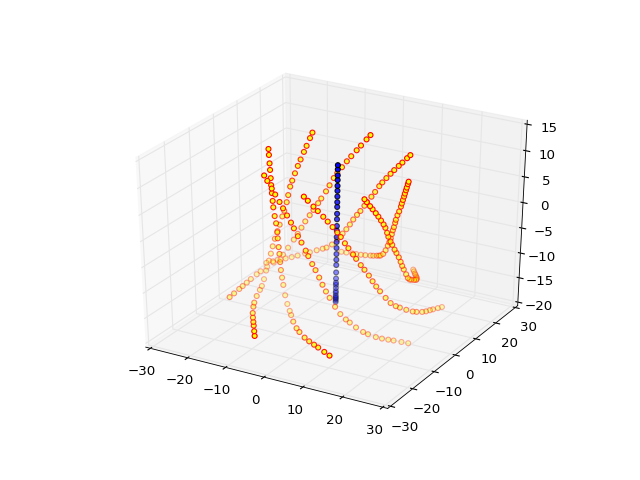

In [84]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x,y,z = numpy.array(ref_axis.coordinates).T
ax.scatter(x,y,z)

for n in range(8):
    x,y,z = numpy.array(prims[n]).T
    ax.scatter(x,y,z,color='red',c='yellow')

# ax.set_aspect('equal')
plt.show()

Get data from reference axes and primitives, all models

In [85]:
def get_refaxis_prims(ampal):
    prims = numpy.array([x.coordinates for x in ampal.primitives])
    ref_axis = isambard_dev.ampal.pseudo_atoms.Primitive.from_coordinates(
        numpy.mean(prims, axis=0))
    return ref_axis.coordinates, prims

In [86]:
Geometry = {}
for group in ['narrow','wide']:
    Geometry[group] = {}
    PDBs = [x.rstrip() for x in open(path0+'/'+group+'_pdbs.txt').readlines()]
    for pdb in PDBs:
        Geometry[group][pdb] = {}
        pdb_path = path0+'/'+group+'/input/'+pdb
        ampal = isambard_dev.ampal.convert_pdb_to_ampal(pdb_path)
        ref_axis, prims = get_refaxis_prims(ampal)
        Geometry[group][pdb]['RefAxis'] = ref_axis
        Geometry[group][pdb]['Primitives'] = prims
        Geometry[group][pdb]['COMs'] = [chain.backbone.centre_of_mass for chain in ampal]

Plot data 

<IPython.core.display.Javascript object>


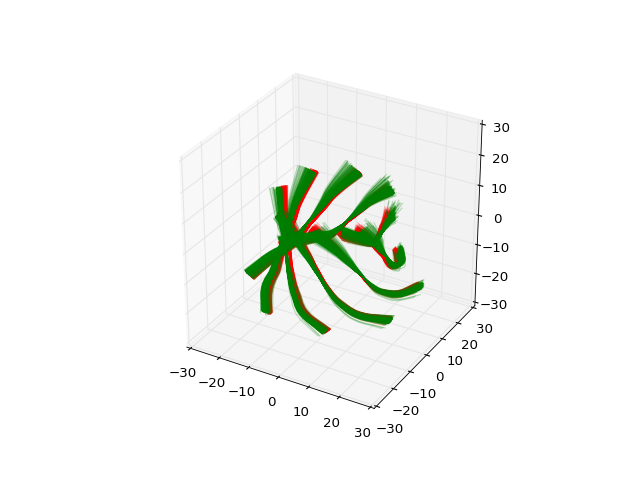

In [87]:
from mpl_toolkits.mplot3d import Axes3D
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')

colors = {'narrow':'red','wide':'green'}
for group in ['narrow','wide']:
    PDBs = [x.rstrip() for x in open(path0+'/'+group+'_pdbs.txt').readlines()]
    for pdb in PDBs:
        chains_color = colors[group]
        for n in range(8):
            x,y,z = numpy.array(Geometry[group][pdb]['Primitives'][n]).T
#             ax.scatter(x,y,z,color='red',c='yellow')
#             ax.scatter(x,y,z,c=numpy.random.rand(3,1))
            ax.plot(x,y,z,c=chains_color,alpha=0.25)

ax.set_aspect('equal')
ax.set_xlim(-30,30)
ax.set_ylim(-30,30)
ax.set_zlim(-30,30)

plt.show()

<IPython.core.display.Javascript object>


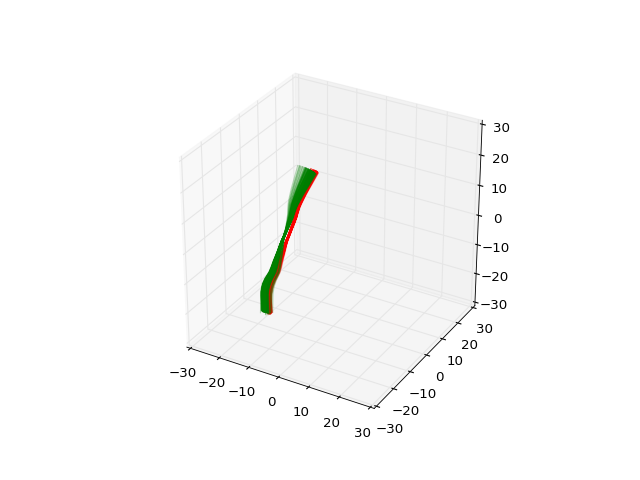

In [88]:
from mpl_toolkits.mplot3d import Axes3D
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')

colors = {'narrow':'red','wide':'green'}
for group in ['narrow','wide']:
    PDBs = [x.rstrip() for x in open(path0+'/'+group+'_pdbs.txt').readlines()]
    for pdb in PDBs:
        chains_color = colors[group]
        for n in range(1):
            x,y,z = numpy.array(Geometry[group][pdb]['Primitives'][n]).T
#             ax.scatter(x,y,z,color='red',c='yellow')
#             ax.scatter(x,y,z,c=numpy.random.rand(3,1))
            ax.plot(x,y,z,c=chains_color,alpha=0.25)

ax.set_aspect('equal')
ax.set_xlim(-30,30)
ax.set_ylim(-30,30)
ax.set_zlim(-30,30)

plt.show()

**3D plot of chain primitive coordinates**

Base example

<IPython.core.display.Javascript object>


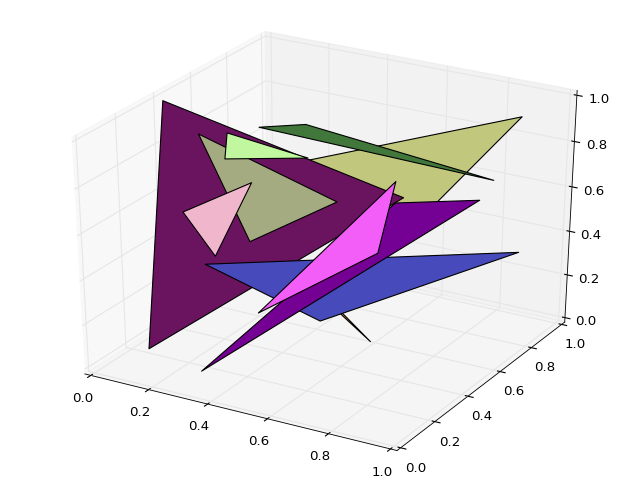

In [89]:
# Plot triangles in 3D 
import mpl_toolkits.mplot3d as a3
import matplotlib.colors as colors
import pylab as pl
import scipy as sp

ax = a3.Axes3D(pl.figure())
for i in range(10):
    vtx = sp.rand(3,3)
    tri = a3.art3d.Poly3DCollection([vtx])
    tri.set_color(colors.rgb2hex(sp.rand(3)))
    tri.set_edgecolor('k')
    ax.add_collection3d(tri)
pl.show()

PLOT: Primitives with triangles from SINGLE STRUCTURE

<IPython.core.display.Javascript object>


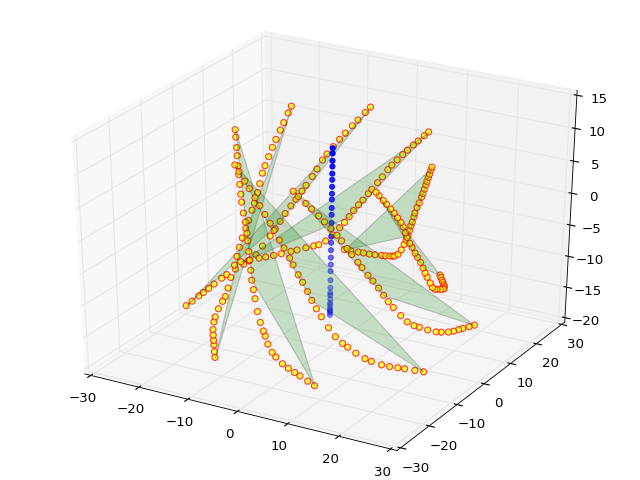

In [90]:
# Plot triangles in 3D 
import mpl_toolkits.mplot3d as a3
import matplotlib.colors as colors

ax = a3.Axes3D(plt.figure())

for n in range(8):
    # Scatter plot of primitive coordinates
    x,y,z = numpy.array(prims[n]).T
    ax.scatter(x,y,z,s=30,color='red',c='yellow',alpha=0.75)
    # Plot triangles from 3 points in primitives
    v0 = prims[n][0]
    v1 = prims[n][-1]
    v2 = prims[n][15]
    vtx = numpy.array([v0,v1,v2])
    
    tri = a3.art3d.Poly3DCollection([vtx])
#     tri.set_color(colors.rgb2hex(sp.rand(3)))
    tri.set_color('green')
    tri.set_edgecolor('k')
    tri.set_alpha(0.2)
    ax.add_collection3d(tri)

x,y,z = numpy.array(ref_axis).T
ax.scatter(x,y,z,color='blue')
    
plt.show()

PLOT: Primitives with triangles from ALL STRUCTURES

<IPython.core.display.Javascript object>


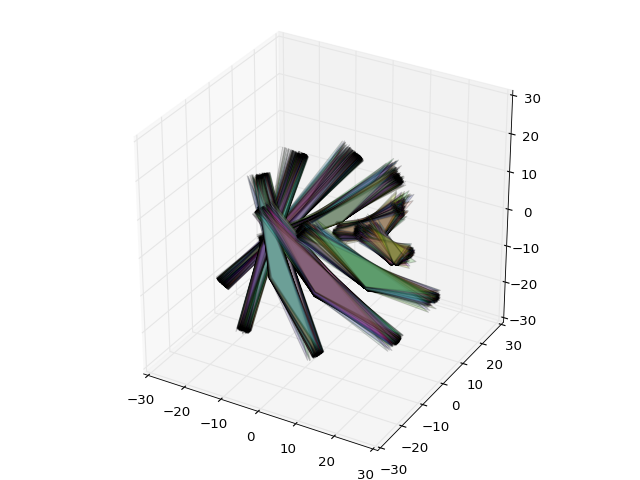

In [91]:
# Plot triangles in 3D 
import mpl_toolkits.mplot3d as a3
import matplotlib.colors as colors

ax = a3.Axes3D(plt.figure())



# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.colors as colors
# import scipy

# fig2 = plt.figure()
# ax = fig2.add_subplot(111, projection='3d')

for group in ['narrow','wide']:
    PDBs = [x.rstrip() for x in open(path0+'/'+group+'_pdbs.txt').readlines()]
    for pdb in PDBs:
#         chains_color = colors[group]
#         mycolor = colors.rgb2hex(scipy.rand(3))
        for n in range(8):
            prims = Geometry[group][pdb]['Primitives']
            # Plot triangles from 3 points in primitives
            v0 = prims[n][0]
            v1 = prims[n][-1]
            v2 = prims[n][15]
            vtx = numpy.array([v0,v1,v2])

            tri = a3.art3d.Poly3DCollection([vtx])
#             tri.set_color(mycolor)
            tri.set_color(colors.rgb2hex(sp.rand(3)))
#             tri.set_color('green')
            tri.set_edgecolor('k')
            tri.set_alpha(0.2)
            ax.add_collection3d(tri)
        
ax.set_aspect('equal')
ax.set_xlim(-30,30)
ax.set_ylim(-30,30)
ax.set_zlim(-30,30)

plt.show()

FIGURES

**Orientation of reference axes for all models**

Reference example

Define cartesian to spehric coordinate trasnformation

In [ ]:
def cart2sph(x, y, z):
    hxy = numpy.hypot(x, y)
    r = numpy.hypot(hxy, z)
    el = numpy.arctan2(z, hxy)
    az = numpy.arctan2(y, x)
    return numpy.rad2deg(az), numpy.rad2deg(el), r

In [ ]:
# fig2 = plt.figure()
# ax = fig2.add_subplot(111, projection='3d')
Phi = []
Rho = []
Area = []
for group in ['narrow','wide']:
    PDBs = [x.rstrip() for x in open(path0+'/'+group+'_pdbs.txt').readlines()]
    for pdb in PDBs:
        r0 = Geometry[group][pdb]['RefAxis'][0]
        rN = Geometry[group][pdb]['RefAxis'][-1]
        x,y,z  = (rN - r0)/numpy.linalg.norm(rN - r0)
        phi, theta, r = cart2sph(x, y, z)
        area = 200 * r**2
        Area.append(area)
        Phi.append(phi)
        Rho.append(r*numpy.cos(numpy.deg2rad(theta)))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
colors = Phi
c = ax.scatter(Phi, Rho, c=colors, s=Area, cmap='hsv', alpha=0.1)
ax.set_rlim(0,1)

In [ ]:
# fig2 = plt.figure()
# ax = fig2.add_subplot(111, projection='3d')
Phi0 = []; PhiN = []
Rho0 = []; RhoN = []
# Area = []
for group in ['narrow','wide']:
    PDBs = [x.rstrip() for x in open(path0+'/'+group+'_pdbs.txt').readlines()]
    for pdb in PDBs:
        r0 = Geometry[group][pdb]['Primitives'][0][0]
        rN = Geometry[group][pdb]['Primitives'][0][-1]
        x0,y0,z0  = r0
        xN,yN,zN  = rN
        phi0, theta0, R0 = cart2sph(x0, y0, z0)
        phiN, thetaN, RN = cart2sph(xN, yN, zN)
        Phi0.append(phi0)
        PhiN.append(phiN) 
        Rho0.append(R0*numpy.cos(numpy.deg2rad(theta0)))
        RhoN.append(RN*numpy.cos(numpy.deg2rad(thetaN)))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')

colors = Phi0
c0 = ax.scatter(Phi0, Rho0, c=colors, s=100, cmap='hsv', alpha=0.1)
colors = PhiN
cN = ax.scatter(PhiN, RhoN, c=colors, s=100, cmap='hsv', alpha=0.1)
# ax.set_rlim(0,1)

In [ ]:
figg = plt.figure()

plt.hist(Phi0,bins=60)
# plt.hist(PhiN,bins=60)
plt.show()

The chains behave like rigid bodies

In [ ]:
D_0N = []
D_C0 = []
D_CN = []
for group in ['narrow','wide']:
    PDBs = [x.rstrip() for x in open(path0+'/'+group+'_pdbs.txt').readlines()]
    for pdb in PDBs:
        r0 = Geometry[group][pdb]['Primitives'][0][0]
        rC = Geometry[group][pdb]['Primitives'][0][12]
        rN = Geometry[group][pdb]['Primitives'][0][-1]
        D_0N.append(numpy.linalg.norm(rN - r0))
        D_C0.append(numpy.linalg.norm(r0 - rC))
        D_CN.append(numpy.linalg.norm(rN - rC))
        

In [ ]:
figg = plt.figure()
plt.plot(D_0N)
plt.plot(D_CN)
plt.plot(D_C0)

# plt.ylim(40,50)
plt.show()

Vector definition for rigid body rotations

In [92]:
path0 = "/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/cwza_NoWPN/3-analysis/md_relax/sem"

pdb = path0+'/narrow/input/refined1_0001_INPUT_0002_ignorechain.pdb'

p = isambard_dev.ampal.convert_pdb_to_ampal(pdb)

ampal = p
prims = numpy.array([x.coordinates for x in ampal.primitives])
ref_axis = isambard_dev.ampal.pseudo_atoms.Primitive.from_coordinates(
        numpy.mean(prims, axis=0))

<IPython.core.display.Javascript object>


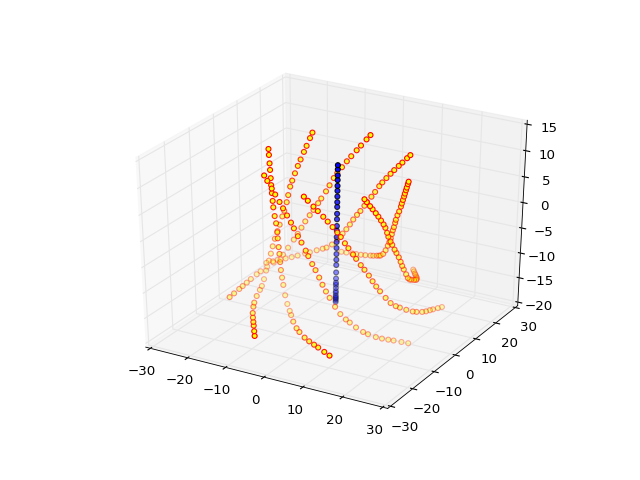

In [93]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x,y,z = numpy.array(ref_axis.coordinates).T
ax.scatter(x,y,z)

for n in range(8):
    x,y,z = numpy.array(prims[n]).T
    ax.scatter(x,y,z,color='red',c='yellow')

# ax.set_aspect('equal')
plt.show()

In [94]:
def get_intrinsic_rbasis(A,B,C):
    # Triangle edges
    e_BA = (A-B)/numpy.linalg.norm(A-B)
    e_BC = (C-B)/numpy.linalg.norm(C-B)
    # Define normal vector
    N = numpy.cross(e_BC,e_BA)
    e_yaw = N/numpy.linalg.norm(N)
    # Define ...
    e_pitch = (e_BA+e_BC)/numpy.linalg.norm(e_BA+e_BC)
    e_roll = numpy.cross(e_yaw,e_pitch)    
    return e_yaw, e_pitch, e_roll

In [95]:
def get_assembly_reference(ref_axis,coms):
    Z = ref_axis[-1]-ref_axis[0]
    e_z = Z/numpy.linalg.norm(Z)
    # COm of Chain A
    X = coms[0] - numpy.mean(coms, axis=0)
    e_x = X/numpy.linalg.norm(X)
    e_y = numpy.cross(e_x,e_z)
    return e_x,e_y,e_z

In [96]:
import scipy

<IPython.core.display.Javascript object>


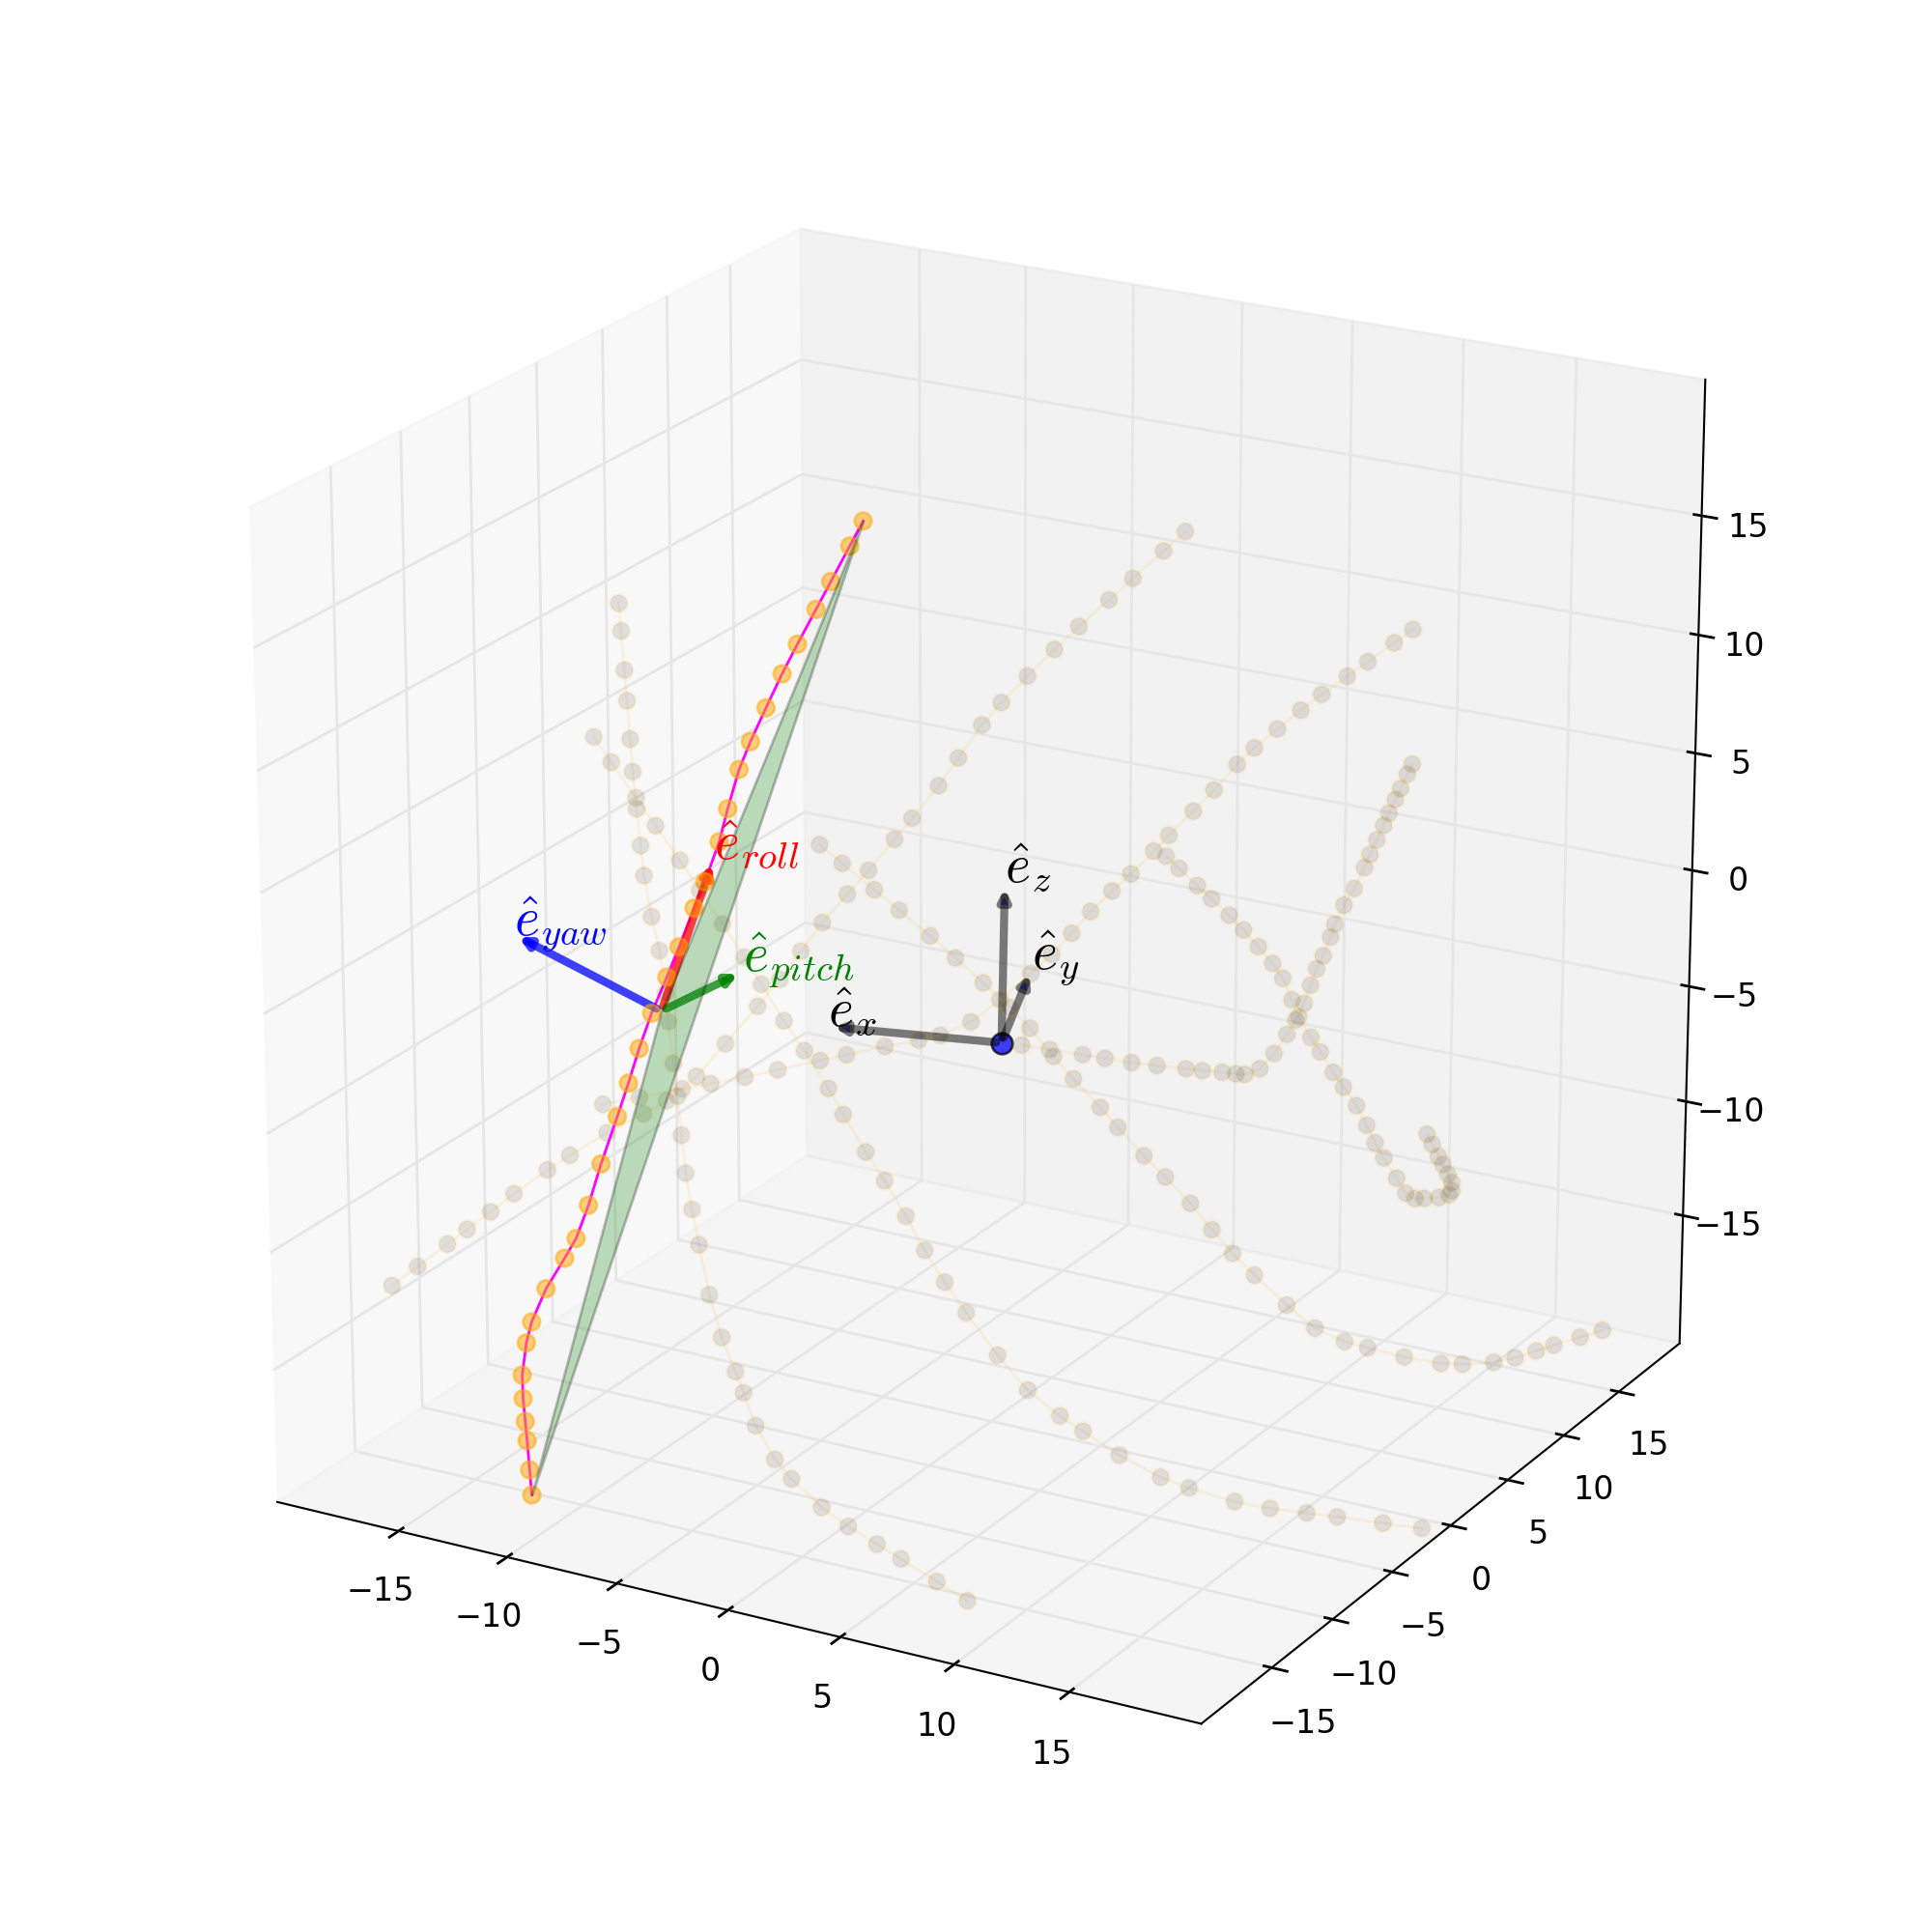

In [138]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
import matplotlib.colors as colors
import mpl_toolkits.mplot3d as a3

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)
#######################################################
chain_names = ['A','B','C','D','E','F','G','H']
#######################################################
fig = plt.figure(figsize=(10,10),dpi=200)
ax = fig.add_subplot(111, projection='3d')
#######################################################
for group in ['narrow']:
    basis_colors = {'yaw':'blue','pitch':'green','roll':'red'}
    PDBs = [x.rstrip() for x in open(path0+'/'+group+'_pdbs.txt').readlines()]
    for pdb in PDBs[:1]:
        mycolor = 'green' #colors.rgb2hex(scipy.rand(3))
        ref_axis = Geometry[group][pdb]['RefAxis']
        prims = Geometry[group][pdb]['Primitives']
        coms = Geometry[group][pdb]['COMs']
        COM = numpy.mean(coms, axis=0)
        dd = get_assembly_reference(ref_axis,coms)
        for n in range(1,8):
            # Triangle vertices
            #############################################
            x,y,z = numpy.array(prims[n]).T
            ax.scatter(x,y,z,s=40,color='orange',c='black',alpha=0.1)
            ax.plot(x,y,z,color='orange',alpha=0.1)
        for n in [0]:
            # Triangle vertices
            #############################################
            x,y,z = numpy.array(prims[n]).T
            ax.scatter(x,y,z,s=40,color='orange',c='orange',alpha=0.5,zorder=0)
            ax.plot(x,y,z,color='magenta',alpha=1,zorder=0)
            #############################################
            A,B,C = prims[n][-1],coms[n],prims[n][0] #list(itemgetter(*[-1,12,0])(prims[n]))
            #############################################
#             ax.text(B[0],B[1],B[2],'$COM_{%s}$'%chain_names[n],color='black',fontsize=15)
            #############################################
#             A,B,C = prims[n][-1],numpy.mean(prims[n],axis=0),prims[n][0]
            e_yaw, e_pitch, e_roll = get_intrinsic_rbasis(A,B,C)
            e_x, e_y, e_z = get_assembly_reference(ref_axis,coms)
            #############################################
            basis = {'yaw':e_yaw,'pitch':e_pitch,'roll':e_roll}
            basis_labels =  {'yaw':'$\hat{e}_{yaw}$','pitch':'$\hat{e}_{pitch}$','roll':'$\hat{e}_{roll}$'}
            a = 7 # arrow length
            for key in list(basis.keys()):
                u = basis[key]
                arrow = Arrow3D([B[0], a*u[0]+B[0]],[B[1], a*u[1]+B[1]],[B[2], a*u[2]+B[2]],
                            mutation_scale=20, lw=3, arrowstyle="-|>",color=basis_colors[key],alpha=0.75)
                ax.add_artist(arrow)
                ax.text(a*u[0]+B[0],a*u[1]+B[1],a*u[2]+B[2],basis_labels[key],color=basis_colors[key],fontsize=20,zorder=20)
            
            # Draw triangle
            v0,v1,v2 = prims[n][-1],coms[n],prims[n][0] #list(itemgetter(*[0,12,-1])(prims[n]))
            vtx = numpy.array([v0,v1,v2])
            tri = a3.art3d.Poly3DCollection([vtx])
            tri.set_color(mycolor)
            tri.set_edgecolor('k')
            tri.set_alpha(0.25)
            ax.add_collection3d(tri)
            #############################################
            # Draw Assembly XYZ axes
            ax.scatter(COM[0],COM[1],COM[2],s=60,color='black',alpha=0.75)
#             ax.text(COM[0],COM[1],COM[2],'$COM_{total}$',color='black',fontsize=15)
            #############################################
            basis_complex = {'x':e_x,'y':e_y,'z':e_z}
            for key in list(basis_complex.keys()):
                e_k = basis_complex[key]
                arrow = Arrow3D([COM[0],COM[0]+a*e_k[0]],[COM[1],COM[1]+a*e_k[1]],[COM[2],COM[2]+a*e_k[2]],
                               mutation_scale=20, lw=3, arrowstyle="-|>",alpha=0.5)
                ax.add_artist(arrow)
                ax.text(COM[0]+a*e_k[0],COM[1]+a*e_k[1],COM[2]+a*e_k[2],"$\hat{e}_"+key+"$",fontsize=20)
            

ax.set_aspect('equal')
ax.set_xlim(-25,25)
ax.set_ylim(-25,25)
ax.set_zlim(-25,25)
fig.tight_layout()
plt.show()

**NOTE: Need to make a decision on how to pick a convenient convention to define Euler angles **

**CONVENTIONS**:

* Assembly coordinate system (external):

$X$ =  Axis pointing from assembly BB-COM to BB-COM of chain A

$Z$ =  Axis perpendicular to *assembly plane*.
> Assembly plane: Defined by vectors from assembly BB-COM to BB-COM of chains A and B 

$Y$ = Defined by  $e_Y = e_X \times e_Z$ 

* Unit coordinate system (intrinsic):

$\theta$ =  angle between $Roll-axis$ and its projection onto XY plane

$\varphi$ = rotation about $Roll-axis$

$\psi$ =  angle between X axis and projection of $Roll-axis$


In [ ]:
def Rotation(a,b):
    v = numpy.cross(a,b)
    c = numpy.dot(a,b)
    s = numpy.linalg.norm(v)
    I = numpy.identity(3)
    vXStr = '{} {} {}; {} {} {}; {} {} {}'.format(0, -v[2], v[1], v[2], 0, -v[0], -v[1], v[0], 0)
    k = numpy.matrix(vXStr)
    R = I + k + numpy.matmul(k,k) * ((1 -c)/(s**2))
    return R

In [ ]:
def euler_angles(Axes_external, Axes_internal):
        """Given two arrays of 3D orthonormal axes, obtain Euler angles"""
        # Get base vectors
        e_x, e_y, e_z = [axis/numpy.linalg.norm(axis) for axis in Axes_external]
        e_yaw, e_pitch, e_roll = [axis/numpy.linalg.norm(axis) for axis in Axes_internal]
        # Compute elevation angle (theta)
        e_roll_xy = numpy.dot(e_roll,e_x)*e_x + numpy.dot(e_roll,e_y)*e_y
        theta = numpy.rad2deg( numpy.arccos( numpy.dot(e_roll,e_roll_xy) ) )
        # Compute the roll angle
        R = Rotation(e_roll,e_z)
        u = R.dot(e_pitch).tolist()[0]
        phi = numpy.rad2deg( numpy.arccos( numpy.dot(u,e_x) ) ) 
        # Compute pitch angle 
        psi = numpy.rad2deg( numpy.arccos( numpy.dot(e_roll_xy,e_x) ) ) 
        return theta, phi, psi

Generate randomly oriented set of orthonormal vectors

In [ ]:
import numpy as np    

def rvs(dim=3):
     random_state = np.random
     H = np.eye(dim)
     D = np.ones((dim,))
     for n in range(1, dim):
         x = random_state.normal(size=(dim-n+1,))
         D[n-1] = np.sign(x[0])
         x[0] -= D[n-1]*np.sqrt((x*x).sum())
         # Householder transformation
         Hx = (np.eye(dim-n+1) - 2.*np.outer(x, x)/(x*x).sum())
         mat = np.eye(dim)
         mat[n-1:, n-1:] = Hx
         H = np.dot(H, mat)
         # Fix the last sign such that the determinant is 1
     D[-1] = (-1)**(1-(dim % 2))*D.prod()
     # Equivalent to np.dot(np.diag(D), H) but faster, apparently
     H = (D*H.T).T
     return H

In [ ]:
Axes_external = [
    numpy.array([1,0,0]),
    numpy.array([0,1,0]),
    numpy.array([0,0,1])
]

Axes_internal = rvs()

In [ ]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
import matplotlib.colors as colors
import mpl_toolkits.mplot3d as a3

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

#######################################################
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
#######################################################
basis_colors_internal = {'yaw':'blue','roll':'green','pitch':'red'}
basis_labels_internal = {'yaw':'Yaw','roll':'Roll','pitch':'Pitch'}
e_yaw,e_pitch,e_roll = Axes_internal
basis_internal = {'yaw':e_yaw,'roll':e_roll,'pitch':e_pitch}
#######################################################
basis_colors_external = {'x':'black','y':'black','z':'black'}
basis_labels_external = {'x':'X','y':'Y','z':'Z'}
e_x,e_y,e_z = Axes_external
basis_external = {'x':e_x,'y':e_y,'z':e_z}
#######################################################
for basis_type in ['internal','external']:
    if basis_type == 'internal':
        basis = basis_internal
        basis_colors = basis_colors_internal
        basis_labels = basis_labels_internal
    elif basis_type == 'external':
        basis = basis_external
        basis_colors = basis_colors_external
        basis_labels = basis_labels_external
    for key in list(basis.keys()):
        u = basis[key]
        a = 10
        arrow = Arrow3D(
                [0, a*u[0]],
                [0, a*u[1]],
                [0, a*u[2]],
                mutation_scale=20,
                lw=3,
                arrowstyle="-|>",
                color=basis_colors[key],
                alpha=0.5
                )
        ax.add_artist(arrow)
        ax.text(
                a*u[0],
                a*u[1],
                a*u[2],
                basis_labels[key],
                color=basis_colors[key],
                fontsize=20
                )
#######################################################
ax.set_aspect('equal')
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_zlim(-10,10)
#######################################################
plt.show()

In [ ]:
euler_angles(Axes_external=Axes_external, Axes_internal=Axes_internal)

# Euler angles docked models

In [ ]:
mutant_paths = [
    "/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/cwza_NoWPN/3-analysis/md_relax/sem",
    "/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/cwzay373c_NoWPN/3-analysis/md_relax",
    "/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/cwzak375c_NoWPN/3-analysis/md_relax",
    "/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/cwzas355c_NoWPN/3-analysis/md_relax",
]

mutant_names = ['cWza','cWza-Y373C','cWza-K375C','cWza-S355C']

In [ ]:
def get_refaxis_prims(ampal):
    prims = numpy.array([x.coordinates for x in ampal.primitives])
    ref_axis = isambard_dev.ampal.pseudo_atoms.Primitive.from_coordinates(
        numpy.mean(prims, axis=0))
    return ref_axis.coordinates, prims

Get geometrical params for all mutants, all narrow/wide sampled structures

In [ ]:
Geometry = {}
for i in range(len(mutant_names)):
    Geometry[mutant_names[i]] = {}
    for group in ['narrow','wide']:
        Geometry[mutant_names[i]][group] = {}
        path0 = mutant_paths[i]
        PDBs = [x.rstrip() for x in open(path0+'/'+group+'_pdbs.txt').readlines()]
        for pdb in PDBs:
            Geometry[mutant_names[i]][group][pdb] = {}
            pdb_path = path0+'/'+group+'/input/'+pdb
            ampal = isambard_dev.ampal.convert_pdb_to_ampal(pdb_path)
            ref_axis, prims = get_refaxis_prims(ampal)
            Geometry[mutant_names[i]][group][pdb]['RefAxis'] = ref_axis
            Geometry[mutant_names[i]][group][pdb]['Primitives'] = prims
            Geometry[mutant_names[i]][group][pdb]['COMs'] = [chain.backbone.centre_of_mass for chain in ampal]

In [ ]:
data = {}

fig_theta,ax = plt.subplots(4,1,figsize=(6,16),sharex=False)

for i in range(len(mutant_names)):
# for i in [0]:
    data[mutant_names[i]] = {}
    path0 = mutant_paths[i]
    for group in ['narrow','wide']:
        data[mutant_names[i]][group] = []
        PDBs = [x.rstrip() for x in open(path0+'/'+group+'_pdbs.txt').readlines()]
        for pdb in PDBs:
            ref_axis = Geometry[mutant_names[i]][group][pdb]['RefAxis']
            prims = Geometry[mutant_names[i]][group][pdb]['Primitives']
            coms = Geometry[mutant_names[i]][group][pdb]['COMs']
            COM = numpy.mean(coms, axis=0)
            for n in range(1):
                # Triangle vertices
                #############################################
                x,y,z = numpy.array(prims[n]).T
                #############################################
                A,B,C = prims[n][-1],coms[n],prims[n][0] #list(itemgetter(*[-1,12,0])(prims[n]))
                e_yaw, e_pitch, e_roll = get_intrinsic_rbasis(A,B,C)
                e_x, e_y, e_z = get_assembly_reference(ref_axis,coms)
                theta, phi, psi = euler_angles([e_x, e_y, e_z], [e_yaw, e_pitch, e_roll])
                data[mutant_names[i]][group].append(theta)
                

    ax[i].hist(data[mutant_names[i]]['narrow'],bins=50,color='red',alpha=0.75,label='Narrow')
    ax[i].hist(data[mutant_names[i]]['wide'],bins=50,color='green',alpha=0.5,label='Wide')
    ax[i].set_title(mutant_names[i]+' : docked models',fontsize=20)
    ax[-1].set_ylabel('absolute frequency',fontsize=20)
#     ax[i].set_xlim(45,80)
    ax[i].legend()

ax[-1].set_xlabel("Tilt angle $\\theta$ [deg]",fontsize=20)
plt.show()

# Backbone radial profiles : *docked models*, all mutants

In [ ]:
BB_RadialProfiles = {}
for i in range(len(mutant_paths)):
    BB_RadialProfiles[mutant_names[i]] = {}
    path0 = mutant_paths[i]
    for group in ['narrow','wide']:
        BB_RadialProfiles[mutant_names[i]][group] = {}
        PDBs = [x.rstrip() for x in open(path0+'/'+group+'_pdbs.txt').readlines()]
        for pdb in PDBs:
            BB_RadialProfiles[mutant_names[i]][group][pdb] = []
            pdb_path = path0+'/'+group+'/input/'+pdb
            p = isambard_dev.ampal.convert_pdb_to_ampal(pdb_path)
            ref_axis,prims = get_refaxis_prims(p)
            coms = [numpy.mean(prims[n],axis=0) for n in range(8)]
            COM = numpy.mean(coms,axis=0)
            e_x, e_y, e_z = get_assembly_reference(ref_axis,coms)
            for n in range(8):
                profile = []
                for x in prims[n]:
                    r = x - COM
                    r_xy = numpy.dot(r,e_x)*e_x + numpy.dot(r,e_y)*e_y
                    d_xy = numpy.linalg.norm(r_xy)
                    profile.append(d_xy)
                BB_RadialProfiles[mutant_names[i]][group][pdb].append(profile)

Plot radial profiles

In [ ]:
fig_profile, ax = plt.subplots(4,7,figsize=(32,14))

group_color = {'narrow':'red','wide':'green'}
title_colors = {'cWza':'blue','cWza-Y373C':'green','cWza-K375C':'black','cWza-S355C':'magenta'}

R_metrics = {}
metrics = ['mean','std','cv','min','max']

def compute_radial_metrics(profile, metric):
    if metric == 'mean':
        return numpy.mean(profile)
    elif metric == 'std':
        return numpy.std(profile)
    elif metric == 'cv':
        return numpy.std(profile)/numpy.mean(profile)
    elif metric == 'min':
        return min(profile)
    elif metric == 'max':
        return max(profile)

def weights4hist(x):
    weights = numpy.ones_like(x)/float(len(x))
    return weights
    
xlims = [
    [0,31],
    [40,90],
    [15,20],
    [1.5,6],
    [0.12,0.3],
    [10,17],
    [22,30]
]

for i in range(len(mutant_names)):
    R_metrics[mutant_names[i]] = {}
    for group in ['narrow','wide']:
        #########################################################
        # Create lists for radial metrics
        R_metrics[mutant_names[i]][group] = {}
        for key in metrics:
            R_metrics[mutant_names[i]][group][key] = []
        #########################################################
        X = data[mutant_names[i]][group]
        ax[i][1].hist(X,bins=50,weights=weights4hist(X),color=group_color[group],alpha=0.6)
        # Get PDB lists
        PDBs = list(BB_RadialProfiles[mutant_names[i]][group].keys())
        N_PDBs = len(PDBs)
        for pdb in PDBs:
            profile = BB_RadialProfiles[mutant_names[i]][group][pdb][0]
            ax[i][0].plot(profile,color = group_color[group],alpha=0.5)
            for key in metrics:
                X = compute_radial_metrics(profile, key)
                R_metrics[mutant_names[i]][group][key].append(X)
        for k in range(len(metrics)):
            X = R_metrics[mutant_names[i]][group][metrics[k]]
            mylabel = group + ' ('+str(N_PDBs)+')'
            ax[i][k+2].hist(X,bins=30,weights=weights4hist(X),color= group_color[group],label=mylabel,alpha=0.75)
    ax[i][-1].legend(loc='best')
            
for i in range(4):
    ax[i][0].set_ylabel("BB-radial profile ($\AA$)",fontsize=17)
    for k in range(7):
        x0,x1 = xlims[k]
        ax[i][k].set_title(mutant_names[i],color=title_colors[mutant_names[i]],fontweight='bold',fontsize=15)
        ax[i][k].set_xlim(x0,x1)

xlabels = [
    "Z-coordinate ($\AA$)",
    "Tilt angle $\\theta$ (deg)",
    "Mean BB-Radius ($\AA$)",
    "Std BB-Radius ($\AA$)",
    "Std/Mean BB-Radius ($\AA$)",
    "Minimum BB-Radius ($\AA$)",
    "Maximum BB-Radius ($\AA$)"
]

for k in range(7):
    ax[-1][k].set_xlabel(xlabels[k],fontsize=18)

plt.savefig('bb_radial_metrics.png',transparent=False)
plt.show()

# Backbone-Sidechain radial profiles: *docked models, all mutants*

In [ ]:
# BBSC_RadialProfiles = {}        

for i in [0]:
# for i in range(len(mutant_paths)):
#     BBSC_RadialProfiles[mutant_names[i]] = {}
    path0 = mutant_paths[i]
    for group in ['narrow']:
#     for group in ['narrow','wide']:
#         BBSC_RadialProfiles[mutant_names[i]][group] = {}
        PDBs = [x.rstrip() for x in open(path0+'/'+group+'_pdbs.txt').readlines()]
        for pdb in PDBs[:1]:
#             BBSC_RadialProfiles[mutant_names[i]][group][pdb] = []
            pdb_path = path0+'/'+group+'/input/'+pdb
            p = isambard_dev.ampal.convert_pdb_to_ampal(pdb_path)
            ref_axis,prims = get_refaxis_prims(p)
            coms = [numpy.mean(prims[n],axis=0) for n in range(8)]
            COM = numpy.mean(coms,axis=0)
            e_x, e_y, e_z = get_assembly_reference(ref_axis,coms)
            for n in range(1):
                chain = p[n]
                AA_Atoms_XYZ = [numpy.array([atom.x,atom.y,atom.z]) for atom in chain.get_atoms()]
                BB_Atoms_XYZ = [numpy.array([atom.x,atom.y,atom.z]) for atom in chain.backbone.get_atoms()]
                ###############################
                aa_profile = []
                bb_profile = []
                primitive_profile = []
                ###############################
                for x in prims[n]:
                    r = x - COM
                    r_xy = numpy.dot(r,e_x)*e_x + numpy.dot(r,e_y)*e_y
                    r_z = numpy.dot(r,e_z)
                    d_xy = numpy.linalg.norm(r_xy)
                    primitive_profile.append([r_z, d_xy])
                for x in AA_Atoms_XYZ:
                    r = x - COM
                    r_xy = numpy.dot(r,e_x)*e_x + numpy.dot(r,e_y)*e_y
                    r_z = numpy.dot(r,e_z)
                    d_xy = numpy.linalg.norm(r_xy)
                    aa_profile.append([r_z, d_xy])
                for x in BB_Atoms_XYZ:
                    r = x - COM
                    r_xy = numpy.dot(r,e_x)*e_x + numpy.dot(r,e_y)*e_y
                    r_z = numpy.dot(r,e_z)
                    d_xy = numpy.linalg.norm(r_xy)
                    bb_profile.append([r_z, d_xy])    
                    
#                 BBSC_RadialProfiles[mutant_names[i]][group][pdb].append(profile)

fig_test0 = plt.figure(dpi=100)
###############################################
X,Y = numpy.array(aa_profile).T
plt.scatter(X,Y,color='green',marker='o',label='All atoms (BB+SC)',alpha=0.75)
plt.xlim(min(X),max(X))
###############################################
X,Y = numpy.array(bb_profile).T
plt.scatter(X,Y,color='magenta',marker='o',s=50,label='BB atoms',alpha=0.5)
###############################################
X,Y = numpy.array(primitive_profile).T
plt.plot(X,Y,color='blue',linewidth=4,label='Primitive: Chain A')

plt.xlabel('Z-coordinate ($\AA$)',fontsize=15)
plt.ylabel('Radial distance ($\AA$)',fontsize=15)
plt.ylim(0,30)

plt.text(-15,7,'Channel interior',fontsize=20)
plt.axis('scaled')

plt.title('Radial profiles of a docked model',fontsize=20)

plt.legend()
plt.show()

## Assigning VdW radii per atom (AMBER f.f)

HOLE provides different types of  *Van der Waals* radii:

* `simple.rad` : Only based on element identity, regardless of amino acid identity.

* `amberuni.rad` : Based on AMBER f.f., values can vary depending on AA identity, despite element identity.

In [ ]:
import re
# VDW  Radii file
file_amber = '/home/ba13026/hole/hole2/rad/amberuni.rad'
file_simple = '/home/ba13026/hole/hole2/rad/simple.rad'

amber_vdwr = [x.strip().split('VDWR')[-1].split() for x in open(file_amber,'r').readlines() if re.search(r'VDWR',x)][2:]
amber_vdwr = [x[:2]+[float(x[-1])] for x in amber_vdwr]

simple_vdwr = [x.strip().split('VDWR')[-1].split() for x in open(file_simple,'r').readlines() if re.search(r'VDWR',x)]

Need to replace wildcards with "acceptable" `regex` that Python can understand

*Intro to `regex`*

http://www.informit.com/articles/article.aspx?p=1278986

In [ ]:
regex_amber_vdwr = []
for x in amber_vdwr:
    a,b,c = x
    if '???' in a:
        regex_amber_vdwr.append([a.replace('???','.{0,}'),b.replace('?','.'),c])
    else:
        regex_amber_vdwr.append([a.replace('?','.'),b.replace('?','.'),c])

In [ ]:
regex_simple_vdwr = []
for x in simple_vdwr:
    a,b,c = x
    if '???' in a:
        regex_simple_vdwr.append([a.replace('???','.{0,}'),b.replace('?','.'),c])
    else:
        regex_simple_vdwr.append([a.replace('?','.'),b.replace('?','.'),c])

Show regex patterns for VdW radii types

In [ ]:
regex_amber_vdwr

In [ ]:
regex_simple_vdwr

Test with simple chain from PDB, loaded by `isambard`

In [ ]:
path0 = "/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/cwza_NoWPN/3-analysis/md_relax/sem"
pdb = path0+'/narrow/input/refined1_0001_INPUT_0002_ignorechain.pdb'
p = isambard_dev.ampal.convert_pdb_to_ampal(pdb)
chain = p[0]

In [ ]:
chain_info = [[x.res_label, x.ampal_parent.mol_code] for x in chain.get_atoms()]
print("Atoms in chain: ", len(chain_info))

In [ ]:
def get_atom_res(ampal):
    chain = ampal[0]
    chain_info = [[x.res_label, x.ampal_parent.mol_code] for x in chain.get_atoms()]
    return chain_info

### First trial: Simple VdW radii 

Test:

In [ ]:
vdwr_data = []
regex_vdwr = regex_simple_vdwr
X = chain_info

####################################################
for i in range(len(X)):
    atom_pdb,res_pdb = X[i]
    # Match Hydrogens first, which start with a number
    result = re.match('[0-9]*',atom_pdb)
    span = result.span()[1]
    if span == 0:
        for k in range(len(regex_vdwr)):
            atom_pattern, res_pattern, r_vdw = regex_vdwr[k]
            atom_result =  re.match(atom_pattern, atom_pdb)
            res_result = re.match(res_pattern, res_pdb)
            if (atom_result != None) and (res_result != None):
                vdwr_data.append((i, atom_pdb,res_pdb,r_vdw))
    else:
        x = atom_pdb[1:]
        atom_pattern, res_pattern, r_vdw = ['H.{0,}','...','1.00']
        result = re.match(atom_pattern,x)
        if result != None:
            vdwr_data.append((i, atom_pdb,res_pdb,r_vdw))
####################################################
simple_vdwr_data = vdwr_data
print("Number of matched atoms: ", len(simple_vdwr_data))
print("Atoms in chain: ", len(chain_info))

### Second trial: AMBER VdW radii 

Test:

In [ ]:
vdwr_data = []
regex_vdwr = regex_amber_vdwr
X = chain_info

####################################################
for i in range(len(X)):
    atom_pdb,res_pdb = X[i]
    matches = []
    # Match Hydrogens first, which start with a number
    result = re.match('[0-9]*',atom_pdb)
    span = result.span()[1]
    if span == 0:
        for k in range(len(regex_vdwr)):
            atom_pattern, res_pattern, r_vdw = regex_vdwr[k]
            atom_result =  re.match(atom_pattern, atom_pdb)
            res_result = re.match(res_pattern, res_pdb)
            if (atom_result != None) and (res_result != None):
                matches.append([i, atom_pdb,atom_pattern,res_pdb,res_pattern,atom_result,r_vdw])
        if len(matches) == 1:
            vdwr_data.append(itemgetter(*[0,1,3,-1])(matches[0]))
        else:
            for m in range(len(matches)):
                num,atom_pdb,atom_pattern,res_pdb,res_pattern,atom_result,r_vdw = matches[m]
                if (atom_pdb == atom_pattern) and (res_pdb == res_pattern):
                    vdwr_data.append(itemgetter(*[0,1,3,-1])(matches[m]))
                    break
                else:
                    if (atom_pdb == atom_pattern) and (res_pattern == '...'):
                        vdwr_data.append(itemgetter(*[0,1,3,-1])(matches[m]))
                        break
                    else:
                        if len(atom_pdb) == len(atom_pattern):
                            vdwr_data.append(itemgetter(*[0,1,3,-1])(matches[m]))
                            break
                        else:
                            if matches[m][-2].span()[1] > 1:
                                vdwr_data.append(itemgetter(*[0,1,3,-1])(matches[m]))
    else:
        x = atom_pdb[1:]
        atom_pattern, res_pattern, r_vdw = ['H.{0,}','...','1.00']
        result = re.match(atom_pattern,x)
        if result != None:
            vdwr_data.append((i, atom_pdb,res_pdb,r_vdw))
####################################################
amber_vdwr_data = vdwr_data
print("Number of matched atoms: ", len(amber_vdwr_data))
print("Atoms in chain: ", len(chain_info))                                

Function implementation:

In [ ]:
def assign_vdwr(X, vdwr_type):
    vdwr_data = []
    if vdwr_type == 'simple':
        regex_vdwr = regex_simple_vdwr
        ##################################################################
        for i in range(len(X)):
            atom_pdb,res_pdb = X[i]
            # Match Hydrogens first, which start with a number
            result = re.match('[0-9]*',atom_pdb)
            span = result.span()[1]
            if span == 0:
                for k in range(len(regex_vdwr)):
                    atom_pattern, res_pattern, r_vdw = regex_vdwr[k]
                    atom_result =  re.match(atom_pattern, atom_pdb)
                    res_result = re.match(res_pattern, res_pdb)
                    if (atom_result != None) and (res_result != None):
                        vdwr_data.append((i, atom_pdb,res_pdb,r_vdw))
            else:
                x = atom_pdb[1:]
                atom_pattern, res_pattern, r_vdw = ['H.{0,}','...','1.00']
                result = re.match(atom_pattern,x)
                if result != None:
                    vdwr_data.append((i, atom_pdb,res_pdb,r_vdw))
        ##################################################################
        return vdwr_data
    elif vdwr_type == 'amber':
        regex_vdwr = regex_amber_vdwr
        ##################################################################
        for i in range(len(X)):
            atom_pdb,res_pdb = X[i]
            matches = []
            # Match Hydrogens first, which start with a number
            result = re.match('[0-9]*',atom_pdb)
            span = result.span()[1]
            if span == 0:
                for k in range(len(regex_vdwr)):
                    atom_pattern, res_pattern, r_vdw = regex_vdwr[k]
                    atom_result =  re.match(atom_pattern, atom_pdb)
                    res_result = re.match(res_pattern, res_pdb)
                    if (atom_result != None) and (res_result != None):
                        matches.append([i, atom_pdb,atom_pattern,res_pdb,res_pattern,atom_result,r_vdw])
                if len(matches) == 1:
                    vdwr_data.append(itemgetter(*[0,1,3,-1])(matches[0]))
                else:
                    for m in range(len(matches)):
                        num,atom_pdb,atom_pattern,res_pdb,res_pattern,atom_result,r_vdw = matches[m]
                        if (atom_pdb == atom_pattern) and (res_pdb == res_pattern):
                            vdwr_data.append(itemgetter(*[0,1,3,-1])(matches[m]))
                            break
                        else:
                            if (atom_pdb == atom_pattern) and (res_pattern == '...'):
                                vdwr_data.append(itemgetter(*[0,1,3,-1])(matches[m]))
                                break
                            else:
                                if len(atom_pdb) == len(atom_pattern):
                                    vdwr_data.append(itemgetter(*[0,1,3,-1])(matches[m]))
                                    break
                                else:
                                    if matches[m][-2].span()[1] > 1:
                                        vdwr_data.append(itemgetter(*[0,1,3,-1])(matches[m]))
            else:
                x = atom_pdb[1:]
                atom_pattern, res_pattern, r_vdw = ['H.{0,}','...','1.00']
                result = re.match(atom_pattern,x)
                if result != None:
                    vdwr_data.append((i, atom_pdb,res_pdb,r_vdw))
        ##################################################################
        return vdwr_data

### Radial profiles

Simple VdW Amber Radii

In [ ]:
# BBSC_RadialProfiles = {}        
from shapely.geometry import Point
from shapely.ops import cascaded_union
from itertools import combinations
#################################################
aa_circles = []
bb_circles = []
X_aa = get_atom_res(p)
X_bb = get_atom_res(p.backbone)
simple_vdwr_data_aa = assign_vdwr(X_aa,'simple')
simple_vdwr_data_bb = assign_vdwr(X_bb,'simple')
#################################################
for i in [0]:
# for i in range(len(mutant_paths)):
#     BBSC_RadialProfiles[mutant_names[i]] = {}
    path0 = mutant_paths[i]
    for group in ['narrow']:
#     for group in ['narrow','wide']:
#         BBSC_RadialProfiles[mutant_names[i]][group] = {}
        PDBs = [x.rstrip() for x in open(path0+'/'+group+'_pdbs.txt').readlines()]
        for pdb in PDBs[:1]:
#             BBSC_RadialProfiles[mutant_names[i]][group][pdb] = []
            pdb_path = path0+'/'+group+'/input/'+pdb
            p = isambard_dev.ampal.convert_pdb_to_ampal(pdb_path)
            ref_axis,prims = get_refaxis_prims(p)
            coms = [numpy.mean(prims[n],axis=0) for n in range(8)]
            COM = numpy.mean(coms,axis=0)
            e_x, e_y, e_z = get_assembly_reference(ref_axis,coms)
            for n in range(1):
                chain = p[n]
                AA_Atoms_XYZ = [numpy.array([atom.x,atom.y,atom.z]) for atom in chain.get_atoms()]
                BB_Atoms_XYZ = [numpy.array([atom.x,atom.y,atom.z]) for atom in chain.backbone.get_atoms()]
                ###############################
                aa_profile = []
                bb_profile = []
                primitive_profile = []
                ###############################
                for x in prims[n]:
                    r = x - COM
                    r_xy = numpy.dot(r,e_x)*e_x + numpy.dot(r,e_y)*e_y
                    r_z = numpy.dot(r,e_z)
                    d_xy = numpy.linalg.norm(r_xy)
                    primitive_profile.append([r_z, d_xy])
                for k in range(len(AA_Atoms_XYZ)):
                    x = AA_Atoms_XYZ[k]
                    r = x - COM
                    r_xy = numpy.dot(r,e_x)*e_x + numpy.dot(r,e_y)*e_y
                    r_z = numpy.dot(r,e_z)
                    d_xy = numpy.linalg.norm(r_xy)
                    aa_profile.append([r_z, d_xy])
                    vdwr = float(simple_vdwr_data_aa[k][-1])
                    aa_circles.append(Point(r_z, d_xy).buffer(vdwr))
                for k in range(len(BB_Atoms_XYZ)):
                    x = BB_Atoms_XYZ[k]
                    r = x - COM
                    r_xy = numpy.dot(r,e_x)*e_x + numpy.dot(r,e_y)*e_y
                    r_z = numpy.dot(r,e_z)
                    d_xy = numpy.linalg.norm(r_xy)
                    bb_profile.append([r_z, d_xy])
                    vdwr = float(simple_vdwr_data_bb[k][-1])
                    bb_circles.append(Point(r_z, d_xy).buffer(vdwr))              
#                 BBSC_RadialProfiles[mutant_names[i]][group][pdb].append(profile)
##########################
union_aa_profile_simple = cascaded_union(
    [a.union(b) for a, b in combinations(aa_circles, 2)]
)
#########################
union_bb_profile_simple = cascaded_union(
    [a.union(b) for a, b in combinations(bb_circles, 2)]
)
#########################

Amber VdW Radii

In [ ]:
# BBSC_RadialProfiles = {}        
from shapely.geometry import Point
from shapely.ops import cascaded_union
from itertools import combinations

#################################################
aa_circles = []
bb_circles = []
X_aa = get_atom_res(p)
X_bb = get_atom_res(p.backbone)
amber_vdwr_data_aa = assign_vdwr(X_aa,'amber')
amber_vdwr_data_bb = assign_vdwr(X_bb,'amber')
#################################################
for i in [0]:
# for i in range(len(mutant_paths)):
#     BBSC_RadialProfiles[mutant_names[i]] = {}
    path0 = mutant_paths[i]
    for group in ['narrow']:
#     for group in ['narrow','wide']:
#         BBSC_RadialProfiles[mutant_names[i]][group] = {}
        PDBs = [x.rstrip() for x in open(path0+'/'+group+'_pdbs.txt').readlines()]
        for pdb in PDBs[:1]:
#             BBSC_RadialProfiles[mutant_names[i]][group][pdb] = []
            pdb_path = path0+'/'+group+'/input/'+pdb
            p = isambard_dev.ampal.convert_pdb_to_ampal(pdb_path)
            ref_axis,prims = get_refaxis_prims(p)
            coms = [numpy.mean(prims[n],axis=0) for n in range(8)]
            COM = numpy.mean(coms,axis=0)
            e_x, e_y, e_z = get_assembly_reference(ref_axis,coms)
            for n in range(1):
                chain = p[n]
                AA_Atoms_XYZ = [numpy.array([atom.x,atom.y,atom.z]) for atom in chain.get_atoms()]
                BB_Atoms_XYZ = [numpy.array([atom.x,atom.y,atom.z]) for atom in chain.backbone.get_atoms()]
                ###############################
                aa_profile = []
                bb_profile = []
                primitive_profile = []
                ###############################
                for x in prims[n]:
                    r = x - COM
                    r_xy = numpy.dot(r,e_x)*e_x + numpy.dot(r,e_y)*e_y
                    r_z = numpy.dot(r,e_z)
                    d_xy = numpy.linalg.norm(r_xy)
                    primitive_profile.append([r_z, d_xy])
                for k in range(len(AA_Atoms_XYZ)):
                    x = AA_Atoms_XYZ[k]
                    r = x - COM
                    r_xy = numpy.dot(r,e_x)*e_x + numpy.dot(r,e_y)*e_y
                    r_z = numpy.dot(r,e_z)
                    d_xy = numpy.linalg.norm(r_xy)
                    aa_profile.append([r_z, d_xy])
                    vdwr = float(amber_vdwr_data_aa[k][-1])
                    aa_circles.append(Point(r_z, d_xy).buffer(vdwr))
                for k in range(len(BB_Atoms_XYZ)):
                    x = BB_Atoms_XYZ[k]
                    r = x - COM
                    r_xy = numpy.dot(r,e_x)*e_x + numpy.dot(r,e_y)*e_y
                    r_z = numpy.dot(r,e_z)
                    d_xy = numpy.linalg.norm(r_xy)
                    bb_profile.append([r_z, d_xy])
                    vdwr = float(amber_vdwr_data_bb[k][-1])
                    bb_circles.append(Point(r_z, d_xy).buffer(vdwr))              
#                 BBSC_RadialProfiles[mutant_names[i]][group][pdb].append(profile)
##########################
union_aa_profile_amber = cascaded_union(
    [a.union(b) for a, b in combinations(aa_circles, 2)]
)
#########################
union_bb_profile_amber = cascaded_union(
    [a.union(b) for a, b in combinations(bb_circles, 2)]
)
#########################

In [ ]:
fig_test0 = plt.figure(dpi=100)
###############################################
X,Y = numpy.array(aa_profile).T
plt.scatter(X,Y,color='green',marker='o',s=20,label='SC+BB atoms',alpha=0.75)
# plt.scatter(X,-Y,color='green',marker='o',s=5,alpha=0.75)
plt.xlim(min(X)-5,max(X)+5)
###############################################
X,Y = numpy.array(bb_profile).T
plt.scatter(X,Y,color='magenta',marker='o',s=50,label='BB atoms',alpha=0.5)
# plt.scatter(X,-Y,color='magenta',marker='o',s=10,alpha=0.5)
###############################################
X,Y = numpy.array(primitive_profile).T
plt.plot(X,Y,color='blue',linewidth=2,label='Primitive: Chain A')
# plt.plot(X,-Y,color='blue',linewidth=2)
###############################################
X,Y = numpy.array(union_aa_profile_simple.boundary.coords).T
plt.plot(X,Y,color='mediumaquamarine',linewidth=2,label='VdW(simple) SC+BB')
X,Y = numpy.array(union_aa_profile_amber.boundary.coords).T
plt.plot(X,Y,color='blue',linewidth=0.5,label='VdW(AMBER) SC+BB')
# plt.plot(X,-Y,color='mediumaquamarine',linewidth=2)
###############################################
X,Y = numpy.array(union_bb_profile_simple.boundary.coords).T
plt.plot(X,Y,color='indianred',linewidth=2,label='VdW(simple) BB')
X,Y = numpy.array(union_bb_profile_amber.boundary.coords).T
plt.plot(X,Y,color='red',linewidth=0.5,label='VdW(AMBER) BB')
# plt.plot(X,-Y,color='indianred',linewidth=2)
###############################################
plt.xlabel('Z-coordinate ($\AA$)',fontsize=15)
plt.ylabel('Radial distance ($\AA$)',fontsize=15)
# plt.ylim(0,35)
plt.text(-15,3,'Channel interior',fontsize=20)
# plt.axis('scaled')
plt.title('Radial profiles of a docked model',fontsize=20)
###############################################
plt.legend(fontsize=11)
plt.show()

## Parallel computation

### Testing parallelisation

Compare performances

**Test 1: Serial implementation (single-threaded)**

In [ ]:
test_combinations = [a.union(b) for a, b in combinations(aa_circles, 2)]

**Test 2: Multithread implementation**

In [ ]:
from concurrent import futures

def return_union(x):
    x = a,b
    return a.union(b)

func = return_union
params_list = list(combinations(aa_circles, 2))

unions = []
with futures.ThreadPoolExecutor(max_workers=10) as executor:
    for x in executor.map(func, params_list):
        unions.append(x)

**Test 3: Multiprocess implementation**

In [ ]:
from concurrent import futures

def return_union(x):
    x = a,b
    return a.union(b)

func = return_union
params_list = list(combinations(aa_circles, 2))

unions = []
with futures.ProcessPoolExecutor(max_workers=10) as executor:
    for x in executor.map(func, params_list):
        unions.append(x)

SUMMARY:

* Serial: 7.65s
* Multithread: 27.7s
* Multiprocess: 1m 37.1s

**IMPORTANT NOTES:** 

* The difference is that threads run in the same memory space, while processes have separate memory. This makes it a bit harder to share objects between processes with multiprocessing. Since threads use the same memory, precautions have to be taken or two threads will write to the same memory at the same time. This is what the global interpreter lock is for.
* Multithreading may slow down due to GIL (*General Interpreter Lock*) or bacuse the computer doesn't handle parallel disk I/O that well.
* Multiprocess may slow down due to the overhead of starting a new process and sending data back and forth (*interprocess communications*).
* The CPython Python interpreter uses a "Global Interpreter Lock" to ensure that only a single line of a Python script can be interpreted at a time, thereby preventing memory corruption caused by multiple threads trying to read, write or delete memory in parallel. This means that, even if you use the Python threading module, you will still only execute a single line of your script at a time in CPython.
* The multiprocessing module solves the problem of the GIL, but at the cost of very high overhead (multi-milliseconds) for entering and leaving each parallel section of code, and the higher cost of sharing data between workers as compared to a true multi-threaded program.

**CONCLUSION**:

Multiprocessing can be definitely faster than Multithreading, but need to think of ways to reduce intercommunication processing time, for example by re-writing code using faster functions.

Test: Multiprocessing and dictionaries

In [ ]:
from multiprocess import Process, Manager

def f(d, x):
    d[x] = x**2
    
manager = Manager()
d = manager.dict()
N = 100
job = [Process(target=f, args=(d, i)) for i in range(N)]
_ = [p.start() for p in job]
_ = [p.join() for p in job]

In [ ]:
d = {}
N = 100
for i in range(N):
    f(d,i)

In [ ]:
from multiprocess import Process, Manager
from concurrent import futures

manager = Manager()
d = manager.dict()

# d = {}
def f(x):
    d[x] = x**2

func = f
N = 1000
params_list = list(range(N))

with futures.ProcessPoolExecutor(max_workers=10) as executor:
    out = executor.map(f, params_list)

In [ ]:
from multiprocess import Process, Manager
from concurrent import futures

def f(x):
    return x**2

func = f
N = 1000
params_list = list(range(N))

d = []
with futures.ProcessPoolExecutor(max_workers=10) as executor:
    for out in executor.map(f, params_list):
        d.append(out)

**Parallel union calculation**

Get all possible combinations of union sets

In [ ]:
test_combinations = [a.union(b) for a, b in combinations(aa_circles, 2)]

Get total union set using serial approach

In [ ]:
test_union = cascaded_union(test_combinations)

In [ ]:
test_union

Split total set of combinations into two and get total union in the end

In [ ]:
N = len(test_combinations)
test_union0 = cascaded_union(test_combinations[:int(N/2)])

In [ ]:
test_union0

In [ ]:
test_union1 = cascaded_union(test_combinations[int(N/2):])

In [ ]:
test_union1

In [ ]:
test_union0.union(test_union1)

**Proof of concept**: Parallel Threading

In [ ]:
N = len(test_combinations)
set0 = test_combinations[:int(N/2)]
set1 = test_combinations[int(N/2):]

In [ ]:
mysets = [set0,set1]

In [ ]:
from concurrent import futures

func = cascaded_union
params_list = mysets

myunions = []
with futures.ThreadPoolExecutor(max_workers=2) as executor:
    for x in executor.map(func, params_list):
        myunions.append(x)

In [ ]:
myunions[0]

In [ ]:
myunions[1]

In [ ]:
cascaded_union(myunions)

**Proof of concept**: Parallel Processing

In [ ]:
from concurrent import futures

func = cascaded_union
params_list = mysets

myunions = []
with futures.ProcessPoolExecutor(max_workers=2) as executor:
    for x in executor.map(func, params_list):
        myunions.append(x)

In [ ]:
myunions[0]

In [ ]:
myunions[1]

In [ ]:
cascaded_union(myunions
              )

### Applying parallelisation

In [ ]:
def chunkIt(seq, num):
    avg = len(seq) / float(num)
    out = []
    last = 0.0
    while last < len(seq):
        out.append(seq[int(last):int(last + avg)])
        last += avg
    return out

In [ ]:
from concurrent import futures

func = cascaded_union
params_list = chunkIt(test_combinations,4)

myunions = []
with futures.ThreadPoolExecutor(max_workers=4) as executor:
    for x in executor.map(func, params_list):
        myunions.append(x)

**<span style="color:red">Performance: 1m 28.2s, 4 threads</span>**

In [ ]:
from concurrent import futures

n_threads = 6

func = cascaded_union
params_list = chunkIt(test_combinations,n_threads)

myunions = []
with futures.ThreadPoolExecutor(max_workers=n_threads) as executor:
    for x in executor.map(func, params_list):
        myunions.append(x)

**<span style="color:red">Performance: 1m 0.74s, 6 threads</span>**

In [ ]:
cascaded_union(myunions)

**CONCLUSION**: 

* Use multithreading to speed up union calculation. 
* Optimal number of threads? 


### Computation

In [ ]:
from shapely.ops import cascaded_union
from itertools import combinations
from concurrent import futures

In [ ]:
def chunkIt(seq, num):
    avg = len(seq) / float(num)
    out = []
    last = 0.0
    while last < len(seq):
        out.append(seq[int(last):int(last + avg)])
        last += avg
    return out

In [ ]:
def myfunc(aa_circles, n_threads):
    combs = [a.union(b) for a, b in combinations(aa_circles, 2)]
    # Stuff for multi-threading
    func = cascaded_union
    params_list = chunkIt(combs,n_threads)
    myunions = [] # Output list
    # Run multithreading
    with futures.ThreadPoolExecutor(max_workers=n_threads) as executor:
        for x in executor.map(func, params_list):
            myunions.append(x)
    return cascaded_union(myunions).boundary

In [ ]:
sc_profile = myfunc(aa_circles,4)

In [ ]:
sc_profile.boundary

Make `class` 

http://www.jesshamrick.com/2011/05/18/an-introduction-to-classes-and-inheritance-in-python/

Generate regex data for VdW Radii assignation

In [ ]:
import re
# VDW  Radii file
file_amber = '/home/ba13026/hole/hole2/rad/amberuni.rad'
file_simple = '/home/ba13026/hole/hole2/rad/simple.rad'

amber_vdwr = [x.strip().split('VDWR')[-1].split() for x in open(file_amber,'r').readlines() if re.search(r'VDWR',x)][2:]
amber_vdwr = [x[:2]+[float(x[-1])] for x in amber_vdwr]

simple_vdwr = [x.strip().split('VDWR')[-1].split() for x in open(file_simple,'r').readlines() if re.search(r'VDWR',x)]

In [ ]:
regex_amber_vdwr = []
for x in amber_vdwr:
    a,b,c = x
    if '???' in a:
        regex_amber_vdwr.append([a.replace('???','.{0,}'),b.replace('?','.'),c])
    else:
        regex_amber_vdwr.append([a.replace('?','.'),b.replace('?','.'),c])

In [ ]:
regex_simple_vdwr = []
for x in simple_vdwr:
    a,b,c = x
    if '???' in a:
        regex_simple_vdwr.append([a.replace('???','.{0,}'),b.replace('?','.'),c])
    else:
        regex_simple_vdwr.append([a.replace('?','.'),b.replace('?','.'),c])

Class implementation of VdW Radii assignation

In [ ]:
import re
from operator import itemgetter

class VdW_Radii(object):
    def __init__(self, ampal):
        self.ampal = ampal
        self.simple = VdW_Radii.Simple(self)
        self.amber = VdW_Radii.Amber(self)
            
    def get_atom_res(self):
        """Get list of atom and residue names per chain"""
        chain = self.ampal[0]
        chain_info = [[x.res_label, x.ampal_parent.mol_code] for x in chain.get_atoms()]
        return chain_info
    
    def clean_vdw_data(self, vdwr_raw):
        regex_vdwr = []
        for x in vdwr_raw:
            a,b,c = x
            if '???' in a:
                regex_vdwr.append([a.replace('???','.{0,}'),b.replace('?','.'),c])
            else:
                regex_vdwr.append([a.replace('?','.'),b.replace('?','.'),c])
        return regex_vdwr
        
    def assign_vdwr(self, vdwr_type):
        X = self.get_atom_res()
        vdwr_data = []
        if vdwr_type == 'simple':
            regex_vdwr = self.simple.regex            
            for i in range(len(X)):
                atom_pdb,res_pdb = X[i]
                # Match Hydrogens first, which start with a number
                result = re.match('[0-9]*',atom_pdb)
                span = result.span()[1]
                if span == 0:
                    for k in range(len(regex_vdwr)):
                        atom_pattern, res_pattern, r_vdw = regex_vdwr[k]
                        atom_result =  re.match(atom_pattern, atom_pdb)
                        res_result = re.match(res_pattern, res_pdb)
                        if (atom_result != None) and (res_result != None):
                            vdwr_data.append((i, atom_pdb,res_pdb,r_vdw))
                else:
                    x = atom_pdb[1:]
                    atom_pattern, res_pattern, r_vdw = ['H.{0,}','...','1.00']
                    result = re.match(atom_pattern,x)
                    if result != None:
                        vdwr_data.append((i, atom_pdb,res_pdb,r_vdw))
            
            return vdwr_data

        elif vdwr_type == 'amber':
            regex_vdwr = self.amber.regex
            for i in range(len(X)):
                atom_pdb,res_pdb = X[i]
                matches = []
                # Match Hydrogens first, which start with a number
                result = re.match('[0-9]*',atom_pdb)
                span = result.span()[1]
                if span == 0:
                    for k in range(len(regex_vdwr)):
                        atom_pattern, res_pattern, r_vdw = regex_vdwr[k]
                        atom_result =  re.match(atom_pattern, atom_pdb)
                        res_result = re.match(res_pattern, res_pdb)
                        if (atom_result != None) and (res_result != None):
                            matches.append([i, atom_pdb,atom_pattern,res_pdb,res_pattern,atom_result,r_vdw])
                    if len(matches) == 1:
                        vdwr_data.append(itemgetter(*[0,1,3,-1])(matches[0]))
                    else:
                        for m in range(len(matches)):
                            num,atom_pdb,atom_pattern,res_pdb,res_pattern,atom_result,r_vdw = matches[m]
                            if (atom_pdb == atom_pattern) and (res_pdb == res_pattern):
                                vdwr_data.append(itemgetter(*[0,1,3,-1])(matches[m]))
                                break
                            else:
                                if (atom_pdb == atom_pattern) and (res_pattern == '...'):
                                    vdwr_data.append(itemgetter(*[0,1,3,-1])(matches[m]))
                                    break
                                else:
                                    if len(atom_pdb) == len(atom_pattern):
                                        vdwr_data.append(itemgetter(*[0,1,3,-1])(matches[m]))
                                        break
                                    else:
                                        if matches[m][-2].span()[1] > 1:
                                            vdwr_data.append(itemgetter(*[0,1,3,-1])(matches[m]))
                else:
                    x = atom_pdb[1:]
                    atom_pattern, res_pattern, r_vdw = ['H.{0,}','...','1.00']
                    result = re.match(atom_pattern,x)
                    if result != None:
                        vdwr_data.append((i, atom_pdb,res_pdb,r_vdw))
            
            return vdwr_data
    
    class Simple:
        def __init__(self, a):
            self.a = a
            self.file = '/home/ba13026/hole/hole2/rad/simple.rad'
            self.regex = self.regex()
  
        def regex(self):
            filelines = open(self.file,'r').readlines()
            vdwr_raw = [x.strip().split('VDWR')[-1].split() for x in filelines if re.search(r'VDWR',x)]
            vdwr = self.a.clean_vdw_data(vdwr_raw)
            return vdwr
        
        def get_radii(self):
            return self.a.assign_vdwr('simple')

    class Amber:
        def __init__(self, a):
            self.a = a
            self.file = '/home/ba13026/hole/hole2/rad/amberuni.rad'
            self.regex = self.regex()
        
        def regex(self):
            filelines = open(self.file,'r').readlines()
            vdwr_raw = [x.strip().split('VDWR')[-1].split() for x in filelines if re.search(r'VDWR',x)][2:]
            vdwr_raw = [x[:2]+[float(x[-1])] for x in vdwr_raw]
            vdwr = self.a.clean_vdw_data(vdwr_raw)
            return vdwr
        
        def get_radii(self):
            return self.a.assign_vdwr('amber')

In [ ]:
xx = VdW_Radii(p)

**My class**

In [ ]:
import numpy
import isambard_dev
from shapely.geometry import Point
from shapely.ops import cascaded_union
from itertools import combinations

class Test(object):
    """Hello"""
    def __init__(self, ampal):
        self.ampal = ampal
        self.n_chains = len(self.ampal.sequences)
        self.n_threads = 4
        self.radial_profile = self.createRadialProfile()
        self.Atoms_XYZ = [numpy.array([atom.x,atom.y,atom.z]) for atom in self.ampal.get_atoms()]
    ############################################
    # Base methods 
    ############################################
    def createRadialProfile(self):
        return Test.RadialProfile(self)
    
    def get_primitives(self):
        """Return list of coordinates of all chain primitives"""
        primitives = numpy.array([x.coordinates for x in self.ampal.primitives])
        return primitives

    def get_reference_axis(self):
        """Get Reference Axis coordinates"""
        primitives = self.get_primitives()
        reference_axis = isambard_dev.ampal.pseudo_atoms.Primitive.from_coordinates(
            numpy.mean(primitives, axis=0))
        return reference_axis
    
    def get_chains_com(self):
        prims = self.get_primitives()
        coms = [numpy.mean(prims[n],axis=0) for n in range(self.n_chains)]
        return coms
    
    def get_assembly_com(self):
        coms = self.get_chains_com()
        COM = numpy.mean(coms,axis=0)
        return COM
    
    def get_assembly_reference(self):
        """Obtain set of orthonormal vectors for Assembly frame of reference"""
        ref_axis = self.get_reference_axis().coordinates
        coms = self.get_chains_com()
        COM = self.get_assembly_com()
        Z = ref_axis[-1]-ref_axis[0]
        e_z = Z/numpy.linalg.norm(Z)
        # COM of Chain A
        X = coms[0] - COM
        e_x = X/numpy.linalg.norm(X)
        e_y = numpy.cross(e_x, e_z)
        cartesian_base = [e_x, e_y, e_z]
        return cartesian_base
    
    class RadialProfile:
        def __init__(self, a):
            self.a = a
            self.cartesian_base = a.get_assembly_reference()
            self.e_x = self.cartesian_base[0]
            self.e_y = self.cartesian_base[1]
            self.e_z = self.cartesian_base[2]
            self.COM = a.get_assembly_com()
    ############################################
    # Types of profiles
    ############################################
        def primitive(self):
            prims = self.a.get_primitives()
            xyz = prims[0]
            return self.get_profile(xyz)
        
        def punctual(self):
            xyz = self.a.Atoms_XYZ
            return self.get_profile(xyz)
        
        def vdw(self, vdw_data):
            vdw_circle_union = self.get_union_vdw_circles(vdw_data)
            profile = numpy.array(vdw_circle_union.boundary.coords).T
            return profile

        def get_profile(self, xyz):
            N = len(xyz)
            r = xyz - self.COM # Coordinates relative to COM
            # Projection onto Assembly frame of reference
            A_x = numpy.dot(r, self.e_x).reshape((N,1))
            A_y = numpy.dot(r, self.e_y).reshape((N,1))
            e_x = self.e_x.reshape((1,3))
            e_y = self.e_y.reshape((1,3))
            ################################################
            r_xy = numpy.matmul(A_x,e_x) + numpy.matmul(A_y,e_y)
            d_xy = numpy.linalg.norm(r_xy,axis = 1)
            ################################################
            r_z = numpy.dot(r, self.e_z)
            ################################################
            profile = [r_z, d_xy]
            return profile
        
        def get_vdw_circles(self, vdw_data):
            Z, R = self.punctual()
            VdW_Radii = [float(x[-1]) for x in vdw_data]
            data = list( zip(Z, R, VdW_Radii) )
            circles = [Point(r_z, d_xy).buffer(vdwr) for r_z,d_xy,vdwr in data]
            return circles

        def get_union_vdw_circles(self, vdw_data):
            #####################################
            def chunkIt(seq, num):
                avg = len(seq) / float(num)
                out = []
                last = 0.0
                while last < len(seq):
                    out.append(seq[int(last):int(last + avg)])
                    last += avg
                return out
            #####################################
            circles = self.get_vdw_circles(vdw_data)
            n_threads = self.a.n_threads
            combs = [a.union(b) for a,b in combinations(circles, 2)]
            # Stuff for multi-threading
            func = cascaded_union
            params_list = chunkIt(combs,n_threads)
            myunions = [] # Output list
            # Run multithreading
            with futures.ThreadPoolExecutor(max_workers=n_threads) as executor:
                for x in executor.map(func, params_list):
                    myunions.append(x)
            return cascaded_union(myunions)

Hello

In [ ]:
vdw_data = VdW_Radii(p).simple.get_radii()

mytest = Test(p)
profile = mytest.radial_profile.vdw(vdw_data)

fig_test = plt.figure()
X,Y = profile
plt.plot(X,Y)
plt.show()

In [ ]:
mytest = Test(p)
profile = mytest.radial_profile.vdw(vdw_data)

### Parallelisation for multiple structures

TEST

In [ ]:
mnumbers = ['0284','0287','0288','0289']
path0 = "/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/cwza_NoWPN/3-analysis/md_relax/sem"

ampal_proteins = []
for num in mnumbers:
    pdb = path0+'/narrow/input/refined1_0001_INPUT_'+num+'_ignorechain.pdb'
    p = isambard_dev.ampal.convert_pdb_to_ampal(pdb)
    ampal_proteins.append(p)

In [ ]:
profiles_proteins = []
for ampal in ampal_proteins:
    mytest = Test(ampal)
    result = mytest.radial_profile.vdw('simple')
    profiles_proteins.append(result)

In [ ]:
result = mytest.radial_profile.vdw('simple')

In [ ]:
fig_test = plt.figure(dpi=100)

##################################################
for result in profiles_proteins:
    X,Y = result
    plt.plot(X,Y,c=numpy.random.rand(3,1))
##################################################
# X,Y = mytest.radial_profile.primitive()
# plt.plot(X,Y,color='blue',linewidth=4)
# ##################################################
# X,Y = mytest.radial_profile.punctual()
# plt.scatter(X,Y,color='black',s=20,marker='o',alpha=0.1)
##################################################
plt.show()

Test: Multiprocessing

In [ ]:
def func(ampal):
    mytest = Test(ampal)
    return mytest.radial_profile.vdw('simple')

params_list = ampal_proteins

results = []
with futures.ProcessPoolExecutor(max_workers=2) as executor:
    for x in executor.map(func, params_list):
        results.append(x)

In [ ]:
fig_test = plt.figure(dpi=100)

##################################################
for result in results:
    X,Y = result
    plt.plot(X,Y,c=numpy.random.rand(3,1))
##################################################
# X,Y = mytest.radial_profile.primitive()
# plt.plot(X,Y,color='blue',linewidth=4)
# ##################################################
# X,Y = mytest.radial_profile.punctual()
# plt.scatter(X,Y,color='black',s=20,marker='o',alpha=0.1)
##################################################
plt.show()

**Refined implementation**

In [ ]:
mnumbers = ['0284','0287','0288','0289']
path0 = "/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/cwza_NoWPN/3-analysis/md_relax/sem"

ampal_proteins = []
for num in mnumbers:
    pdb = path0+'/narrow/input/refined1_0001_INPUT_'+num+'_ignorechain.pdb'
    ampal = isambard_dev.ampal.convert_pdb_to_ampal(pdb)
    ampal_proteins.append(ampal)


def func(ampal):
    vdw_data = VdW_Radii(ampal).simple.get_radii()
    mytest = Test(ampal)
    return mytest.radial_profile.vdw(vdw_data)

params_list = ampal_proteins

vdw_profiles = []
with futures.ProcessPoolExecutor(max_workers=2) as executor:
    for x in executor.map(func, params_list):
        vdw_profiles.append(x)

In [ ]:
fig_test = plt.figure(dpi=100)

for profile in vdw_profiles :
    X,Y = profile
    plt.plot(X,Y,c=numpy.random.rand(3,1))
    
plt.show()

In [ ]:
# BBSC_RadialProfiles = {}        
from shapely.geometry import Point
from shapely.ops import cascaded_union
from itertools import combinations

#################################################
aa_circles = []
bb_circles = []
X_aa = get_atom_res(p)
X_bb = get_atom_res(p.backbone)
amber_vdwr_data_aa = assign_vdwr(X_aa,'amber')
amber_vdwr_data_bb = assign_vdwr(X_bb,'amber')
#################################################
for i in [0]:
# for i in range(len(mutant_paths)):
#     BBSC_RadialProfiles[mutant_names[i]] = {}
    path0 = mutant_paths[i]
    for group in ['narrow']:
#     for group in ['narrow','wide']:
#         BBSC_RadialProfiles[mutant_names[i]][group] = {}
        PDBs = [x.rstrip() for x in open(path0+'/'+group+'_pdbs.txt').readlines()]
        for pdb in PDBs[:1]:
#             BBSC_RadialProfiles[mutant_names[i]][group][pdb] = []
            pdb_path = path0+'/'+group+'/input/'+pdb
            p = isambard_dev.ampal.convert_pdb_to_ampal(pdb_path)
            ref_axis,prims = get_refaxis_prims(p)
            coms = [numpy.mean(prims[n],axis=0) for n in range(8)]
            COM = numpy.mean(coms,axis=0)
            e_x, e_y, e_z = get_assembly_reference(ref_axis,coms)
            for n in range(1):
                chain = p[n]
                AA_Atoms_XYZ = [numpy.array([atom.x,atom.y,atom.z]) for atom in chain.get_atoms()]
                BB_Atoms_XYZ = [numpy.array([atom.x,atom.y,atom.z]) for atom in chain.backbone.get_atoms()]
                ###############################
                aa_profile = []
                bb_profile = []
                primitive_profile = []
                ###############################
                for x in prims[n]:
                    r = x - COM
                    r_xy = numpy.dot(r,e_x)*e_x + numpy.dot(r,e_y)*e_y
                    r_z = numpy.dot(r,e_z)
                    d_xy = numpy.linalg.norm(r_xy)
                    primitive_profile.append([r_z, d_xy])
                for k in range(len(AA_Atoms_XYZ)):
                    x = AA_Atoms_XYZ[k]
                    r = x - COM
                    r_xy = numpy.dot(r,e_x)*e_x + numpy.dot(r,e_y)*e_y
                    r_z = numpy.dot(r,e_z)
                    d_xy = numpy.linalg.norm(r_xy)
                    aa_profile.append([r_z, d_xy])
                    vdwr = float(amber_vdwr_data_aa[k][-1])
                    aa_circles.append(Point(r_z, d_xy).buffer(vdwr))
                for k in range(len(BB_Atoms_XYZ)):
                    x = BB_Atoms_XYZ[k]
                    r = x - COM
                    r_xy = numpy.dot(r,e_x)*e_x + numpy.dot(r,e_y)*e_y
                    r_z = numpy.dot(r,e_z)
                    d_xy = numpy.linalg.norm(r_xy)
                    bb_profile.append([r_z, d_xy])
                    vdwr = float(amber_vdwr_data_bb[k][-1])
                    bb_circles.append(Point(r_z, d_xy).buffer(vdwr))              
#                 BBSC_RadialProfiles[mutant_names[i]][group][pdb].append(profile)
##########################
union_aa_profile_amber = cascaded_union(
    [a.union(b) for a, b in combinations(aa_circles, 2)]
)
#########################
union_bb_profile_amber = cascaded_union(
    [a.union(b) for a, b in combinations(bb_circles, 2)]
)
#########################

# Appendix: Convex hull of scatter points in the plane

In [ ]:
from scipy.spatial import ConvexHull
points = np.random.rand(30, 2)   # 30 random points in 2-D
hull = ConvexHull(points)

In [ ]:
points = aa_profile

In [ ]:
numpy.asarray(points)[0]

In [ ]:
points[0]

In [ ]:
fig_test0 = plt.figure()

plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

plt.plot(points[hull.vertices,0], points[hull.vertices,1], 'r--', lw=2)
plt.plot(points[hull.vertices[0],0], points[hull.vertices[0],1], 'ro')

plt.show()

# Appendix: Union of overlapping circles and polygons

In [ ]:
from shapely.geometry import Point
from shapely.ops import cascaded_union
from itertools import combinations

circles = [
    Point(0,0).buffer(1),
    Point(1,0).buffer(1),
    Point(1,1).buffer(1),
]

intersection = cascaded_union(
    [a.intersection(b) for a, b in combinations(circles, 2)]
)

In [ ]:
intersection

Example:

In [ ]:
a = Point(1, 1).buffer(1.5)
b = Point(2, 1).buffer(1.5)
a.union(b)

In [ ]:
a.union(b).boundary

In [ ]:
numpy.array(a.union(b).boundary.coords)

# Appendix: Align two vectors in 3D space

Determine rotation matrix to align two vectors in 3D space

https://stackoverflow.com/questions/45142959/calculate-rotation-matrix-to-align-two-vectors-in-3d-space
https://math.stackexchange.com/questions/180418/calculate-rotation-matrix-to-align-vector-a-to-vector-b-in-3d/897677

In [ ]:
a = numpy.array([1,0,0])
b = numpy.array([0,1,0])
########################
def Rotation(a,b):
    v = numpy.cross(a,b)
    c = numpy.dot(a,b)
    s = numpy.linalg.norm(v)
    I = numpy.identity(3)
    vXStr = '{} {} {}; {} {} {}; {} {} {}'.format(0, -v[2], v[1], v[2], 0, -v[0], -v[1], v[0], 0)
    k = numpy.matrix(vXStr)
    R = I + k + numpy.matmul(k,k) * ((1 -c)/(s**2))
    return R

In [ ]:
R = Rotation(a,b)

In [ ]:
R

Verify $\mathbf{b = R}$ $\mathbf{a}$

In [ ]:
R.dot(a)

In [ ]:
# Align to this vector
z = numpy.array([0,0,1])
# Rotated system
X = numpy.array([1,0,0])
Z = numpy.array([0,1,1])/numpy.sqrt(2)
Y = numpy.array([0,1,-1])/numpy.sqrt(2)
# Align rotated system to z
R = Rotation(Z,z)

In [ ]:
R

In [ ]:
R.dot(Z)

We can apply the same rotation matrix to the remaining rotated axes

In [ ]:
R.dot(X)

In [ ]:
R.dot(Y)

In [ ]:
xx = R.dot(Y)

In [ ]:
xx.tolist()[0]

# Main classes for analysis

## Assigning VdW Radii from AMBER 

In [ ]:
%%writefile  /home/ba13026/mpmodeling/analysis/vdw_radii.py
#!/usr/bin/python

import re
from operator import itemgetter

class VdW_Radii(object):
    def __init__(self, ampal):
        self.ampal = ampal
        self.simple = VdW_Radii.Simple(self)
        self.amber = VdW_Radii.Amber(self)
            
    def get_atom_res(self):
        """Get list of atom and residue names per chain"""
        chain = self.ampal[0]
        chain_info = [[x.res_label, x.ampal_parent.mol_code] for x in chain.get_atoms()]
        return chain_info
    
    def clean_vdw_data(self, vdwr_raw):
        regex_vdwr = []
        for x in vdwr_raw:
            a,b,c = x
            if '???' in a:
                regex_vdwr.append([a.replace('???','.{0,}'),b.replace('?','.'),c])
            else:
                regex_vdwr.append([a.replace('?','.'),b.replace('?','.'),c])
        return regex_vdwr
        
    def assign_vdwr(self, vdwr_type):
        X = self.get_atom_res()
        vdwr_data = []
        if vdwr_type == 'simple':
            regex_vdwr = self.simple.regex            
            for i in range(len(X)):
                atom_pdb,res_pdb = X[i]
                # Match Hydrogens first, which start with a number
                result = re.match('[0-9]*',atom_pdb)
                span = result.span()[1]
                if span == 0:
                    for k in range(len(regex_vdwr)):
                        atom_pattern, res_pattern, r_vdw = regex_vdwr[k]
                        atom_result =  re.match(atom_pattern, atom_pdb)
                        res_result = re.match(res_pattern, res_pdb)
                        if (atom_result != None) and (res_result != None):
                            vdwr_data.append((i, atom_pdb,res_pdb,r_vdw))
                else:
                    x = atom_pdb[1:]
                    atom_pattern, res_pattern, r_vdw = ['H.{0,}','...','1.00']
                    result = re.match(atom_pattern,x)
                    if result != None:
                        vdwr_data.append((i, atom_pdb,res_pdb,r_vdw))
            
            return vdwr_data

        elif vdwr_type == 'amber':
            regex_vdwr = self.amber.regex
            for i in range(len(X)):
                atom_pdb,res_pdb = X[i]
                matches = []
                # Match Hydrogens first, which start with a number
                result = re.match('[0-9]*',atom_pdb)
                span = result.span()[1]
                if span == 0:
                    for k in range(len(regex_vdwr)):
                        atom_pattern, res_pattern, r_vdw = regex_vdwr[k]
                        atom_result =  re.match(atom_pattern, atom_pdb)
                        res_result = re.match(res_pattern, res_pdb)
                        if (atom_result != None) and (res_result != None):
                            matches.append([i, atom_pdb,atom_pattern,res_pdb,res_pattern,atom_result,r_vdw])
                    if len(matches) == 1:
                        vdwr_data.append(itemgetter(*[0,1,3,-1])(matches[0]))
                    else:
                        for m in range(len(matches)):
                            num,atom_pdb,atom_pattern,res_pdb,res_pattern,atom_result,r_vdw = matches[m]
                            if (atom_pdb == atom_pattern) and (res_pdb == res_pattern):
                                vdwr_data.append(itemgetter(*[0,1,3,-1])(matches[m]))
                                break
                            else:
                                if (atom_pdb == atom_pattern) and (res_pattern == '...'):
                                    vdwr_data.append(itemgetter(*[0,1,3,-1])(matches[m]))
                                    break
                                else:
                                    if len(atom_pdb) == len(atom_pattern):
                                        vdwr_data.append(itemgetter(*[0,1,3,-1])(matches[m]))
                                        break
                                    else:
                                        if matches[m][-2].span()[1] > 1:
                                            vdwr_data.append(itemgetter(*[0,1,3,-1])(matches[m]))
                else:
                    x = atom_pdb[1:]
                    atom_pattern, res_pattern, r_vdw = ['H.{0,}','...','1.00']
                    result = re.match(atom_pattern,x)
                    if result != None:
                        vdwr_data.append((i, atom_pdb,res_pdb,r_vdw))
            
            return vdwr_data
    
    class Simple:
        def __init__(self, a):
            self.a = a
            self.file = '/home/ba13026/hole/hole2/rad/simple.rad'
            self.regex = self.regex()
  
        def regex(self):
            filelines = open(self.file,'r').readlines()
            vdwr_raw = [x.strip().split('VDWR')[-1].split() for x in filelines if re.search(r'VDWR',x)]
            vdwr = self.a.clean_vdw_data(vdwr_raw)
            return vdwr
        
        def get_radii(self):
            return self.a.assign_vdwr('simple')

    class Amber:
        def __init__(self, a):
            self.a = a
            self.file = '/home/ba13026/hole/hole2/rad/amberuni.rad'
            self.regex = self.regex()
        
        def regex(self):
            filelines = open(self.file,'r').readlines()
            vdwr_raw = [x.strip().split('VDWR')[-1].split() for x in filelines if re.search(r'VDWR',x)][2:]
            vdwr_raw = [x[:2]+[float(x[-1])] for x in vdwr_raw]
            vdwr = self.a.clean_vdw_data(vdwr_raw)
            return vdwr
        
        def get_radii(self):
            return self.a.assign_vdwr('amber')

## Rigid body analysis

### Version 1

In [ ]:
%%writefile  /home/ba13026/mpmodeling/analysis/rigid_body.py
#!/usr/bin/python

import numpy 
import isambard_dev

class RigidBody(object):
    """Something"""
    def __init__(self,ampal):
        self.ampal = ampal
        self.n_chains = len(self.ampal.sequences)
        self.base = self.get_assembly_reference()
    
    def get_primitives(self):
        """Return list of coordinates of all chain primitives"""
        primitives = numpy.array([x.coordinates for x in self.ampal.primitives])
        return primitives

    def get_reference_axis(self):
        """Get Reference Axis coordinates"""
        primitives = self.get_primitives()
        reference_axis = isambard_dev.ampal.pseudo_atoms.Primitive.from_coordinates(
            numpy.mean(primitives, axis=0))
        return reference_axis
    
    def get_chains_com(self):
        prims = self.get_primitives()
        coms = [numpy.mean(prims[n],axis=0) for n in range(self.n_chains)]
        return coms
    
    def get_assembly_com(self):
        coms = self.get_chains_com()
        COM = numpy.mean(coms,axis=0)
        return COM
    
    def get_assembly_reference(self):
        """Obtain set of orthonormal vectors for Assembly frame of reference"""
        ref_axis = self.get_reference_axis().coordinates
        coms = self.get_chains_com()
        COM = self.get_assembly_com()
        Z = ref_axis[-1]-ref_axis[0]
        e_z = Z/numpy.linalg.norm(Z)
        # COM of Chain A
        X = coms[0] - COM
        e_x = X/numpy.linalg.norm(X)
        e_y = numpy.cross(e_x, e_z)
        cartesian_base = [e_x, e_y, e_z]
        return cartesian_base
    
    def get_intrinsic_rbasis(self,A,B,C):
        # Triangle edges
        e_BA = (A-B)/numpy.linalg.norm(A-B)
        e_BC = (C-B)/numpy.linalg.norm(C-B)
        # Define normal vector
        N = numpy.cross(e_BC,e_BA)
        e_yaw = N/numpy.linalg.norm(N)
        # Define ...
        e_pitch = (e_BA+e_BC)/numpy.linalg.norm(e_BA+e_BC)
        e_roll = numpy.cross(e_yaw,e_pitch)    
        return e_yaw, e_pitch, e_roll
    
    def Rotation(self,a,b):
        v = numpy.cross(a,b)
        c = numpy.dot(a,b)
        s = numpy.linalg.norm(v)
        I = numpy.identity(3)
        vXStr = '{} {} {}; {} {} {}; {} {} {}'.format(0, -v[2], v[1], v[2], 0, -v[0], -v[1], v[0], 0)
        k = numpy.matrix(vXStr)
        R = I + k + numpy.matmul(k,k) * ((1 -c)/(s**2))
        return R
    
    def euler_angles(self):
        """Given two arrays of 3D orthonormal axes, obtain Euler angles"""
        # Get base vectors
        e_x, e_y, e_z = self.base
        ########################################
        # Get rotated system base
        prims = self.get_primitives()
        coms = self.get_chains_com()
        
        angles_per_chain = []
        for i in range(self.n_chains):
            A,B,C = prims[i][-1],coms[i],prims[i][0]
            e_yaw, e_pitch, e_roll = self.get_intrinsic_rbasis(A,B,C)
            ########################################
            # Compute elevation angle (theta)
            e_roll_xy = numpy.dot(e_roll,e_x)*e_x + numpy.dot(e_roll, e_y)*e_y
            e_roll_xy = (e_roll_xy)/numpy.linalg.norm(e_roll_xy)
            theta = numpy.rad2deg( numpy.arccos( numpy.dot(e_roll, e_roll_xy) ) )
            # Compute the roll angle
            R = self.Rotation(e_roll, e_z)
            u = R.dot(e_pitch).tolist()[0]
            phi = numpy.rad2deg( numpy.arccos( numpy.dot(u, e_x) ) ) 
            # Compute pitch angle 
            psi = numpy.rad2deg( numpy.arccos( numpy.dot(e_roll_xy, e_x) ) )
            angles_per_chain.append((theta, phi, psi))
            
        return angles_per_chain

### Version 2

**CHANGES:**
* Redefine Euler angles (?)

In [ ]:
%%writefile  /home/ba13026/mpmodeling/analysis/rigid_body.py
#!/usr/bin/python

import numpy 
import isambard_dev

class RigidBody(object):
    """Something"""
    def __init__(self,ampal):
        self.ampal = ampal
        self.n_chains = len(self.ampal.sequences)
        self.base = self.get_assembly_reference()
    
    def get_primitives(self):
        """Return list of coordinates of all chain primitives"""
        primitives = numpy.array([x.coordinates for x in self.ampal.primitives])
        return primitives

    def get_reference_axis(self):
        """Get Reference Axis coordinates"""
        primitives = self.get_primitives()
        reference_axis = isambard_dev.ampal.pseudo_atoms.Primitive.from_coordinates(
            numpy.mean(primitives, axis=0))
        return reference_axis
    
    def get_chains_com(self):
        prims = self.get_primitives()
        coms = [numpy.mean(prims[n],axis=0) for n in range(self.n_chains)]
        return coms
    
    def get_assembly_com(self):
        coms = self.get_chains_com()
        COM = numpy.mean(coms,axis=0)
        return COM
    
    def get_assembly_reference(self):
        """Obtain set of orthonormal vectors for Assembly frame of reference"""
        ref_axis = self.get_reference_axis().coordinates
        coms = self.get_chains_com()
        COM = self.get_assembly_com()
        Z = ref_axis[-1]-ref_axis[0]
        e_z = Z/numpy.linalg.norm(Z)
        # COM of Chain A
        X = coms[0] - COM
        e_x = X/numpy.linalg.norm(X)
        e_y = numpy.cross(e_x, e_z)
        cartesian_base = [e_x, e_y, e_z]
        return cartesian_base
    
    def get_intrinsic_rbasis(self,A,B,C):
        # Triangle edges
        e_BA = (A-B)/numpy.linalg.norm(A-B)
        e_BC = (C-B)/numpy.linalg.norm(C-B)
        # Define normal vector
        N = numpy.cross(e_BC,e_BA)
        e_yaw = N/numpy.linalg.norm(N)
        # Define ...
        e_pitch = (e_BA+e_BC)/numpy.linalg.norm(e_BA+e_BC)
        e_roll = numpy.cross(e_yaw,e_pitch)    
        return e_yaw, e_pitch, e_roll
    
    def Rotation(self,a,b):
        v = numpy.cross(a,b)
        c = numpy.dot(a,b)
        s = numpy.linalg.norm(v)
        I = numpy.identity(3)
        vXStr = '{} {} {}; {} {} {}; {} {} {}'.format(0, -v[2], v[1], v[2], 0, -v[0], -v[1], v[0], 0)
        k = numpy.matrix(vXStr)
        R = I + k + numpy.matmul(k,k) * ((1 -c)/(s**2))
        return R
    
    def euler_angles(self):
        """Given two arrays of 3D orthonormal axes, obtain Euler angles"""
        # Get base vectors
        e_x, e_y, e_z = self.base
        ########################################
        # Get rotated system base
        prims = self.get_primitives()
        coms = self.get_chains_com()
        COM = self.get_assembly_com()
        ########################################
        rotated_base_chain = []
        for i in range(self.n_chains):
            A,B,C = prims[i][-1],coms[i],prims[i][0]
            e_yaw, e_pitch, e_roll = self.get_intrinsic_rbasis(A,B,C)
            rotated_base_chain.append( [e_yaw, e_pitch, e_roll] )
        ########################################
        theta_per_chain = []
        for i in range(self.n_chains):
            e_roll = rotated_base_chain[i][-1]
            # Find projection of e_roll onto XY plane (assembly reference)
            e_roll_xy = numpy.dot(e_roll,e_x)*e_x + numpy.dot(e_roll, e_y)*e_y
            # Normalize
            e_roll_xy = (e_roll_xy)/numpy.linalg.norm(e_roll_xy)
            # Find angle between e_roll and its projection
            theta = numpy.rad2deg( numpy.arccos( numpy.dot(e_roll, e_roll_xy) ) )
            theta_per_chain.append( theta )            
        ########################################
        psi_per_chain_pair = []
        for i in range(self.n_chains - 1):
            e_roll_0 = rotated_base_chain[i][-1]
            e_roll_1 = rotated_base_chain[i+1][-1]
            psi = numpy.rad2deg( numpy.arccos( numpy.dot(e_roll_0, e_roll_1) ) )
            psi_per_chain_pair.append( psi )
        ########################################
        phi_per_chain = []
        for i in range(self.n_chains):
            e_pitch = rotated_base_chain[i][1]
            e_pitch_xy = numpy.dot(e_pitch,e_x)*e_x + numpy.dot(e_pitch, e_y)*e_y
            e_pitch_xy = (e_pitch_xy)/numpy.linalg.norm(e_pitch_xy)
            # Unit vector pointing towards chain COM
            X = coms[i] - COM
            e_chain = X/numpy.linalg.norm(X)
            phi = numpy.rad2deg( numpy.arccos( numpy.dot(e_pitch_xy, e_chain) ) )
            phi_per_chain.append( phi )
        
        return theta_per_chain, psi_per_chain_pair, phi_per_chain

## Determining radial profiles

### Version 1

In [ ]:
%%writefile  /home/ba13026/mpmodeling/analysis/radial_profile.py
#!/usr/bin/python

import sys
import numpy
import isambard_dev
from shapely.geometry import Point
from shapely.ops import cascaded_union
from itertools import combinations
from concurrent import futures

modules_path = "/home/ba13026/mpmodeling/analysis/"
if modules_path not in sys.path:
    sys.path.append(modules_path)

from rigid_body import RigidBody
from vdw_radii import VdW_Radii

class RadialProfile():
    """Hello"""
    def __init__(self, ampal):
        self.ampal = ampal
        ######### Inhereted classes ###############
        self.rigid_body = RigidBody(self.ampal)
        self.vdw_analysis = VdW_Radii(self.ampal)
        #########################################
        self.n_threads = 4
        self.Atoms_XYZ = [numpy.array([atom.x,atom.y,atom.z]) for atom in self.ampal.get_atoms()]
        self.cartesian_base = self.rigid_body.get_assembly_reference()
        self.e_x = self.cartesian_base[0]
        self.e_y = self.cartesian_base[1]
        self.e_z = self.cartesian_base[2]
        self.COM = self.rigid_body.get_assembly_com()
    ############################################
    # Types of profiles
    ############################################
    def primitive(self):
        prims = self.rigid_body.get_primitives()
        xyz = prims[0]
        return self.get_profile(xyz)

    def punctual(self):
        xyz = self.Atoms_XYZ
        return self.get_profile(xyz)

    def vdw(self, vdw_type):
        if vdw_type == 'simple':
            vdw_data = self.vdw_analysis.simple.get_radii()
        elif vdw_type == 'amber':
            vdw_data = self.vdw_analysis.amber.get_radii()
        else:
            print("Not valid VdW Radius type")
        vdw_circle_union = self.get_union_vdw_circles(vdw_data)
        profile = numpy.array(vdw_circle_union.exterior.coords).T
        # Below method not robust if holes present
        #profile = numpy.array(vdw_circle_union.boundary.coords).T
        return profile

    def get_profile(self, xyz):
        N = len(xyz)
        r = xyz - self.COM # Coordinates relative to COM
        # Projection onto Assembly frame of reference
        A_x = numpy.dot(r, self.e_x).reshape((N,1))
        A_y = numpy.dot(r, self.e_y).reshape((N,1))
        e_x = self.e_x.reshape((1,3))
        e_y = self.e_y.reshape((1,3))
        ################################################
        r_xy = numpy.matmul(A_x,e_x) + numpy.matmul(A_y,e_y)
        d_xy = numpy.linalg.norm(r_xy,axis = 1)
        ################################################
        r_z = numpy.dot(r, self.e_z)
        ################################################
        profile = [r_z, d_xy]
        return profile
    
    def get_vdw_circles(self, vdw_data):
        Z, R = self.punctual()
        VdW_Radii = [float(x[-1]) for x in vdw_data]
        data = list( zip(Z, R, VdW_Radii) )
        circles = [Point(r_z, d_xy).buffer(vdwr) for r_z,d_xy,vdwr in data]
        return circles
        

    def get_union_vdw_circles(self, vdw_data):
        #####################################
#         def chunkIt(seq, num):
#             avg = len(seq) / float(num)
#             out = []
#             last = 0.0
#             while last < len(seq):
#                 out.append(seq[int(last):int(last + avg)])
#                 last += avg
#             return out
        #####################################
        circles = self.get_vdw_circles(vdw_data)
#         n_threads = self.n_threads
#         combs = [a.union(b) for a,b in combinations(circles, 2)]
#         # Stuff for multi-threading
#         func = cascaded_union
#         params_list = chunkIt(combs,n_threads)
#         myunions = [] # Output list
#         # Run multithreading
#         with futures.ThreadPoolExecutor(max_workers=n_threads) as executor:
#             for x in executor.map(func, params_list):
#                 myunions.append(x)
#         return cascaded_union(myunions)
        return cascaded_union(circles)

### Version 2

CHANGES:

* Profile is obtained from union `exterior` and not `boundary`, since when union set has holes, boundary coordinates (`coords`) feature throws error.

* Removed unnecessary pairwise set combination before computing circle union to speed up profile computation. So, no multithreading needed. 


In [ ]:
%%writefile  /home/ba13026/mpmodeling/analysis/radial_profile.py
#!/usr/bin/python

import sys
import numpy
import isambard_dev
from shapely.geometry import Point
from shapely.ops import cascaded_union
from itertools import combinations
from concurrent import futures

modules_path = "/home/ba13026/mpmodeling/analysis/"
if modules_path not in sys.path:
    sys.path.append(modules_path)

from rigid_body import RigidBody
from vdw_radii import VdW_Radii

class RadialProfile():
    """Hello"""
    def __init__(self, ampal):
        self.ampal = ampal
        ######### Inhereted classes ###############
        self.rigid_body = RigidBody(self.ampal)
        self.vdw_analysis = VdW_Radii(self.ampal)
        #########################################
        self.n_threads = 4
        self.Atoms_XYZ = [numpy.array([atom.x,atom.y,atom.z]) for atom in self.ampal.get_atoms()]
        self.cartesian_base = self.rigid_body.get_assembly_reference()
        self.e_x = self.cartesian_base[0]
        self.e_y = self.cartesian_base[1]
        self.e_z = self.cartesian_base[2]
        self.COM = self.rigid_body.get_assembly_com()
    ############################################
    # Types of profiles
    ############################################
    def primitive(self):
        prims = self.rigid_body.get_primitives()
        xyz = prims[0]
        return self.get_profile(xyz)

    def punctual(self):
        xyz = self.Atoms_XYZ
        return self.get_profile(xyz)

    def vdw(self, vdw_type):
        if vdw_type == 'simple':
            vdw_data = self.vdw_analysis.simple.get_radii()
        elif vdw_type == 'amber':
            vdw_data = self.vdw_analysis.amber.get_radii()
        else:
            print("Not valid VdW Radius type")
        vdw_circle_union = self.get_union_vdw_circles(vdw_data)
        profile = numpy.array(vdw_circle_union.exterior.coords).T
        # Below method not robust if holes present
        #profile = numpy.array(vdw_circle_union.boundary.coords).T
        return profile

    def get_profile(self, xyz):
        N = len(xyz)
        r = xyz - self.COM # Coordinates relative to COM
        # Projection onto Assembly frame of reference
        A_x = numpy.dot(r, self.e_x).reshape((N,1))
        A_y = numpy.dot(r, self.e_y).reshape((N,1))
        e_x = self.e_x.reshape((1,3))
        e_y = self.e_y.reshape((1,3))
        ################################################
        r_xy = numpy.matmul(A_x,e_x) + numpy.matmul(A_y,e_y)
        d_xy = numpy.linalg.norm(r_xy,axis = 1)
        ################################################
        r_z = numpy.dot(r, self.e_z)
        ################################################
        profile = [r_z, d_xy]
        return profile
    
    def get_vdw_circles(self, vdw_data):
        Z, R = self.punctual()
        VdW_Radii = [float(x[-1]) for x in vdw_data]
        data = list( zip(Z, R, VdW_Radii) )
        circles = [Point(r_z, d_xy).buffer(vdwr) for r_z,d_xy,vdwr in data]
        return circles
        
    def get_union_vdw_circles(self, vdw_data):
        circles = self.get_vdw_circles(vdw_data)
        return cascaded_union(circles)

### Version 3

CHANGES:

* Implemented VdW circle unions and profiles per residue

In [617]:
%%writefile  /home/ba13026/mpmodeling/analysis/radial_profile.py
#!/usr/bin/python

import sys
import numpy
import isambard_dev
from shapely.geometry import Point
from shapely.ops import cascaded_union
from itertools import combinations
from concurrent import futures
from operator import itemgetter

modules_path = "/home/ba13026/mpmodeling/analysis/"
if modules_path not in sys.path:
    sys.path.append(modules_path)

from rigid_body import RigidBody
from vdw_radii import VdW_Radii

class RadialProfile():
    """Hello"""
    def __init__(self, ampal):
        self.ampal = ampal
        ######### Inhereted classes ###############
        self.rigid_body = RigidBody(self.ampal)
        self.vdw_analysis = VdW_Radii(self.ampal)
        #########################################
        self.n_threads = 4
        self.Atoms_XYZ = [numpy.array([atom.x,atom.y,atom.z]) for atom in self.ampal.get_atoms()]
        self.cartesian_base = self.rigid_body.get_assembly_reference()
        self.e_x = self.cartesian_base[0]
        self.e_y = self.cartesian_base[1]
        self.e_z = self.cartesian_base[2]
        self.COM = self.rigid_body.get_assembly_com()
    ############################################
    # Types of profiles
    ############################################
    def primitive(self):
        prims = self.rigid_body.get_primitives()
        xyz = prims[0]
        return self.get_profile(xyz)

    def punctual(self):
        xyz = self.Atoms_XYZ
        return self.get_profile(xyz)

    def vdw(self, vdw_type):
        if vdw_type == 'simple':
            vdw_data = self.vdw_analysis.simple.get_radii()
        elif vdw_type == 'amber':
            vdw_data = self.vdw_analysis.amber.get_radii()
        else:
            print("Not valid VdW Radius type")
        ################################################
        vdw_circle_union = self.get_union_vdw_circles(vdw_data)
        profile = numpy.array(vdw_circle_union.exterior.coords).T
        return profile
    
    def vdw_per_residue(self, vdw_type):
        if vdw_type == 'simple':
            vdw_data = self.vdw_analysis.simple.get_radii()
        elif vdw_type == 'amber':
            vdw_data = self.vdw_analysis.amber.get_radii()
        else:
            print("Not valid VdW Radius type")
        ################################################
        vdw_unions_per_residue =  self.get_union_vdw_circles_per_residue(vdw_data)
        profiles_per_residue = []
        sequence = self.ampal[0].sequence
        for i in range(len(sequence)):
            vdw_union = vdw_unions_per_residue[i]
            profile = numpy.array(vdw_union.exterior.coords).T
            profiles_per_residue.append( [sequence[i],i+1,profile] )
        return profiles_per_residue
    
    def get_profile(self, xyz):
        N = len(xyz)
        r = xyz - self.COM # Coordinates relative to COM
        # Projection onto Assembly frame of reference
        A_x = numpy.dot(r, self.e_x).reshape((N,1))
        A_y = numpy.dot(r, self.e_y).reshape((N,1))
        e_x = self.e_x.reshape((1,3))
        e_y = self.e_y.reshape((1,3))
        ################################################
        r_xy = numpy.matmul(A_x,e_x) + numpy.matmul(A_y,e_y)
        d_xy = numpy.linalg.norm(r_xy,axis = 1)
        ################################################
        r_z = numpy.dot(r, self.e_z)
        ################################################
        profile = [r_z, d_xy]
        return profile
    
    def get_vdw_circles(self, vdw_data):
        Z, R = self.punctual()
        VdW_Radii = [float(x[-1]) for x in vdw_data]
        data = list( zip(Z, R, VdW_Radii) )
        circles = [Point(r_z, d_xy).buffer(vdwr) for r_z,d_xy,vdwr in data]
        return circles
        
    def get_union_vdw_circles(self, vdw_data):
        circles = self.get_vdw_circles(vdw_data)
        return cascaded_union(circles)

    def get_union_vdw_circles_per_residue(self, vdw_data):
        circles = self.get_vdw_circles(vdw_data)
        ################################################
        chain = self.ampal[0]
        tags = [x.unique_id for x in list(chain.get_atoms())]
        ################################################
        # Get sorted list of residue numbers
        resnum = sorted( list(map(int, set(map(lambda x:x[1], tags)))) )
        ################################################
        # Get atom indices corresponding to each residue
        indices_per_residue = [[x[-1]-1 for x in tags if x[1] == str(n)] for n in resnum]
        ################################################
        union_per_residue = []
        for indices in indices_per_residue:
            union_residue = cascaded_union( itemgetter(*indices)(circles) )
            union_per_residue.append( union_residue )
        ################################################
        return union_per_residue

Overwriting /home/ba13026/mpmodeling/analysis/radial_profile.py


**TEST**:

In [618]:
import importlib
importlib.reload(radial_profile)

<module 'radial_profile' from '/home/ba13026/mpmodeling/analysis/radial_profile.py'>

In [619]:
path0 = "/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/cwza_NoWPN/3-analysis/md_relax/sem"
pdb = path0+'/narrow/input/refined1_0001_INPUT_0002_ignorechain.pdb'
ampal = isambard_dev.ampal.convert_pdb_to_ampal(pdb)

In [620]:
ampal_rp = radial_profile.RadialProfile(ampal)

In [628]:
profiles_data = ampal_rp.vdw_per_residue('simple')

<IPython.core.display.Javascript object>


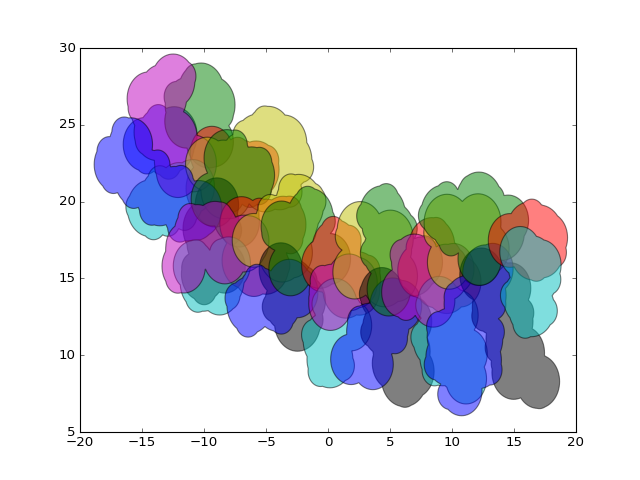

In [629]:
fig = plt.figure()

for i in range(32):
    res, resn, profile = profiles_data[i]
    X,Y = profile
    plt.fill(X,Y,alpha=0.5)

plt.show()

In [623]:
chain_profile = ampal_rp.vdw('simple')

In [642]:
data = find_vdw_minima(chain_profile, profiles_data, Rmin_tol=1)

'[[10.775791603338964, 6.058398834524789, "Y", 29], [17.046112979557776, 6.520417593209353, "R", 28], [6.20720166648454, 6.6067727881833225, "H", 21], [11.134654313196497, 6.825093388215999, "E", 25]]'

## Lower/Upper VdW profiles

In [ ]:
%%writefile /home/ba13026/mpmodeling/analysis/split_vdw_profile.py

import itertools
import more_itertools
import numpy
from operator import itemgetter

def split_vdw_profile(primitive_profile, vdw_profile):
    X_p,Y_p = primitive_profile
    X_vdw,Y_vdw = vdw_profile
    N_vdw = len(X_vdw)
    # Redefine primitive profile
    ## X-coords
    n_end = 10
    X_p_left_end = list(numpy.linspace(min(X_vdw),X_p[0],n_end))
    X_p_right_end = list(numpy.linspace(max(X_vdw),X_p[-1],n_end))
    X_p = X_p_left_end + X_p + X_p_right_end
    ## Y-coords
    Y_p_left_end = list(Y_p[0]*numpy.ones(n_end))
    Y_p_right_end = list(Y_p[-1]*numpy.ones(n_end))
    Y_p = Y_p_left_end + Y_p + Y_p_right_end

    # Get product of sets of indices for data points of each profile
    indices_p = list(range(len(X_p)))
    indices_vdw = list(range(len(X_vdw)))
    indices_product = list(itertools.product(indices_p,indices_vdw))

    # Get sets of 2D vectors from both profiles
    XY_p = numpy.array([X_p, Y_p]).T
    XY_vdw = numpy.array([X_vdw, Y_vdw]).T
    
    # Pairwise distances between points from different sets
    dist_p_vdw = [(numpy.linalg.norm(XY_p[i] - XY_vdw[j]),(i,j)) for i,j in indices_product]
    dist_p_vdw = sorted(dist_p_vdw, key=itemgetter(0)) ## Sort by first distance; low to high

    # Extract indices for points with minimum distance
    indx_p0, indx_vdw0 = dist_p_vdw[0][-1]
    for i in range(len(dist_p_vdw)):
        indx_p, indx_vdw = dist_p_vdw[i][-1]
        if abs(indx_p - indx_p0)>10:
            # Index points must be distant 
            break
    
    # Index range: first half VdW profile
    indx_range0 = list( range( min(indx_vdw0, indx_vdw), max(indx_vdw0, indx_vdw) ) )
    # Index range: second half VdW profile
    indx_range1 = list( set(list(range(N_vdw))) - set(indx_range0) )
    indx_range1 = sorted( indx_range1 )
    
    vdw_profile0 = [itemgetter(*indx_range0)(X_vdw), itemgetter(*indx_range0)(Y_vdw)]
    vdw_profile1 = [itemgetter(*indx_range1)(X_vdw), itemgetter(*indx_range1)(Y_vdw)]
    ###########################  REDEFINE PROFILE 1
    iterable = indx_range1
    indx_range10, indx_range11 = [list(group) for group in more_itertools.consecutive_groups(iterable)]

    X_vdw_range10 = itemgetter(*indx_range10)(X_vdw)
    X_vdw_range11 = itemgetter(*indx_range11)(X_vdw)

    if numpy.mean(X_vdw_range10) < numpy.mean(X_vdw_range11):
        X1_vdw_left = X_vdw_range10
        Y1_vdw_left = itemgetter(*indx_range10)(Y_vdw)

        X1_vdw_right = X_vdw_range11
        Y1_vdw_right = itemgetter(*indx_range11)(Y_vdw)
    else:
        X1_vdw_left = X_vdw_range11
        Y1_vdw_left = itemgetter(*indx_range11)(Y_vdw)

        X1_vdw_right = X_vdw_range10
        Y1_vdw_right = itemgetter(*indx_range10)(Y_vdw)
    #####################################################################
    base_transf = ['normal','reverse']
    transf_combination = list(itertools.product(base_transf, base_transf))

    def apply_transf(X, transf):
        if transf == 'normal':
            return list(X)
        elif transf == 'reverse':
            return list(reversed(X))

    for transf_L, transf_R in transf_combination:
        S_left = apply_transf(X1_vdw_left,transf_L)
        S_right = apply_transf(X1_vdw_right,transf_R)

        start_left = S_left[0]
        end_left = S_left[-1]

        start_right = S_right[0]
        end_right = S_right[-1]

        if abs(end_left - start_right) < 1:
            X1_vdw_left = S_left
            X1_vdw_right = S_right
            Y1_vdw_left = apply_transf(Y1_vdw_left,transf_L)
            Y1_vdw_right = apply_transf(Y1_vdw_right,transf_R)
            X1_vdw = X1_vdw_left + X1_vdw_right
            Y1_vdw = Y1_vdw_left + Y1_vdw_right
            break
    vdw_profile1 = [list(X1_vdw), list(Y1_vdw)]
    #####################################################################
    if numpy.mean(list(vdw_profile1[1])) > numpy.mean(list(vdw_profile0[1])):
        lower_vdw_profile = vdw_profile0
        upper_vdw_profile = vdw_profile1
        return lower_vdw_profile, upper_vdw_profile
    else:
        lower_vdw_profile = vdw_profile1
        upper_vdw_profile = vdw_profile0
        return lower_vdw_profile, upper_vdw_profile
    
if __name__ == "__main__":
    pass

## Find bottleneck residues 

In [783]:
%%writefile /home/ba13026/mpmodeling/analysis/channel_bottleneck.py
from operator import itemgetter

def find_vdw_minima(chain_profile, profile_per_residue_data, Rmin_tol = 1):
    X,Y = chain_profile
    Rmin_global = min(Y)
    ################################
    data_model = []
    for profile_data in profile_per_residue_data:
        res, resn, profile = profile_data
        sorted_profile = sorted(profile.T, key=itemgetter(1) )
        Z,R = sorted_profile[0]
        if abs(R - Rmin_global) <= Rmin_tol:
            data_model.append([Z,R,res,resn])
    data_model_sorted = sorted(data_model, key=itemgetter(1))
    return data_model_sorted

if __name__ == "__main__":
    pass

Writing /home/ba13026/mpmodeling/analysis/channel_bottleneck.py


# Scripts for (multiprocess) parallel implementation

## Input data

### Group samples

Save PDB paths per group, per mutant docked models.

In [351]:
mutant_paths = [
    "/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/cwza_NoWPN/3-analysis/md_relax/sem",
    "/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/cwzay373c_NoWPN/3-analysis/md_relax",
    "/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/cwzak375c_NoWPN/3-analysis/md_relax",
    "/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/cwzas355c_NoWPN/3-analysis/md_relax",
]

mutant_names = ['cWza','cWza-Y373C','cWza-K375C','cWza-S355C']

In [352]:
PDB_Paths = []
for i in range(len(mutant_names)):
    mutant_name = mutant_names[i]
    for group in ['narrow','wide']:
        path0 = mutant_paths[i]
        PDBs = [x.rstrip() for x in open(path0+'/'+group+'_pdbs.txt').readlines()]
        for pdb in PDBs:
            pdbname = pdb[:-4]
            tags = [mutant_name, group, pdbname]
            pdb_path = path0+'/'+group+'/input/'+pdb
            PDB_Paths.append([tags, pdb_path])

In [ ]:
from random import shuffle
PDB_Pathss = shuffle(PDB_Paths)

Save info dictionary as JSON file

In [ ]:
path0 = '/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/'
import json
with open(path0 + 'mutant_pdb_paths.json','w') as fp:
    json.dump(PDB_Paths, fp, sort_keys=True, indent=4)

### All models

In [996]:
mutant_paths = [
    "/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/cwza_NoWPN/3-analysis/cc-fitting/input",
    "/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/cwzak375c_NoWPN/3-analysis/input",
    "/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/cwzas355c_NoWPN/3-analysis/input",
    "/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/cwzay373c_NoWPN/3-analysis/input"
]

mutant_names = ['cWza','cWza-K375C','cWza-S355C','cWza-Y373C']

In [1000]:
PDB_Paths = []
for i in range(len(mutant_names)):
    mutant = mutant_names[i]
    group = 'None'
    path0 = mutant_paths[i]
    PDBs = ['refined1_0001_INPUT_'+format(n+1,'04d')+'_ignorechain.pdb' for n in range(1000)]
    for pdb in PDBs:
        pdbname = pdb[:-4]
        tags = [mutant, group, pdbname]
        pdb_path = path0+'/'+pdb
        PDB_Paths.append([tags, pdb_path])

Shuffle model data

In [1001]:
from random import shuffle
shuffle(PDB_Paths)

Save data as JSON file

In [1005]:
import json

path0 = '/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/'
filename = 'mutants_all_pdb_paths.json'
data = PDB_Paths
with open(path0 + filename,'w') as fp:
    json.dump(data, fp, sort_keys=True, indent=4)

## Database setup

### Version 1

In [ ]:
%%writefile /home/ba13026/mpmodeling/analysis/setup_db_geometry.py
#!/usr/bin/python

import os, sys, json
from sqlalchemy import Column, ForeignKey, Integer, String, Float, Enum, TypeDecorator
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import relationship
from sqlalchemy import create_engine

Base = declarative_base()

class Json(TypeDecorator):
    """Useful to turn seriable objects like lists into JSON objects"""
    impl = String
    def process_bind_param(self, value, dialect):
            return json.dumps(value)
    def process_result_value(self, value, dialect):
            return json.loads(value)

class Tags(Base):
    __tablename__ = 'tag'
    id = Column(Integer, primary_key=True) # SQL id 
    mutant = Column(String(250), nullable=False)
    group = Column(String(250), nullable=False)
    pdb_name = Column(String(250), nullable=False)

class RigidBody(Base):
    __tablename__ = 'rigid_body'
    id = Column(Integer, primary_key=True)
    # COM metrics
    com_bb = Column(Json)
    com_aa = Column(Json)
    com_primitives = Column(Json)
    com_assembly = Column(Json)
    # Euler angles from chain primitives
    euler_angles = Column(Json)
    # Foreign key 
    tag_id = Column(Integer, ForeignKey('tag.id'))
    tag = relationship(Tags)

class RadialProfiles(Base):
    __tablename__ = 'radial_profiles'
    id = Column(Integer, primary_key=True)
    primitive = Column(Json)
    punctual_bb = Column(Json)
    punctual_aa = Column(Json)
    vdw_bb = Column(Json)
    vdw_aa = Column(Json)
    # Foreign key 
    tag_id = Column(Integer, ForeignKey('tag.id'))
    tag = relationship(Tags)

if __name__ == "__main__":
    outdb = sys.argv[1] # database name (.db)
    engine = create_engine('sqlite:///'+outdb)
    Base.metadata.create_all(engine)

### Version 2

In [ ]:
%%writefile /home/ba13026/mpmodeling/analysis/setup_db_geometry.py
#!/usr/bin/python

import os, sys, json
from sqlalchemy import Column, ForeignKey, Integer, String, Float, Enum, TypeDecorator
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import relationship
from sqlalchemy import create_engine

Base = declarative_base()

class Json(TypeDecorator):
    """Useful to turn seriable objects like lists into JSON objects"""
    impl = String
    def process_bind_param(self, value, dialect):
            return json.dumps(value)
    def process_result_value(self, value, dialect):
            return json.loads(value)

class Tags(Base):
    __tablename__ = 'tag'
    id = Column(Integer, primary_key=True) # SQL id 
    mutant = Column(String(250), nullable=False)
    group = Column(String(250), nullable=False)
    pdb_name = Column(String(250), nullable=False)

class RigidBody(Base):
    __tablename__ = 'rigid_body'
    id = Column(Integer, primary_key=True)
    # COM metrics
    com_bb = Column(Json)
    com_aa = Column(Json)
    com_primitives = Column(Json)
    com_assembly = Column(Json)
    # Euler angles from chain primitives
    euler_angles = Column(Json)
    # Foreign key 
    tag_id = Column(Integer, ForeignKey('tag.id'))
    tag = relationship(Tags)

class RadialProfiles(Base):
    __tablename__ = 'radial_profiles'
    id = Column(Integer, primary_key=True)
    primitive = Column(Json)
    punctual_bb = Column(Json)
    punctual_aa = Column(Json)
    vdw_bb_lower = Column(Json)
    vdw_bb_upper = Column(Json)
    vdw_aa_lower = Column(Json)
    vdw_aa_upper = Column(Json)
    # Foreign key 
    tag_id = Column(Integer, ForeignKey('tag.id'))
    tag = relationship(Tags)

if __name__ == "__main__":
    outdb = sys.argv[1] # database name (.db)
    engine = create_engine('sqlite:///'+outdb)
    Base.metadata.create_all(engine)

Add execution permission 

In [ ]:
%%bash
chmod +x /home/ba13026/mpmodeling/analysis/setup_db_geometry.py

### Version 3

CHANGES:

* Added Bottleneck data 

In [649]:
%%writefile /home/ba13026/mpmodeling/analysis/setup_db_geometry.py
#!/usr/bin/python

import os, sys, json
from sqlalchemy import Column, ForeignKey, Integer, String, Float, Enum, TypeDecorator
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import relationship
from sqlalchemy import create_engine

Base = declarative_base()

class Json(TypeDecorator):
    """Useful to turn seriable objects like lists into JSON objects"""
    impl = String
    def process_bind_param(self, value, dialect):
            return json.dumps(value)
    def process_result_value(self, value, dialect):
            return json.loads(value)

class Tags(Base):
    __tablename__ = 'tag'
    id = Column(Integer, primary_key=True) # SQL id 
    mutant = Column(String(250), nullable=False)
    group = Column(String(250), nullable=False)
    pdb_name = Column(String(250), nullable=False)

class RigidBody(Base):
    __tablename__ = 'rigid_body'
    id = Column(Integer, primary_key=True)
    # COM metrics
    com_bb = Column(Json)
    com_aa = Column(Json)
    com_primitives = Column(Json)
    com_assembly = Column(Json)
    # Euler angles from chain primitives
    euler_angles = Column(Json)
    # Foreign key 
    tag_id = Column(Integer, ForeignKey('tag.id'))
    tag = relationship(Tags)

class RadialProfiles(Base):
    __tablename__ = 'radial_profiles'
    id = Column(Integer, primary_key=True)
    primitive = Column(Json)
    punctual_bb = Column(Json)
    punctual_aa = Column(Json)
    vdw_bb_lower = Column(Json)
    vdw_bb_upper = Column(Json)
    vdw_aa_lower = Column(Json)
    vdw_aa_upper = Column(Json)
    # Foreign key 
    tag_id = Column(Integer, ForeignKey('tag.id'))
    tag = relationship(Tags)

class Miscellaneous(Base):
    __tablename__ = 'miscellaneous'
    id = Column(Integer, primary_key=True)
    vdw_minima = Column(Json)
    # Foreign key 
    tag_id = Column(Integer, ForeignKey('tag.id'))
    tag = relationship(Tags)
    
if __name__ == "__main__":
    outdb = sys.argv[1] # database name (.db)
    engine = create_engine('sqlite:///'+outdb)
    Base.metadata.create_all(engine)

Overwriting /home/ba13026/mpmodeling/analysis/setup_db_geometry.py


Add execution permission

In [641]:
%%bash
chmod +x /home/ba13026/mpmodeling/analysis/setup_db_geometry.py

## Database insertion

### Version 1

In [ ]:
%%writefile /home/ba13026/mpmodeling/analysis/insert2db_geometry.py
#!/usr/bin/python

import sys
import os
import numpy
import operator
import subprocess
import json
import concurrent.futures
import isambard_dev
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker

# Import modules from folder
modules_path = "/home/ba13026/mpmodeling/analysis/"
if modules_path not in sys.path:
    sys.path.append(modules_path)

from setup_db_geometry import Json, Tags, RigidBody, RadialProfiles, Base
import rigid_body
import radial_profile

dbfile  = sys.argv[1] # Database filename
mutants_info = sys.argv[2] # Dictionary with mutant structures info
ncores = int(sys.argv[3]) # Number of cores

# Extract info from dictionary
with open(mutants_info, 'r') as fp:
        PDBs_Info = json.load(fp)

# Create engine and bind it to current session
engine = create_engine('sqlite:///'+dbfile)
Base.metadata.bind = engine
DBSession = sessionmaker(bind=engine)
session = DBSession()

def get_rigid_body_data(ampal):
    try:
        com_bb = [unit.backbone.centre_of_mass for unit in ampal]
        com_aa = [unit.centre_of_mass for unit in ampal]
        #####################################
        ampal_rb = rigid_body.RigidBody(ampal)
        com_primitives = ampal_rb.get_chains_com()
        com_assembly = ampal_rb.get_assembly_com()
        #####################################
        euler_angles = ampal_rb.euler_angles() # Based on chain primitives
        #####################################
        # Convert to list format for JSON serialisation
        com_bb = list(map(list, com_bb))
        com_aa = list(map(list, com_aa))
        com_primitives = list(map(list, com_primitives))
        com_assembly = list(com_assembly)
        euler_angles = list(map(list, euler_angles))
        #####################################
        return com_bb, com_aa, com_primitives, com_assembly, euler_angles
    except:
        return 'Fail'

def get_radial_profiles(ampal):
    try:
        ampal_rp_bb = radial_profile.RadialProfile(ampal.backbone)
        ampal_rp_aa = radial_profile.RadialProfile(ampal)
        #####################################
        primitive = ampal_rp_aa.primitive()
        #####################################
        punctual_bb = ampal_rp_bb.punctual()
        punctual_aa = ampal_rp_aa.punctual()
        #####################################
        vdw_bb = ampal_rp_bb.vdw('simple')
        vdw_aa = ampal_rp_aa.vdw('simple')
        #####################################
        primitive = list(map(list, primitive))
        punctual_bb = list(map(list, punctual_bb))
        punctual_aa = list(map(list, punctual_aa))
        vdw_bb = list(map(list, vdw_bb))
        vdw_aa = list(map(list, vdw_aa))
        return primitive, punctual_bb, punctual_aa, vdw_bb, vdw_aa
    except:
        return 'Fail'

def process_model(n):
    """Insert description here"""
    #####################################
    # Model identifiers
    tags, pdb_path = PDBs_Info[n]
    mutant, group, pdb_name = tags
    model_tags  = Tags(mutant = mutant, group = group, pdb_name = pdb_name)
    session.add(model_tags)
    #####################################
    ampal = isambard_dev.ampal.convert_pdb_to_ampal(pdb_path)
    #####################################
    ##  Rigid body data
    dataRB = get_rigid_body_data(ampal)
    modelRB = RigidBody(
                        com_bb = dataRB[0],
                        com_aa = dataRB[1],
                        com_primitives = dataRB[2],
                        com_assembly = dataRB[3],
                        euler_angles = dataRB[4],
                        tag = model_tags
                        )
    session.add(modelRB)
    #####################################
    ## Radial profiles
    dataRP = get_radial_profiles(ampal)
    modelRP = RadialProfiles(
                            primitive = dataRP[0],
                            punctual_bb = dataRP[1],
                            punctual_aa = dataRP[2],
                            vdw_bb = dataRP[3],
                            vdw_aa = dataRP[4],
                            tag = model_tags
                            )
    session.add(modelRP)
    #####################################
    ## COMMIT CHANGES TO DATABASE  
    session.commit()
#####################################
# Parallel Process Execution
model_n = list(range(len(PDBs_Info)))
def main():
        with concurrent.futures.ProcessPoolExecutor(max_workers = ncores) as executor:
                executor.map(process_model, model_n)

if __name__ == '__main__':
        main()        

### Version 2

CHANGES:

* Includes split VdW profiles into lower and upper parts, for both BB (backbone) and AA (all-atom) VdW profiles. This uses `split_vdw_profile.py`

In [ ]:
%%writefile /home/ba13026/mpmodeling/analysis/insert2db_geometry.py
#!/usr/bin/python

import sys
import os
import numpy
import operator
import subprocess
import json
import concurrent.futures
import isambard_dev
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker

# Import modules from folder
modules_path = "/home/ba13026/mpmodeling/analysis/"
if modules_path not in sys.path:
    sys.path.append(modules_path)

from setup_db_geometry import Json, Tags, RigidBody, RadialProfiles, Base
from split_vdw_profile import split_vdw_profile
import rigid_body
import radial_profile

def get_rigid_body_data(ampal):
    try:
        com_bb = [unit.backbone.centre_of_mass for unit in ampal]
        com_aa = [unit.centre_of_mass for unit in ampal]
        #####################################
        ampal_rb = rigid_body.RigidBody(ampal)
        com_primitives = ampal_rb.get_chains_com()
        com_assembly = ampal_rb.get_assembly_com()
        #####################################
        euler_angles = ampal_rb.euler_angles() # Based on chain primitives
        #####################################
        # Convert to list format for JSON serialisation
        com_bb = list(map(list, com_bb))
        com_aa = list(map(list, com_aa))
        com_primitives = list(map(list, com_primitives))
        com_assembly = list(com_assembly)
        euler_angles = list(map(list, euler_angles))
        #####################################
        return com_bb, com_aa, com_primitives, com_assembly, euler_angles
    except:
        return 'Fail'

def get_radial_profiles(ampal):
    try:
        ampal_rp_bb = radial_profile.RadialProfile(ampal.backbone)
        ampal_rp_aa = radial_profile.RadialProfile(ampal)
        ####################################
        primitive = ampal_rp_aa.primitive()
        ####################################
        punctual_bb = ampal_rp_bb.punctual()
        punctual_aa = ampal_rp_aa.punctual()
        #####################################
        vdw_bb = ampal_rp_bb.vdw('simple')
        vdw_aa = ampal_rp_aa.vdw('simple')
        #####################################
        # Turn into lists to make JSON seriable
        primitive = list(map(list, primitive))
        punctual_bb = list(map(list, punctual_bb))
        punctual_aa = list(map(list, punctual_aa))
        vdw_bb = list(map(list, vdw_bb))
        vdw_aa = list(map(list, vdw_aa))
        ####################################
        # Split VdW profiles and make JSON seriable
        vdw_bb_lower, vdw_bb_upper = split_vdw_profile(primitive, vdw_bb)
        vdw_aa_lower, vdw_aa_upper = split_vdw_profile(primitive, vdw_aa)
        # Make JSON seriable
        vdw_bb_lower = list(map(list, vdw_bb_lower))
        vdw_bb_upper = list(map(list, vdw_bb_upper))
        vdw_aa_lower = list(map(list, vdw_aa_lower))
        vdw_aa_upper = list(map(list, vdw_aa_upper))
        ####################################
        return primitive, punctual_bb, punctual_aa, vdw_bb_lower, vdw_bb_upper, vdw_aa_lower, vdw_aa_upper
    except:
        return 'Fail'    

def process_model(n):
    """Insert description here"""
    #####################################
    # Model identifiers
    tags, pdb_path = PDBs_Info[n]
    mutant, group, pdb_name = tags
    model_tags  = Tags(mutant = mutant, group = group, pdb_name = pdb_name)
    session.add(model_tags)
    #####################################
    ampal = isambard_dev.ampal.convert_pdb_to_ampal(pdb_path)
    #####################################
    ##  Rigid body data
    dataRB = get_rigid_body_data(ampal)
    modelRB = RigidBody(
                        com_bb = dataRB[0],
                        com_aa = dataRB[1],
                        com_primitives = dataRB[2],
                        com_assembly = dataRB[3],
                        euler_angles = dataRB[4],
                        tag = model_tags
                        )
    session.add(modelRB)
    #####################################
    ## Radial profiles
    dataRP = get_radial_profiles(ampal)
    modelRP = RadialProfiles(
                            primitive = dataRP[0],
                            punctual_bb = dataRP[1],
                            punctual_aa = dataRP[2],
                            vdw_bb_lower = dataRP[3],
                            vdw_bb_upper = dataRP[4],    
                            vdw_aa_lower = dataRP[5],
                            vdw_aa_upper = dataRP[6],
                            tag = model_tags
                            )
    session.add(modelRP)
    #####################################
    ## COMMIT CHANGES TO DATABASE  
    session.commit()
#####################################
# Parallel Process Execution
def main():
        model_n = list(range(len(PDBs_Info)))
        with concurrent.futures.ProcessPoolExecutor(max_workers = ncores) as executor:
                executor.map(process_model, model_n)

if __name__ == '__main__':
    dbfile  = sys.argv[1] # Database filename
    mutants_info = sys.argv[2] # Dictionary with mutant structures info
    ncores = int(sys.argv[3]) # Number of cores

    # Extract info from dictionary
    with open(mutants_info, 'r') as fp:
            PDBs_Info = json.load(fp)

    # Create engine and bind it to current session
    engine = create_engine('sqlite:///'+dbfile)
    Base.metadata.bind = engine
    DBSession = sessionmaker(bind=engine)
    session = DBSession()
 
    main()        

In [ ]:
%%bash
chmod +x /home/ba13026/mpmodeling/analysis/insert2db_geometry.py

### Version 3

CHANGES:

* Added VdW profile minima and residue identity data

In [787]:
%%writefile /home/ba13026/mpmodeling/analysis/insert2db_geometry.py
#!/usr/bin/python

import sys
import os
import numpy
import operator
import subprocess
import json
import concurrent.futures
import isambard_dev
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker

# Import modules from folder
modules_path = "/home/ba13026/mpmodeling/analysis/"
if modules_path not in sys.path:
    sys.path.append(modules_path)

from setup_db_geometry import Json, Tags, RigidBody, RadialProfiles, Miscellaneous, Base
from split_vdw_profile import split_vdw_profile
from channel_bottleneck import find_vdw_minima
import rigid_body
import radial_profile


def get_rigid_body_data(ampal):
    try:
        com_bb = [unit.backbone.centre_of_mass for unit in ampal]
        com_aa = [unit.centre_of_mass for unit in ampal]
        #####################################
        ampal_rb = rigid_body.RigidBody(ampal)
        com_primitives = ampal_rb.get_chains_com()
        com_assembly = ampal_rb.get_assembly_com()
        #####################################
        euler_angles = ampal_rb.euler_angles() # Based on chain primitives
        #####################################
        # Convert to list format for JSON serialisation
        com_bb = list(map(list, com_bb))
        com_aa = list(map(list, com_aa))
        com_primitives = list(map(list, com_primitives))
        com_assembly = list(com_assembly)
        euler_angles = list(map(list, euler_angles))
        #####################################
        return com_bb, com_aa, com_primitives, com_assembly, euler_angles
    except:
        return 'Fail'

def get_radial_profiles(ampal):
    try:
        ampal_rp_bb = radial_profile.RadialProfile(ampal.backbone)
        ampal_rp_aa = radial_profile.RadialProfile(ampal)
        ####################################
        primitive = ampal_rp_aa.primitive()
        ####################################
        punctual_bb = ampal_rp_bb.punctual()
        punctual_aa = ampal_rp_aa.punctual()
        #####################################
        vdw_bb = ampal_rp_bb.vdw('simple')
        vdw_aa = ampal_rp_aa.vdw('simple')
        #####################################
        # Turn into lists to make JSON seriable
        primitive = list(map(list, primitive))
        punctual_bb = list(map(list, punctual_bb))
        punctual_aa = list(map(list, punctual_aa))
        vdw_bb = list(map(list, vdw_bb))
        vdw_aa = list(map(list, vdw_aa))
        ####################################
        # Split VdW profiles and make JSON seriable
        vdw_bb_lower, vdw_bb_upper = split_vdw_profile(primitive, vdw_bb)
        vdw_aa_lower, vdw_aa_upper = split_vdw_profile(primitive, vdw_aa)
        # Make JSON seriable
        vdw_bb_lower = list(map(list, vdw_bb_lower))
        vdw_bb_upper = list(map(list, vdw_bb_upper))
        vdw_aa_lower = list(map(list, vdw_aa_lower))
        vdw_aa_upper = list(map(list, vdw_aa_upper))
        ####################################
        return primitive, punctual_bb, punctual_aa, vdw_bb_lower, vdw_bb_upper, vdw_aa_lower, vdw_aa_upper
    except:
        return 'Fail'    

def get_vdw_minima(ampal):
    try:
        ampal_rp_aa = radial_profile.RadialProfile(ampal)
        chain_profile = ampal_rp_aa.vdw('simple')
        residue_profiles_data = ampal_rp_aa.vdw_per_residue('simple')
        vdw_minima = find_vdw_minima(chain_profile, residue_profiles_data, Rmin_tol=1)
        return vdw_minima
    except:
        return 'Fail'
    
def process_model(n):
    """Insert description here"""
    #####################################
    # Model identifiers
    tags, pdb_path = PDBs_Info[n]
    mutant, group, pdb_name = tags
    model_tags  = Tags(mutant = mutant, group = group, pdb_name = pdb_name)
    session.add(model_tags)
    #####################################
    ampal = isambard_dev.ampal.convert_pdb_to_ampal(pdb_path)
    #####################################
    ##  Rigid body data
    dataRB = get_rigid_body_data(ampal)
    modelRB = RigidBody(
                        com_bb = dataRB[0],
                        com_aa = dataRB[1],
                        com_primitives = dataRB[2],
                        com_assembly = dataRB[3],
                        euler_angles = dataRB[4],
                        tag = model_tags
                        )
    session.add(modelRB)
    #####################################
    ## Radial profiles
    dataRP = get_radial_profiles(ampal)
    modelRP = RadialProfiles(
                            primitive = dataRP[0],
                            punctual_bb = dataRP[1],
                            punctual_aa = dataRP[2],
                            vdw_bb_lower = dataRP[3],
                            vdw_bb_upper = dataRP[4],    
                            vdw_aa_lower = dataRP[5],
                            vdw_aa_upper = dataRP[6],
                            tag = model_tags
                            )
    session.add(modelRP)
    #####################################
    # Minima from VdW chain profile and residue identity
    dataM = get_vdw_minima(ampal)
    modelM = Miscellaneous(vdw_minima = dataM)
    session.add(modelM)
    #####################################
    ## COMMIT CHANGES TO DATABASE  
    session.commit()
#####################################
# Parallel Process Execution
def main():
        model_n = list(range(len(PDBs_Info)))
        with concurrent.futures.ProcessPoolExecutor(max_workers = ncores) as executor:
                executor.map(process_model, model_n)

if __name__ == '__main__':
    dbfile  = sys.argv[1] # Database filename
    mutants_info = sys.argv[2] # Dictionary with mutant structures info
    ncores = int(sys.argv[3]) # Number of cores

    # Extract info from dictionary
    with open(mutants_info, 'r') as fp:
            PDBs_Info = json.load(fp)

    # Create engine and bind it to current session
    engine = create_engine('sqlite:///'+dbfile)
    Base.metadata.bind = engine
    DBSession = sessionmaker(bind=engine)
    session = DBSession()
 
    main()        

Overwriting /home/ba13026/mpmodeling/analysis/insert2db_geometry.py


In [785]:
%%bash
chmod +x /home/ba13026/mpmodeling/analysis/insert2db_geometry.py

# Reading DB

**TO-DOs**:

* Make function to compute radial metrics for comparison with primitive based values

* Make separate plots for Rigid Body stuff (COMs and Euler angles)

In [2]:
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker

modules_path = "/home/ba13026/mpmodeling/analysis/"
if modules_path not in sys.path:
    sys.path.append(modules_path)

from setup_db_geometry import Json, Tags, RigidBody, RadialProfiles, Base

path0 = '/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/'
dbfile = path0 + 'mutant_pdb_geometry_new4.db'
engine = create_engine('sqlite:///'+dbfile)
Base.metadata.bind = engine
DBSession = sessionmaker()
DBSession.bind = engine
session = DBSession()

## Rigid body

### Chain orientation

<IPython.core.display.Javascript object>


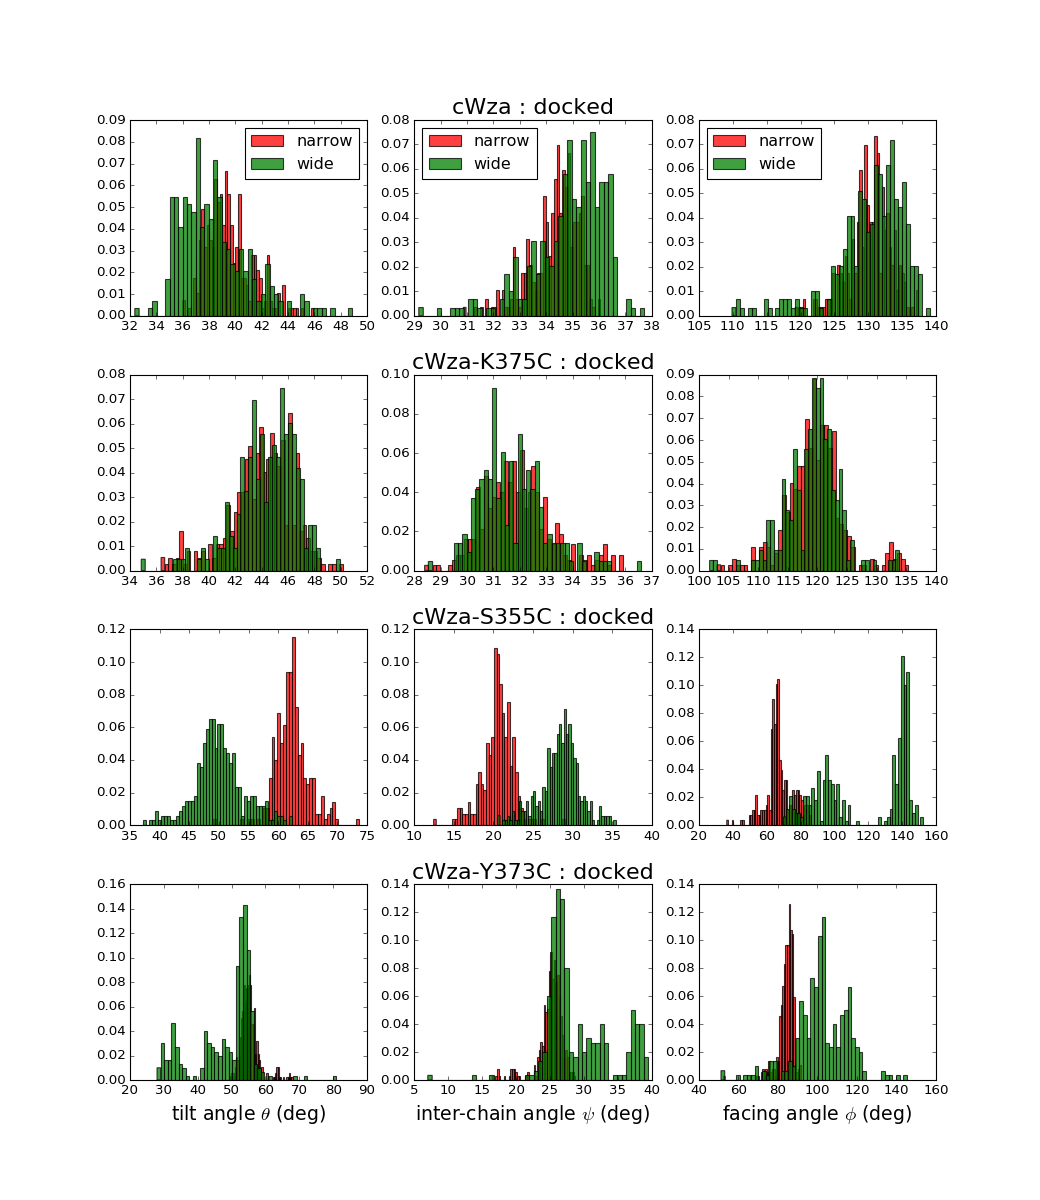

In [21]:
mutant_names = ['cWza','cWza-K375C','cWza-S355C','cWza-Y373C']
n_mutants = len(mutant_names)
f_hist, ax = plt.subplots(n_mutants,3,figsize=(13,15))

Colors = {
    'narrow':'red',
    'wide':'green'
}

def weights4hist(x):
    weights = numpy.ones_like(x)/float(len(x))
    return weights

xlabels = [
    "tilt angle $\\theta$ (deg)",
    "inter-chain angle $\\psi$ (deg)",
    "facing angle $\\phi$ (deg)"
]

for i in range(len(mutant_names)):
    mutant = mutant_names[i]
    for group in ['narrow', 'wide']:
        Theta = []; Psi = []; Phi = []
        # Create lists for radial metrics
        model_ids = [x[0] for x in session.query(Tags.id).filter_by(mutant = mutant, group = group)]
        for j in range(len(model_ids)):
            id = model_ids[j]
            euler_angles = session.query(RigidBody.euler_angles).filter_by(id = id).all()[0][0]
            theta_per_chain, psi_per_chain_pair, phi_per_chain = euler_angles
            ###########################################
            Theta.append( numpy.mean(theta_per_chain) )
            Psi.append( numpy.mean(psi_per_chain_pair) )
            Phi.append( numpy.mean(phi_per_chain) )
            
        ax[i,0].hist(Theta,bins=50,weights=weights4hist(Theta),color=Colors[group],label=group,alpha=0.75)
        ax[i,1].hist(Psi,bins=50,weights=weights4hist(Psi),color=Colors[group],label=group,alpha=0.75)
        ax[i,2].hist(Phi,bins=50,weights=weights4hist(Phi),color=Colors[group],label=group,alpha=0.75)
        
        ax[i,1].set_title(mutant+' : docked',fontsize=20)
        
f_hist.subplots_adjust(hspace=0.3)
   
for i in range(3):
    ax[-1,i].set_xlabel(xlabels[i],fontsize=17)
    ax[0,i].legend(loc='best')
    
plt.show()

### Chain radial profiles

<IPython.core.display.Javascript object>


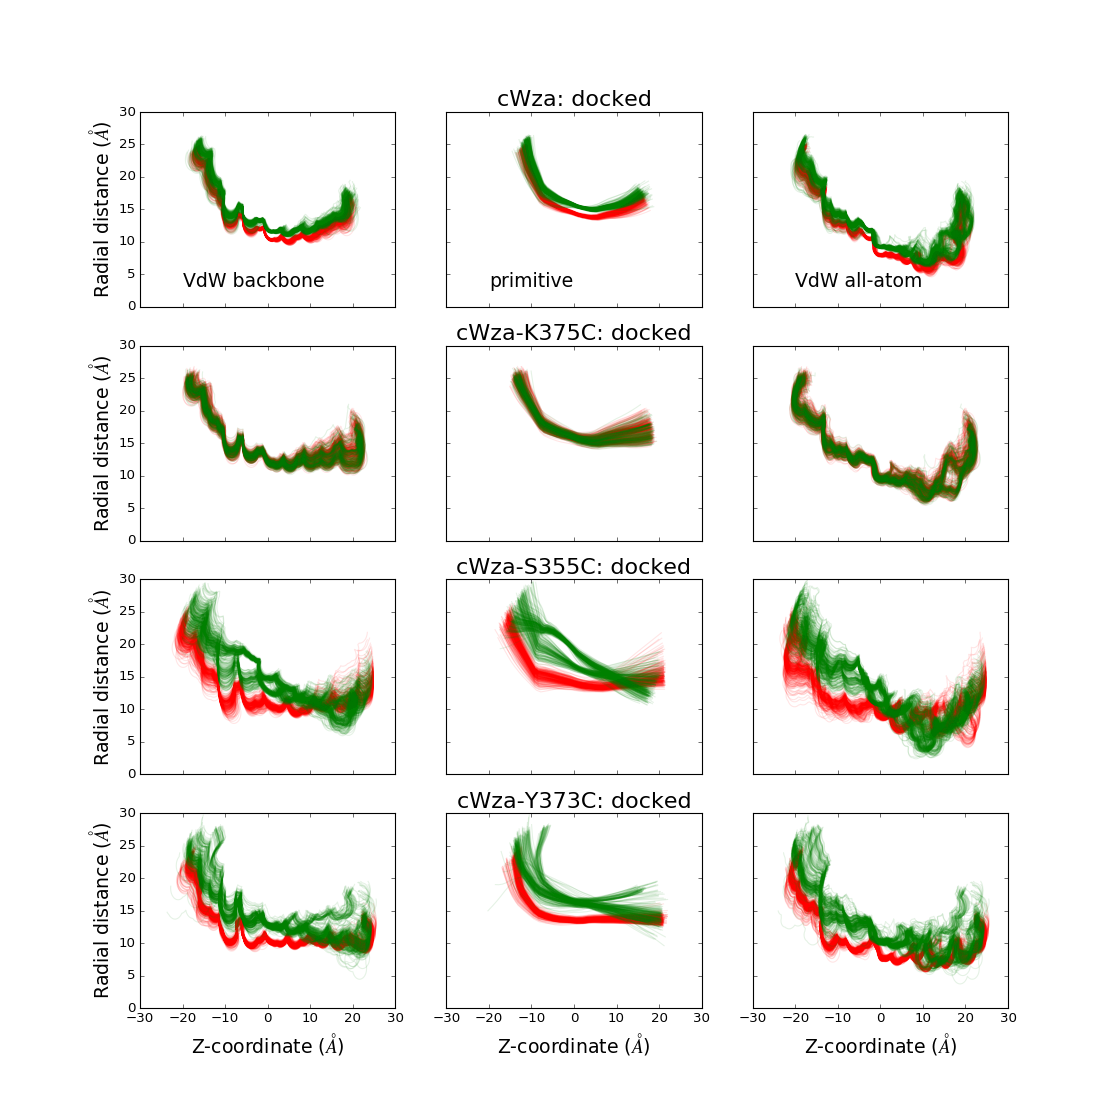

In [41]:
mutant_names = ['cWza','cWza-K375C','cWza-S355C','cWza-Y373C']

ProfileTypes = {
        'primitive':RadialProfiles.primitive,
        'VdW backbone':RadialProfiles.vdw_bb_lower,
        'VdW all-atom':RadialProfiles.vdw_aa_lower
}

Labels = {
        'primitive':RadialProfiles.primitive,
        'VdW backbone':RadialProfiles.vdw_bb_lower,
        'VdW all-atom':RadialProfiles.vdw_aa_lower
}

n_rows = len(mutant_names)
n_cols = len(ProfileTypes.keys())
fig, ax = plt.subplots(n_rows,n_cols,figsize=(14,14),sharex=True,sharey=True)

Colors = {
    'narrow':{'primitive':'red','VdW backbone':'red','VdW all-atom':'red'},
    'wide':{'primitive':'green','VdW backbone':'green','VdW all-atom':'green'}
}

Groups = ['narrow','wide']

N_models = {}
for i in range(len(mutant_names)):
    mutant = mutant_names[i]
    N_models[mutant] = {}
    for group in Groups:
        model_ids = [x[0] for x in session.query(Tags.id).filter_by(mutant = mutant, group = group)]
        N_models[mutant][group] = len(model_ids)
        for j in range(N_models[mutant][group]):
            id = model_ids[j]
            ###############################
            c = 0
            for key in ProfileTypes.keys():
                profile = session.query(ProfileTypes[key]).filter_by(id = id).all()[0][0]
                X,Y = profile
                ax[i][c].plot(X,Y,c=Colors[group][key],alpha=0.1)
                c += 1
#         ax[i][].plot(X,Y,c=Colors[group][key],label=group,alpha=0.1)
        
        
for n in range(n_rows):
    ax[n][0].set_ylabel('Radial distance ($\AA$)',fontsize=17)
    ax[n][1].set_title(mutant_names[n]+': docked',fontsize=20)
    
for n in range(n_cols):
#     ax[0][n].legend(loc = 'best')
    ax[0][n].text(-20,3,list(ProfileTypes.keys())[n], fontsize=17)
    ax[-1][n].set_xlabel('Z-coordinate ($\AA$)',fontsize=17)
        
plt.show()

In [ ]:
fig_theta, ax = plt.subplots(4,1, figsize=(6,12))

mutant_names = ['cWza','cWza-K375C','cWza-S355C','cWza-Y373C']

Colors = {
    'narrow':'red',
    'wide':'green'
}

n_chains = 8 
for i in range(len(mutant_names)):
    mutant = mutant_names[i]
    for group in ['narrow','wide']:
        Theta = []
        Phi = []
        model_ids = [x[0] for x in session.query(Tags.id).filter_by(mutant = mutant, group = group)]
        for j in range(len(model_ids)):
            mcolor = numpy.random.rand(3)
            id = model_ids[j]
            euler_angles = session.query(RigidBody.euler_angles).filter_by(id = id).all()[0][0]
            theta, phi, psi = numpy.array([euler_angles[i] for i in range(n_chains)]).T
#             theta, phi, psi = numpy.array([list(map(numpy.deg2rad, euler_angles[i])) for i in range(n_chains)]).T
            Theta.append(theta[0])
            
        ax[i].hist(Theta,bins=50,color=Colors[group],alpha=0.75)

# ax.set_rlim(0,1)
plt.show()

## Basic radial metrics

### Primitive profiles

<IPython.core.display.Javascript object>


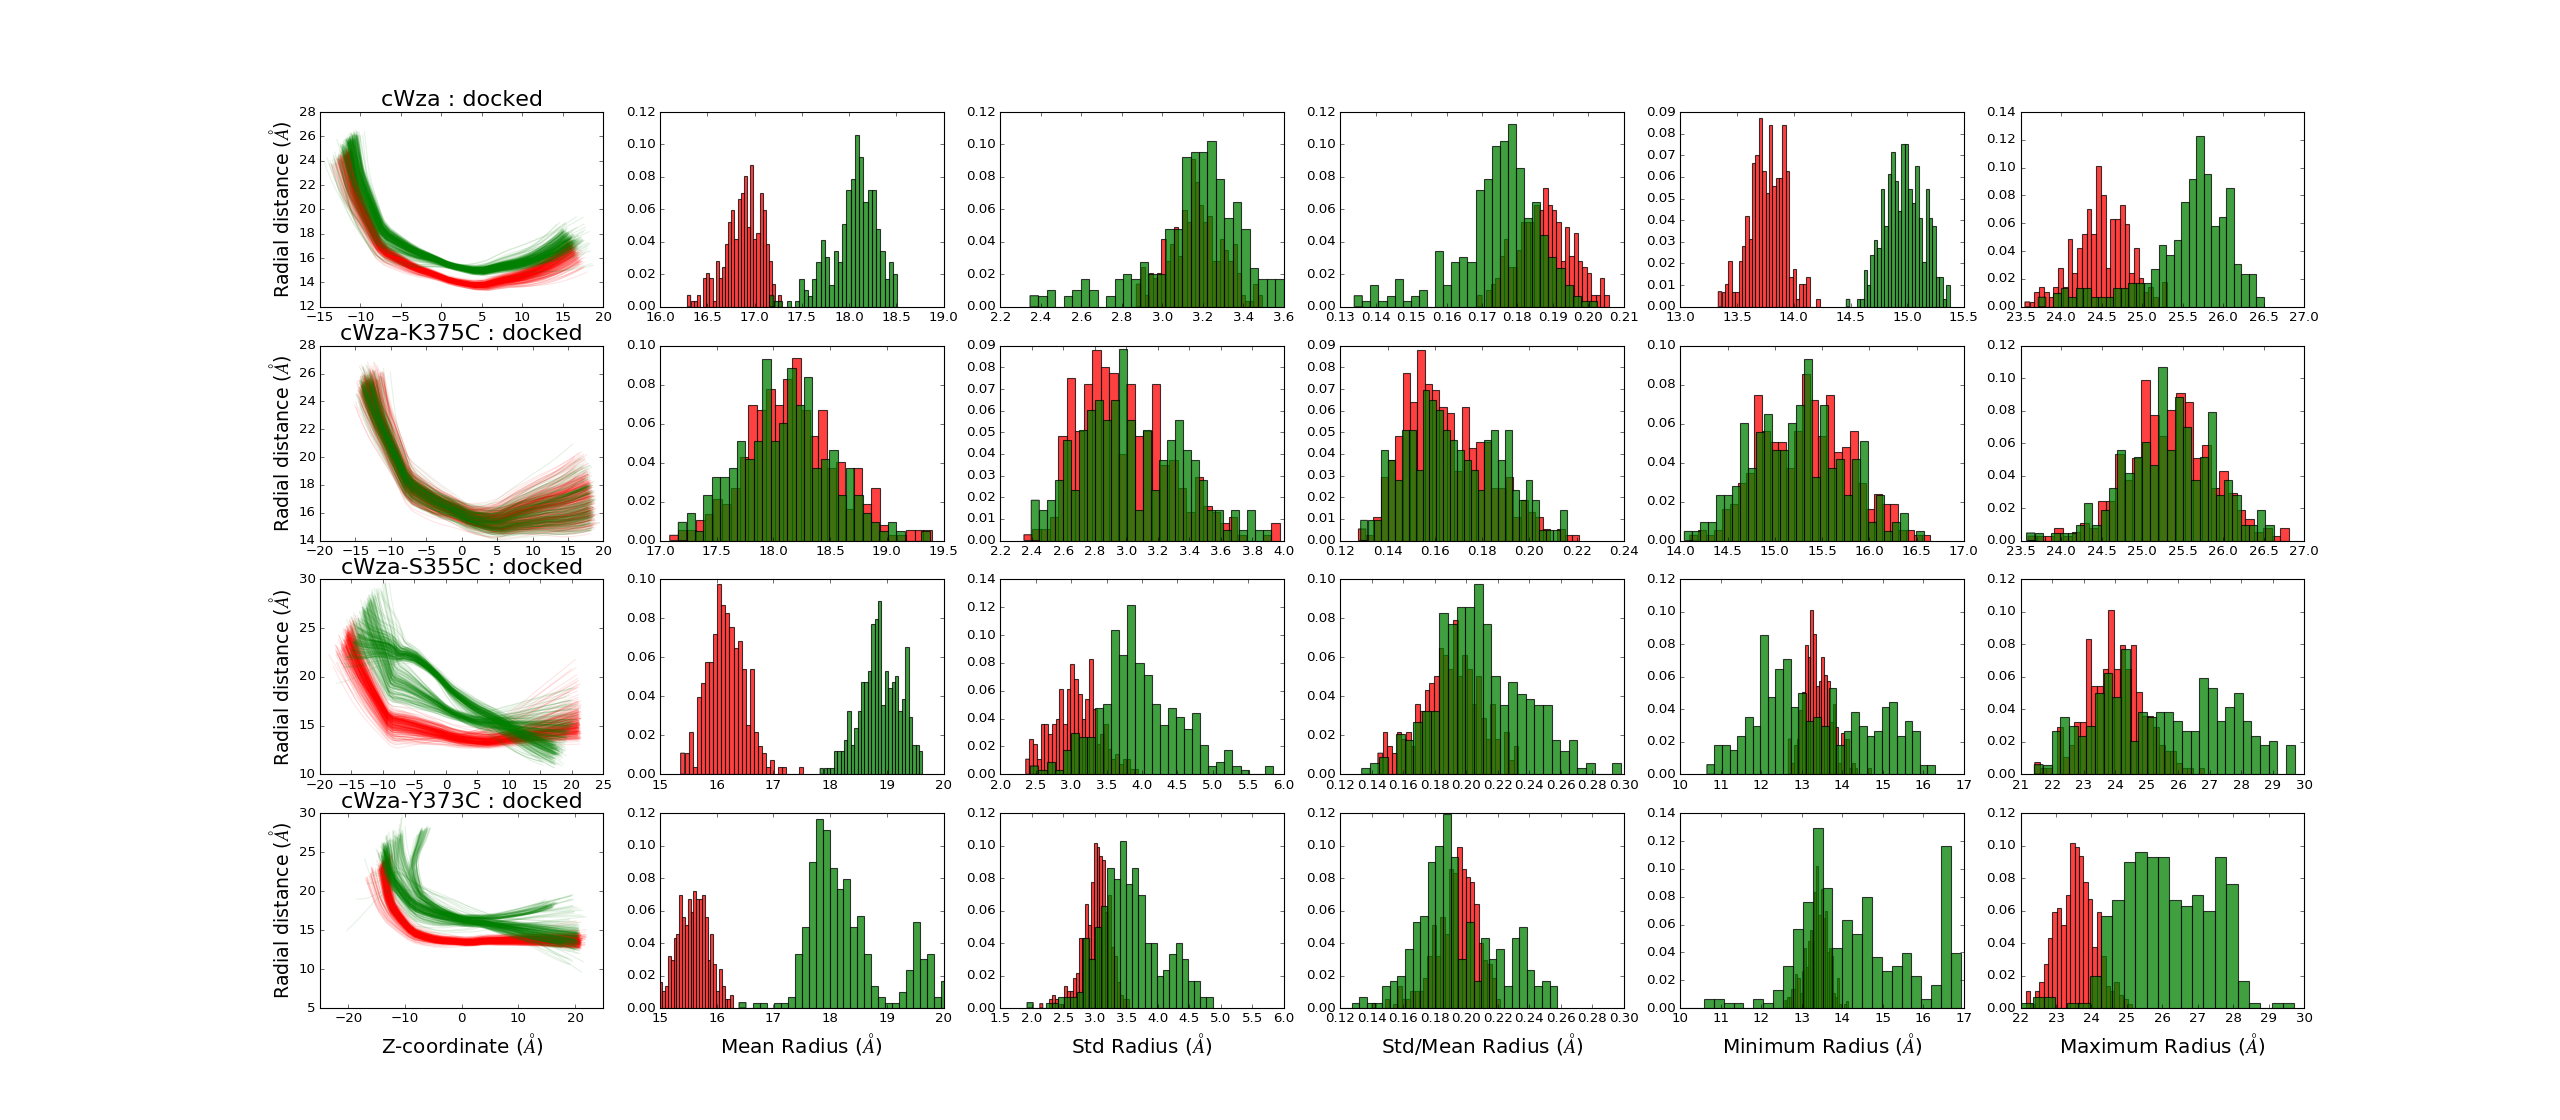

In [54]:
mutant_names = ['cWza','cWza-K375C','cWza-S355C','cWza-Y373C']
n_rows = len(mutant_names)
metrics = ['mean','std','cv','min','max']
n_cols = len(metrics)+1

Colors = {
    'narrow':{'primitive':'red','VdW_BB':'red','VdW_AA':'red'},
    'wide':{'primitive':'green','VdW_BB':'green','VdW_AA':'green'}
}

def compute_radial_metrics(profile_Y, metric):
    if metric == 'mean':
        return numpy.mean(profile_Y)
    elif metric == 'std':
        return numpy.std(profile_Y)
    elif metric == 'cv':
        return numpy.std(profile_Y)/numpy.mean(profile_Y)
    elif metric == 'min':
        return min(profile_Y)
    elif metric == 'max':
        return max(profile_Y)

def weights4hist(x):
    weights = numpy.ones_like(x)/float(len(x))
    return weights
 
xlims = [
    [-25,25],
    [15,20],
    [1.5,6],
    [0.12,0.3],
    [10,17],
    [22,30]
]

fig, ax = plt.subplots(n_rows,n_cols,figsize=(32,14))

Groups = ['narrow','wide']

R_metrics = {}
N_models = {}
for i in range(len(mutant_names)):
    mutant = mutant_names[i]
    N_models[mutant] = {}
    ###############################
    R_metrics[mutant] = {}
    for group in Groups:
        # Create lists for radial metrics
        R_metrics[mutant][group] = {}
        for key in metrics:
            R_metrics[mutant_names[i]][group][key] = []
        ###############################
        model_ids = [x[0] for x in session.query(Tags.id).filter_by(mutant = mutant, group = group)]
        N_models[mutant][group] = len(model_ids)
        for j in range(N_models[mutant][group]):
            id = model_ids[j]
            primitive_profile = session.query(RadialProfiles.primitive).filter_by(id = id).all()[0][0]
            X,Y = primitive_profile
            ax[i][0].plot(X,Y,c=Colors[group]['primitive'],alpha=0.1)
            for key in metrics:
                R_metrics[mutant][group][key].append(compute_radial_metrics(Y,key))
        for k in range(len(metrics)):
            X = R_metrics[mutant][group][metrics[k]]
            ax[i][k+1].hist(X,bins=30,weights=weights4hist(X),color=Colors[group]['primitive'],alpha=0.75)

for n in range(n_rows):
    ax[n][0].set_ylabel("Radial distance ($\AA$)",fontsize=17)
    ax[n][0].set_title(mutant_names[n]+" : docked",fontsize=20)
    for k in range(n_cols):
        x0,x1 = xlims[k]
        ax[i][k].set_xlim(x0,x1)

xlabels = [
    "Z-coordinate ($\AA$)",
    "Mean Radius ($\AA$)",
    "Std Radius ($\AA$)",
    "Std/Mean Radius ($\AA$)",
    "Minimum Radius ($\AA$)",
    "Maximum Radius ($\AA$)"
]

for n in range(n_cols):
    ax[-1][n].set_xlabel(xlabels[n],fontsize=18)

plt.show()

### VdW profiles

<IPython.core.display.Javascript object>


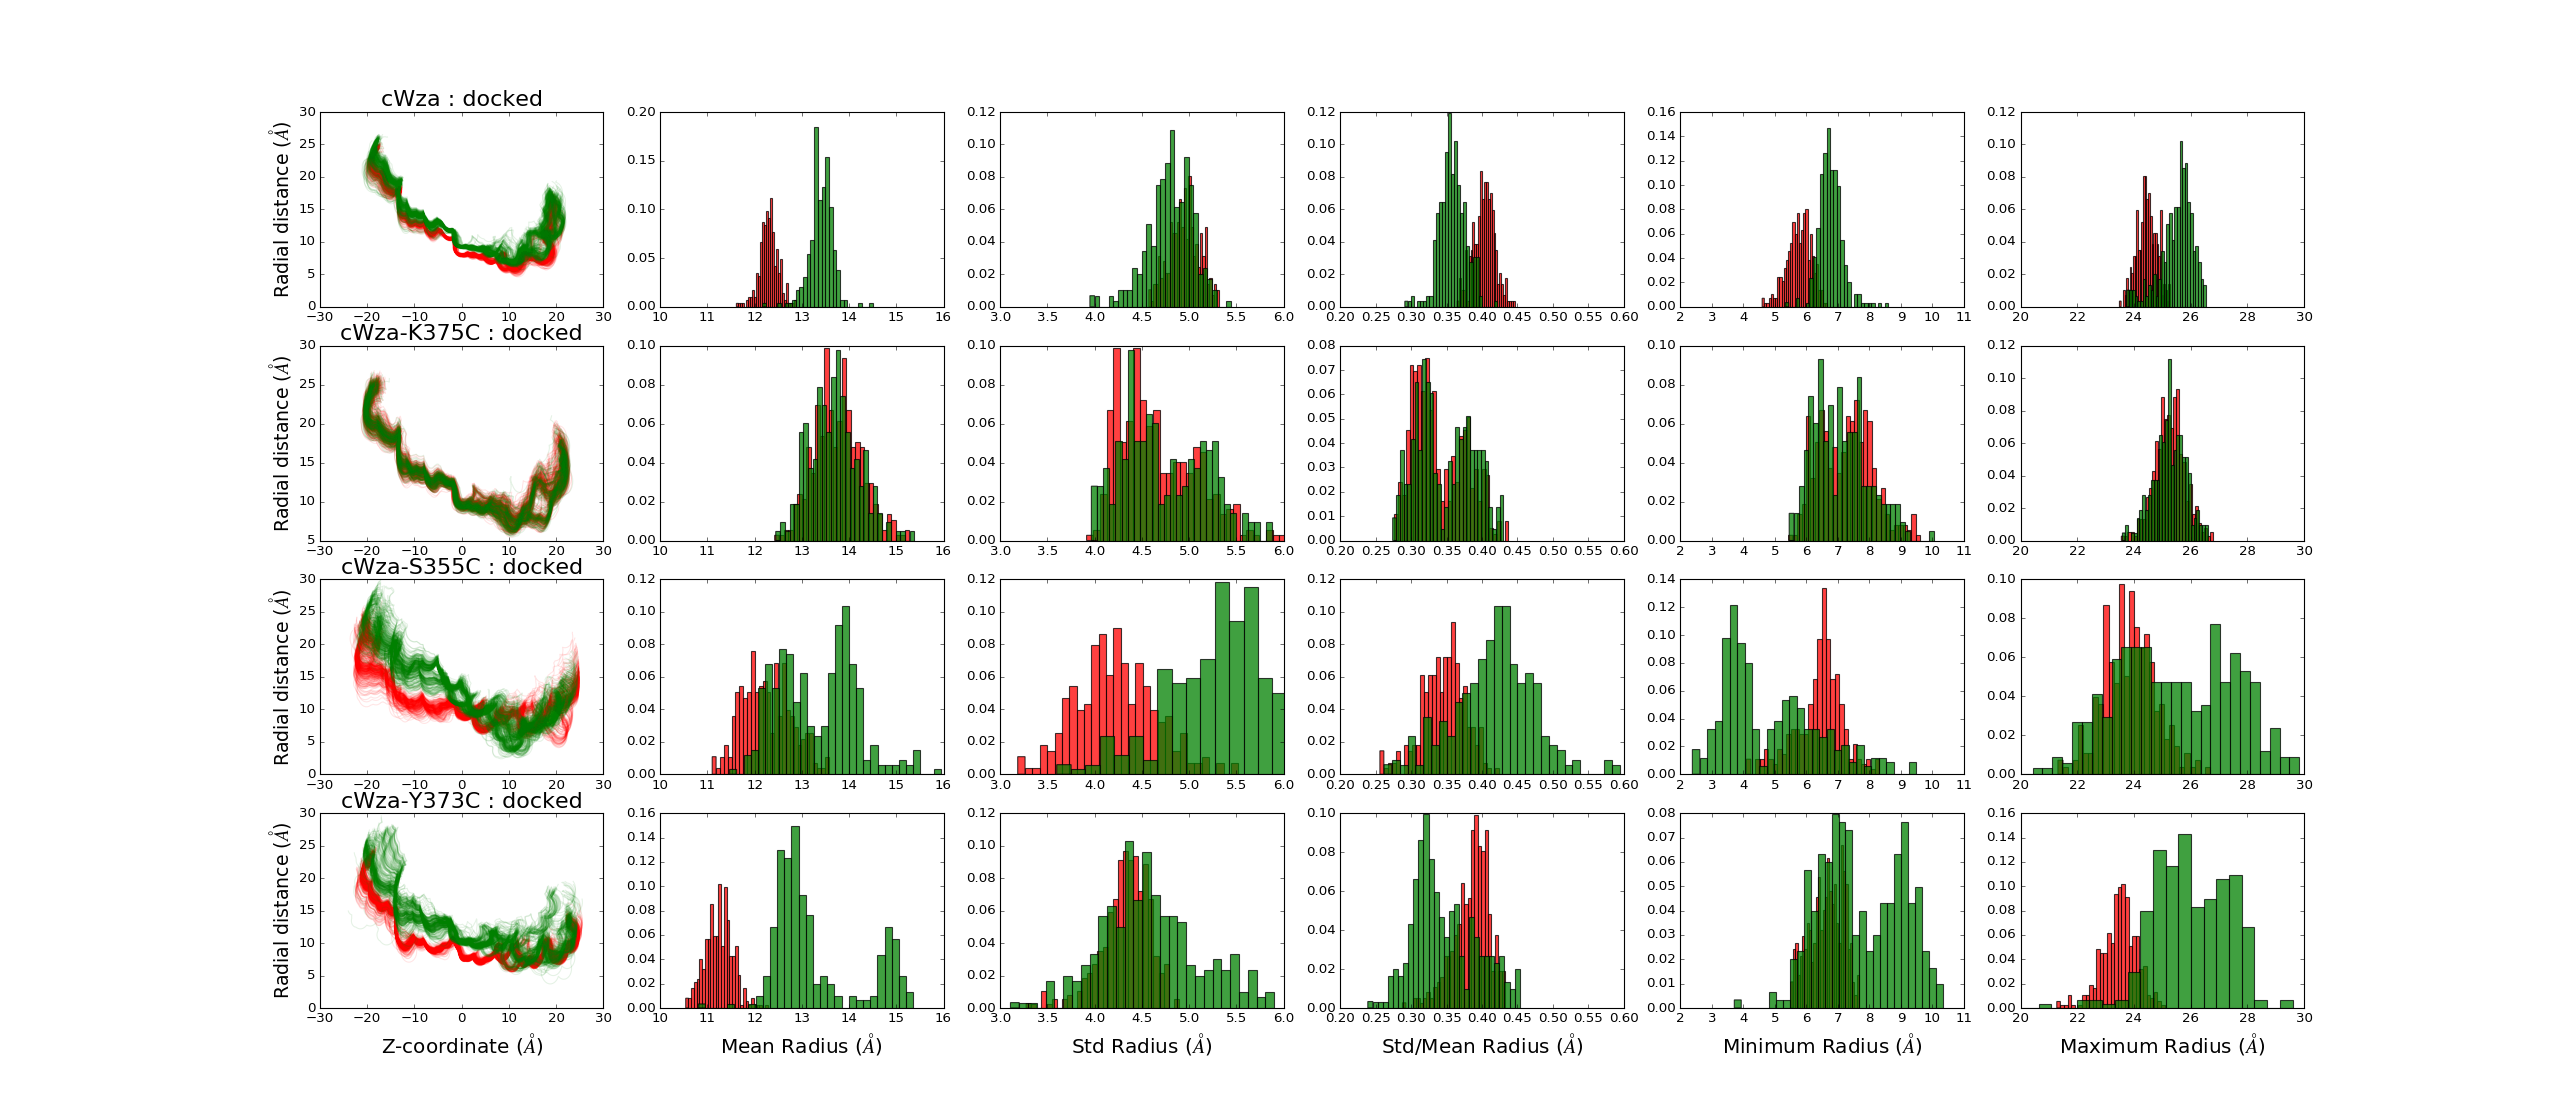

In [55]:
mutant_names = ['cWza','cWza-K375C','cWza-S355C','cWza-Y373C']
n_rows = len(mutant_names)
metrics = ['mean','std','cv','min','max']
n_cols = len(metrics)+1

ProfileTypes = {
            'primitive':RadialProfiles.primitive,
#             'VdW_BB':RadialProfiles.vdw_bb
            'VdW_AA':RadialProfiles.vdw_aa_lower
}

Colors = {
    'narrow':{'primitive':'red','VdW_BB':'red','VdW_AA':'red'},
    'wide':{'primitive':'green','VdW_BB':'green','VdW_AA':'green'}
}

mutant_names = ['cWza','cWza-K375C','cWza-S355C','cWza-Y373C']

def compute_radial_metrics(profile_Y, metric):
    if metric == 'mean':
        return numpy.mean(profile_Y)
    elif metric == 'std':
        return numpy.std(profile_Y)
    elif metric == 'cv':
        return numpy.std(profile_Y)/numpy.mean(profile_Y)
    elif metric == 'min':
        return min(profile_Y)
    elif metric == 'max':
        return max(profile_Y)

def weights4hist(x):
    weights = numpy.ones_like(x)/float(len(x))
    return weights
 
xlims = [
    [-30,30],
    [10,16],
    [3,6],
    [0.2,0.6],
    [2,11],
    [20,30]
]

fig, ax = plt.subplots(n_rows,n_cols,figsize=(32,14))

Groups = ['narrow','wide']

R_metrics = {}
N_models = {}
for i in range(len(mutant_names)):
    mutant = mutant_names[i]
    N_models[mutant] = {}
    ###############################
    R_metrics[mutant] = {}
    for group in Groups:
        # Create lists for radial metrics
        R_metrics[mutant][group] = {}
        for key in metrics:
            R_metrics[mutant_names[i]][group][key] = []
        ###############################
        model_ids = [x[0] for x in session.query(Tags.id).filter_by(mutant = mutant, group = group)]
        N_models[mutant][group] = len(model_ids)
        for j in range(N_models[mutant][group]):
            id = model_ids[j]
            primitive_profile = session.query(RadialProfiles.primitive).filter_by(id = id).all()[0][0]
            vdw_profile = session.query(RadialProfiles.vdw_aa_lower).filter_by(id = id).all()[0][0]
            X,Y = vdw_profile
            ax[i][0].plot(X,Y,c=Colors[group]['VdW_AA'],alpha=0.1)
            for key in metrics:
                R_metrics[mutant][group][key].append(compute_radial_metrics(Y,key))
        for k in range(len(metrics)):
            X = R_metrics[mutant][group][metrics[k]]
            ax[i][k+1].hist(X,bins=30,weights=weights4hist(X),color=Colors[group]['VdW_AA'],alpha=0.75)

for n in range(n_rows):
    ax[n][0].set_ylabel("Radial distance ($\AA$)",fontsize=17)
    ax[n][0].set_title(mutant_names[n]+" : docked" ,fontsize=20)
    for k in range(n_cols):
        x0,x1 = xlims[k]
        ax[n][k].set_xlim(x0,x1)

xlabels = [
    "Z-coordinate ($\AA$)",
    "Mean Radius ($\AA$)",
    "Std Radius ($\AA$)",
    "Std/Mean Radius ($\AA$)",
    "Minimum Radius ($\AA$)",
    "Maximum Radius ($\AA$)"
]

for n in range(len(xlabels)):
    ax[-1][n].set_xlabel(xlabels[n],fontsize=18)
            
plt.show()

### Residue and atom positions

**TEST**

In [324]:
path0 = "/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/cwza_NoWPN/3-analysis/md_relax/sem"
pdb = path0+'/narrow/input/refined1_0001_INPUT_0002_ignorechain.pdb'
ampal = isambard_dev.ampal.convert_pdb_to_ampal(pdb)

In [325]:
import radial_profile
import vdw_radii

ampal_rp = radial_profile.RadialProfile(ampal)
ampal_vdw = vdw_radii.VdW_Radii(ampal)

bb_ampal_rp = radial_profile.RadialProfile(ampal.backbone)
bb_ampal_vdw = vdw_radii.VdW_Radii(ampal.backbone)

In [326]:
vdw_data = ampal_vdw.simple.get_radii()
vdw_circles = ampal_rp.get_vdw_circles(vdw_data)
#
bb_vdw_data = bb_ampal_vdw.simple.get_radii()
bb_vdw_circles = bb_ampal_rp.get_vdw_circles(bb_vdw_data)

Determine global minimum of aa-VdW lower profile

In [344]:
vdw_union = cascaded_union(vdw_circles)
vdw_profile = numpy.array(vdw_union.exterior.coords).T
X,Y = vdw_profile
Rmin_global = min(Y)
Rmin_tol = 1

Find minimum values per VdW residue profiles

In [327]:
chain_ampal = ampal[0]
data = [x.unique_id for x in list(chain_ampal.get_atoms())]  
resn = sorted( list(map(int, set(map(lambda x:x[1], data)))) )
newdata = [[y[-1]-1 for y in data if y[1]==str(x)] for x in resn]

In [348]:
data_model = []
for i in range(len(newdata)):
    # Get union of VdW circles for sets of atoms making up residue
    residue_vdw = cascaded_union( itemgetter(*newdata[i])(vdw_circles) )
    residue_profile = numpy.array(residue_vdw.exterior.coords)
#     X,Y = residue_profile
    sorted_data = sorted(residue_profile, key=itemgetter(1) )
    Z,R = sorted_data[0]
    if abs(R - Rmin_global) <= Rmin_tol:
#         print(seq[i],i+1,Z,R )
        data_model.append([Z,R])

<IPython.core.display.Javascript object>


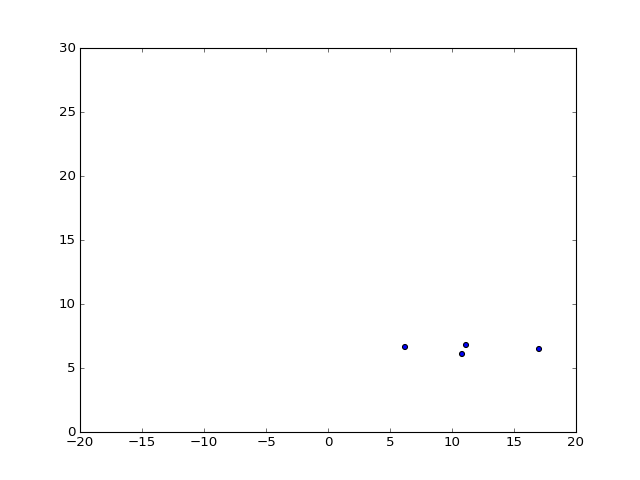

In [350]:
fig = plt.figure()
X,Y = numpy.array(data_model).T
plt.scatter(X,Y)
plt.ylim(0,30)
plt.xlim(-20,20)
plt.show()


**TEST**: Determine position for VdW profiles from DB

In [365]:
PDB_Paths[0][-1]

'/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/cwza_NoWPN/3-analysis/md_relax/sem/narrow/input/refined1_0001_INPUT_0002_ignorechain.pdb'

<IPython.core.display.Javascript object>


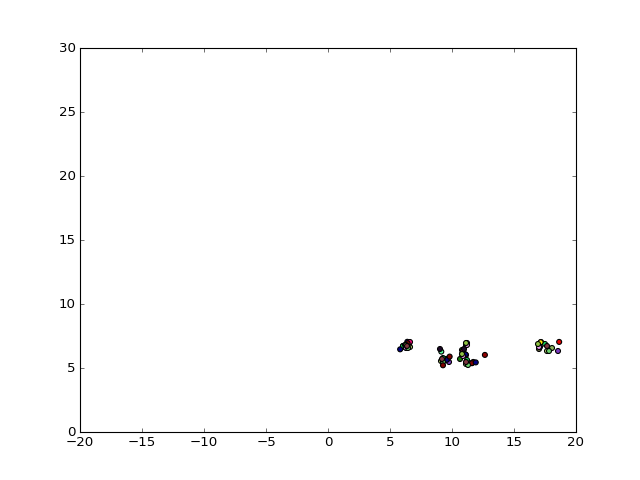

In [366]:
fig = plt.figure()

for path in PDB_Paths[:20]:
    ampal = isambard_dev.ampal.convert_pdb_to_ampal(path[-1])
    #################################################################
    ampal_rp = radial_profile.RadialProfile(ampal)
    ampal_vdw = vdw_radii.VdW_Radii(ampal)
    vdw_data = ampal_vdw.simple.get_radii()
    vdw_circles = ampal_rp.get_vdw_circles(vdw_data)
    #################################################################
    chain_ampal = ampal[0]
    seq = chain_ampal.sequence
    #################################################################
    data = [x.unique_id for x in list(chain_ampal.get_atoms())]  
    resn = sorted( list(map(int, set(map(lambda x:x[1], data)))) )
    newdata = [[y[-1]-1 for y in data if y[1]==str(x)] for x in resn]
    #################################################################
    data_model = []
    for i in range(len(newdata)):
        # Get union of VdW circles for sets of atoms making up residue
        residue_vdw = cascaded_union( itemgetter(*newdata[i])(vdw_circles) )
        residue_profile = numpy.array(residue_vdw.exterior.coords)
        sorted_data = sorted(residue_profile, key=itemgetter(1) )
        Z,R = sorted_data[0]
        if abs(R - Rmin_global) <= Rmin_tol:
#             print(seq[i],i+1,Z,R)
            data_model.append([Z,R])    
    
    X,Y = numpy.array(data_model).T
    plt.scatter(X,Y,c=numpy.random.rand(3))

plt.ylim(0,30)
plt.xlim(-20,20)
plt.show()

#### Test

<IPython.core.display.Javascript object>


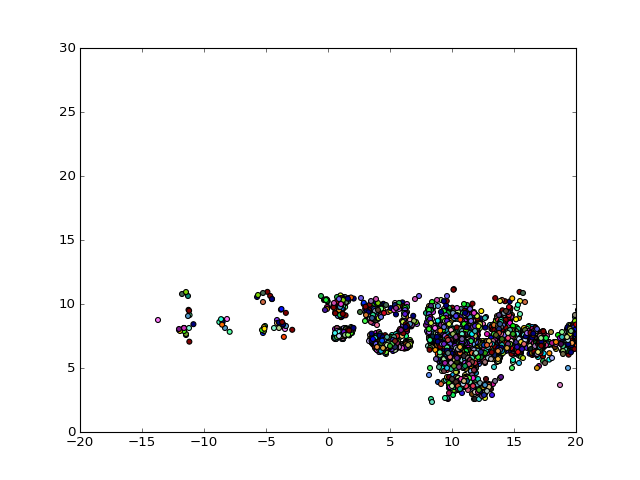

In [385]:
fig = plt.figure()

def get_residues_Rmin(ampal):
    ampal_rp = radial_profile.RadialProfile(ampal)
    ampal_vdw = vdw_radii.VdW_Radii(ampal)
    vdw_data = ampal_vdw.simple.get_radii()
    # All circles per atom with respective VdW radius
    vdw_circles = ampal_rp.get_vdw_circles(vdw_data)
    ################################
    vdw_union = cascaded_union(vdw_circles)
    vdw_profile = numpy.array(vdw_union.exterior.coords).T
    X,Y = vdw_profile
    Rmin_global = min(Y)
    Rmin_tol = 1
    ################################
    chain_ampal = ampal[0]
    seq = chain_ampal.sequence
    ################################
    # Returns id tags: Chain label, Residue Number, and Atom Number per atom 
    data = [x.unique_id for x in list(chain_ampal.get_atoms())]
    # Get sorted list of residue numbers
    resn = sorted( list(map(int, set(map(lambda x:x[1], data)))) )
    # Get atom indices corresponding to each residue
    newdata = [[y[-1]-1 for y in data if y[1]==str(x)] for x in resn]
    ################################
    data_model = []
    for i in range(len(newdata)):
        # Get union of VdW circles for sets of atoms making up residue
        residue_vdw = cascaded_union( itemgetter(*newdata[i])(vdw_circles) )
        # Get VdW residue profile
        residue_profile = numpy.array(residue_vdw.exterior.coords)
        # Find points in profile with minimal VdW radii
        sorted_data = sorted(residue_profile, key=itemgetter(1) )
        # Lowest VdW Radius for VdW  residue profile
        Z,R = sorted_data[0]
        # Check if minimum near global within radial tolerance
        if abs(R - Rmin_global) <= Rmin_tol:
            data_model.append([Z,R,seq[i]]+'-'+resn[i])
    ################################
    return data_model

data_total = []

for path in PDB_Paths[100:]:
    ampal = isambard_dev.ampal.convert_pdb_to_ampal(path[-1])
    data_model = get_residues_Rmin(ampal)
    data_total.append(data_model)
    X,Y,Ids = numpy.array(data_model).T
    plt.scatter(X,Y,c=numpy.random.rand(3))

plt.ylim(0,30)
plt.xlim(-20,20)
plt.show()

<IPython.core.display.Javascript object>


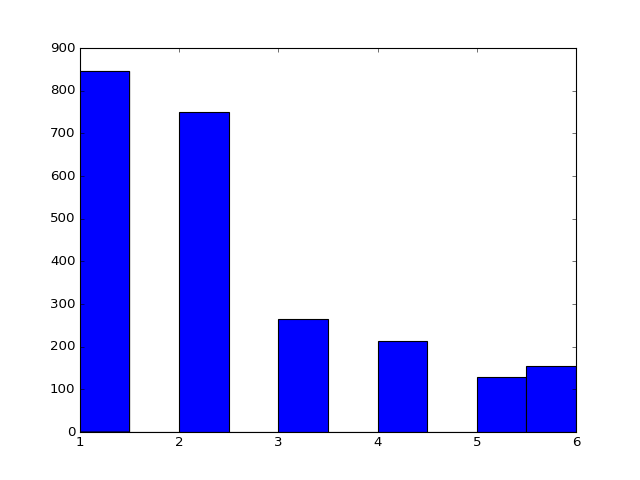

In [390]:
fig = plt.figure()
#################################
X = [len(x) for x in data_total]
plt.hist(X)
#################################
plt.show()

**DATA TO OBTAIN**:

1. Show location of VdW radial minima
2. Find histogram of number of VdW radial minima per group, per mutant
3. Residue identity/number of minma in sequence, per group, per mutant. Work out probability of appearance per group, per mutant. Correlation(*?*)
4. A

#### Parallel processing implementation

In [501]:
mutant_paths = [
    "/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/cwza_NoWPN/3-analysis/md_relax/sem",
    "/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/cwzak375c_NoWPN/3-analysis/md_relax",
    "/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/cwzas355c_NoWPN/3-analysis/md_relax",
    "/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/cwzay373c_NoWPN/3-analysis/md_relax"
]

mutant_names = ['cWza','cWza-K375C','cWza-S355C','cWza-Y373C']

In [518]:
PDB_Paths = {}
D = PDB_Paths
Tags = []
for i in range(len(mutant_names)):
    mutant = mutant_names[i]
    D[mutant] = {}
    for group in ['narrow','wide']:
        D[mutant][group] = {}
        path0 = mutant_paths[i]
        PDBs = [x.rstrip() for x in open(path0+'/'+group+'_pdbs.txt').readlines()]
        for pdb in PDBs:
            D[mutant][group][pdb] = {}
            pdb_path = path0+'/'+group+'/input/'+pdb
            value = pdb_path
            D[mutant][group][pdb] = value
            Tags.append([mutant,group,pdb])

In [503]:
def get_residues_Rmin(ampal):
    ampal_rp = radial_profile.RadialProfile(ampal)
    ampal_vdw = vdw_radii.VdW_Radii(ampal)
    vdw_data = ampal_vdw.simple.get_radii()
    # All circles per atom with respective VdW radius
    vdw_circles = ampal_rp.get_vdw_circles(vdw_data)
    ################################
    vdw_union = cascaded_union(vdw_circles)
    vdw_profile = numpy.array(vdw_union.exterior.coords).T
    X,Y = vdw_profile
    Rmin_global = min(Y)
    Rmin_tol = 1
    ################################
    chain_ampal = ampal[0]
    seq = chain_ampal.sequence
    ################################
    # Returns id tags: Chain label, Residue Number, and Atom Number per atom 
    data = [x.unique_id for x in list(chain_ampal.get_atoms())]
    # Get sorted list of residue numbers
    resn = sorted( list(map(int, set(map(lambda x:x[1], data)))) )
    # Get atom indices corresponding to each residue
    newdata = [[y[-1]-1 for y in data if y[1]==str(x)] for x in resn]
    ################################
    data_model = []
    for i in range(len(newdata)):
        # Get union of VdW circles for sets of atoms making up residue
        residue_vdw = cascaded_union( itemgetter(*newdata[i])(vdw_circles) )
        # Get VdW residue profile
        residue_profile = numpy.array(residue_vdw.exterior.coords)
        # Find points in profile with minimal VdW radii
        sorted_data = sorted(residue_profile, key=itemgetter(1) )
        # Lowest VdW Radius for VdW  residue profile
        Z,R = sorted_data[0]
        # Check if minimum near global within radial tolerance
        if abs(R - Rmin_global) <= Rmin_tol:
            data_model.append([Z,R,seq[i],resn[i]])
    ################################
    return data_model

In [522]:
D_out = {}
D = D_out
for i in range(len(mutant_names)):
    mutant = mutant_names[i]
    D[mutant] = {}
    for group in ['narrow','wide']:
        D[mutant][group] = {}
        path0 = mutant_paths[i]
        PDBs = [x.rstrip() for x in open(path0+'/'+group+'_pdbs.txt').readlines()]
        for pdb in PDBs:
            D[mutant][group][pdb] = []

In [512]:
def myfunc(tag):
    mutant, group, pdb = tag
    path = PDB_Paths[mutant][group][pdb]
    ampal = isambard_dev.ampal.convert_pdb_to_ampal(path)
    return tag, get_residues_Rmin(ampal)

# Reading DB TEST

In [655]:
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker

modules_path = "/home/ba13026/mpmodeling/analysis/"
if modules_path not in sys.path:
    sys.path.append(modules_path)

import setup_db_geometry
import importlib
importlib.reload(setup_db_geometry)
from setup_db_geometry import Json, Tags, RigidBody, RadialProfiles, Miscellaneous, Base

path0 = '/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/'
dbfile_test = path0 + 'mutant_pdb_geometry_new5.db'
engine_test = create_engine('sqlite:///'+dbfile_test)
Base.metadata.bind = engine_test
DBSession_test = sessionmaker()
DBSession_test.bind = engine_test
session_test = DBSession_test()

## Position of VdW profile minima

<IPython.core.display.Javascript object>


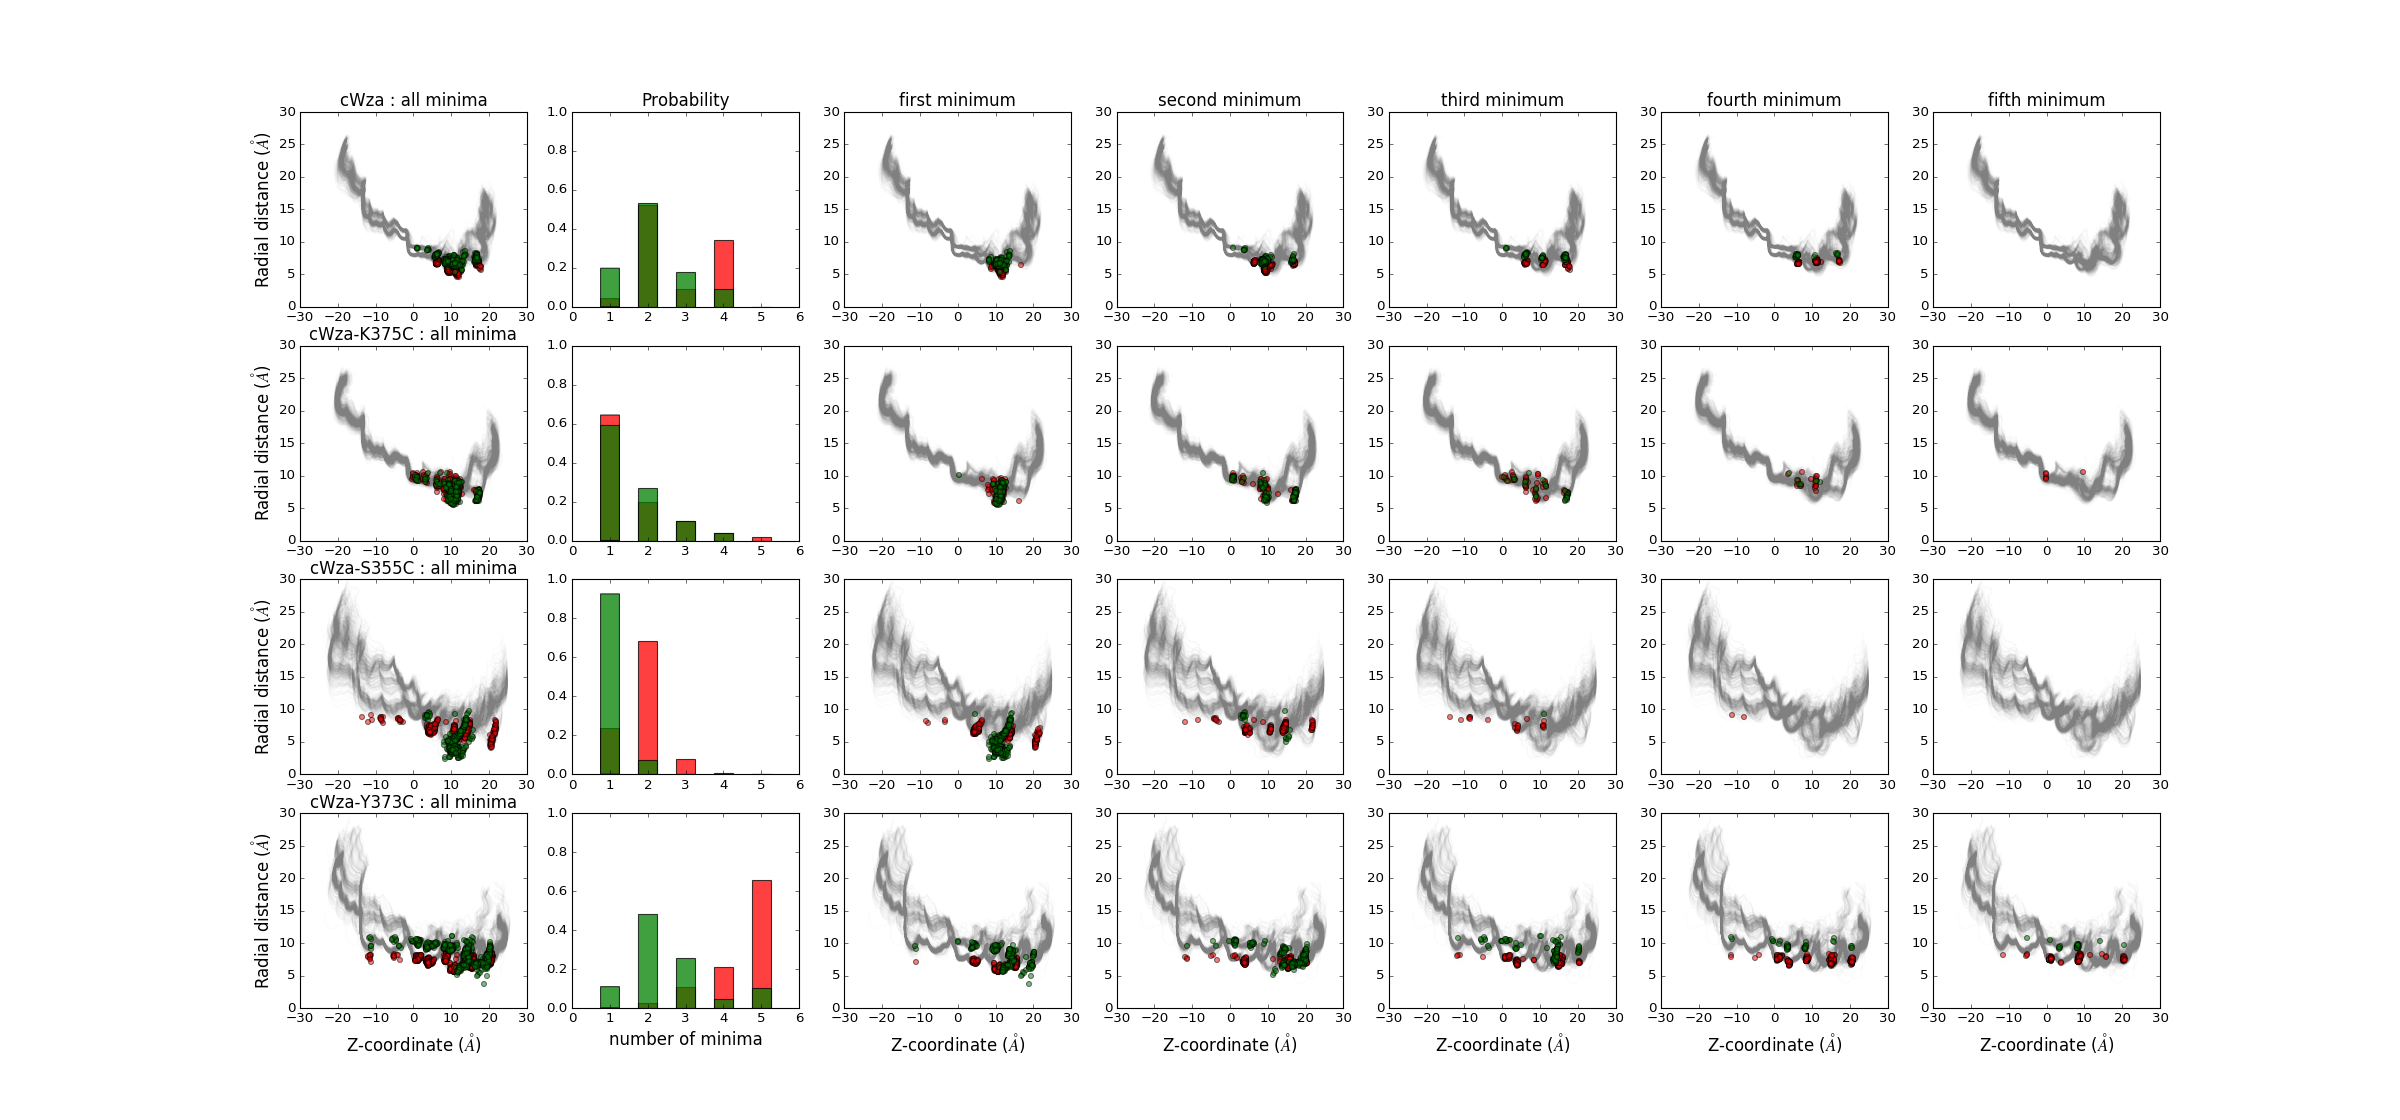

In [730]:
n_rows = len(mutant_names)
n_cols = 7
fig, ax = plt.subplots(n_rows,n_cols,figsize=(30,14))

Groups = ['narrow','wide']

Colors = {
    'narrow':'red',
    'wide':'green'
}

for i in range(len(mutant_names)):
    mutant = mutant_names[i]
    for group in Groups:
        n_minima = []
        model_ids = [x[0] for x in session_test.query(Tags.id).filter_by(mutant = mutant, group = group)]
        for j in range(len(model_ids)):
            id = model_ids[j]
            vdw_profile = session_test.query(RadialProfiles.vdw_aa_lower).filter_by(id = id).all()[0][0]
            X,Y = vdw_profile
            ax[i,0].plot(X,Y,c='grey',zorder=0,alpha=0.03)
            for j in range(n_cols-2):
                ax[i,j+2].plot(X,Y,c='grey',zorder=0,alpha=0.03)

labels = ['first','second','third','fourth','fifth']
for j in range(n_cols-2): 
    ax[-1,j+2].set_xlabel('Z-coordinate ($\AA$)',fontsize=15)
    ax[0,j+2].set_title(labels[j]+' minimum',fontsize=15)
    for i in range(len(mutant_names)):
        ax[i,0].set_ylabel('Radial distance ($\AA$)',fontsize=15)
        ax[i,j+2].set_xlim(-30,30)
        ax[i,j+2].set_ylim(0,30)
        
for i in range(len(mutant_names)):
    mutant = mutant_names[i]
    for group in Groups:
        n_minima = []
        model_ids = [x[0] for x in session_test.query(Tags.id).filter_by(mutant = mutant, group = group)]
        for j in range(len(model_ids)):
            id = model_ids[j]
            data = session_test.query(Miscellaneous.vdw_minima).filter_by(id = id).all()[0][0]
            for k in range(len(data)):
                z,r,res,resn = data[k]
                ax[i,0].scatter(z,r,c=Colors[group],alpha=0.5)
                try:
                    ax[i,k+2].scatter(z,r,c=Colors[group],alpha=0.5)
                except:
                    pass
            n_minima.append(len(data))
        ################################
        n_minima = numpy.array(n_minima)
        ax[i,1].hist(
                n_minima,
                bins=range(1,7),
                align='left',
                rwidth=0.5,
                weights=weights4hist(n_minima),
                color=Colors[group],
                alpha=0.75
            )
        ################################
    ax[i,1].set_ylim(0,1)
    ax[i,0].set_title(mutant+' : all minima',fontsize=15)
    ax[i,0].set_ylim(0,30)

ax[-1,0].set_xlabel('Z-coordinate ($\AA$)',fontsize=15)
ax[0,1].set_title('Probability',fontsize=15)
ax[-1,1].set_xlabel('number of minima',fontsize=15)
            
plt.show()

## Residue identity of VdW profile minima

<IPython.core.display.Javascript object>


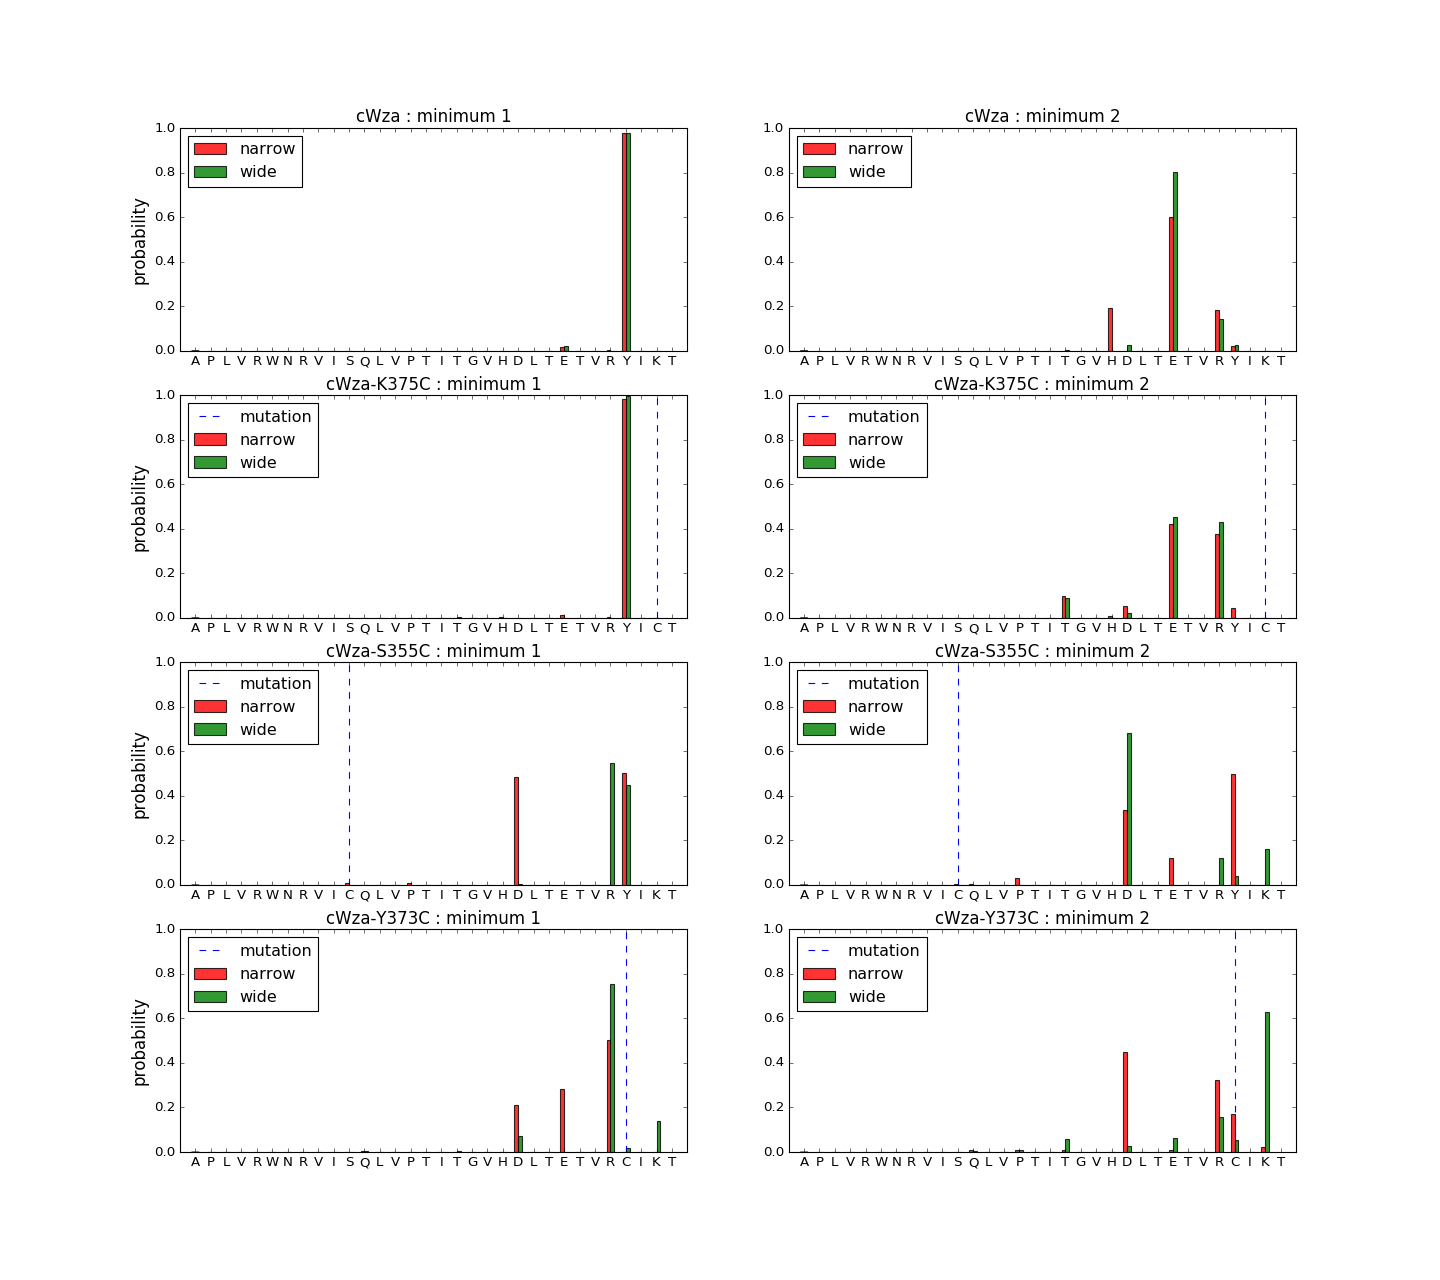

In [984]:
n_rows = len(mutant_names)
n_cols = 2
fig, ax = plt.subplots(n_rows,n_cols,figsize=(18,16))

Groups = ['narrow','wide']

Colors = {
    'narrow':'red',
    'wide':'green'
}

mutant_seqs = [
    'APLVRWNRVISQLVPTITGVHDLTETVRYIKT',
    'APLVRWNRVISQLVPTITGVHDLTETVRYICT',
    'APLVRWNRVICQLVPTITGVHDLTETVRYIKT',
    'APLVRWNRVISQLVPTITGVHDLTETVRCIKT'
]

Data_Minima = {}

for i in range(len(mutant_names)):
    mutant = mutant_names[i]
    Data_Minima[mutant] = {}
    for group in Groups:
        #######################################
        Data_Minima[mutant][group] = {}
        for k in range(6):
            Data_Minima[mutant][group][k] = []
        #######################################
        model_ids = [x[0] for x in session_test.query(Tags.id).filter_by(mutant = mutant, group = group)]
        for j in range(len(model_ids)):
            id = model_ids[j]
            data = session_test.query(Miscellaneous.vdw_minima).filter_by(id = id).all()[0][0]
            ##################################################
            for k in range(len(data)):
                resn_k_min = data[k][-1]
                Data_Minima[mutant][group][k].append(resn_k_min)
                
for i in range(len(mutant_names)):   
    mutant = mutant_names[i]
    seq = mutant_seqs[i]
    for k in range(6):
        X = []; X_weights = []
        for group in Groups:
            data = list(Data_Minima[mutant][group][k])
            X.append(data)
            X_weights.append(weights4hist(data))
        try:
            ax[i,k].hist(
                    X,
                    bins = range(1,33),
                    weights = X_weights,
                    align = 'left',
                    rwidth = 0.5,
                    label = Groups,
                    color = ['red','green'],
                    alpha = 0.8
                )
        except:
            pass

for i in range(n_rows):
    ax[i,0].set_ylabel('probability',fontsize=15)
    for j in range(N_minima):
        seq = mutant_seqs[i]
        ########################
        try:
            for ii in range(len(seq)):
                if seq[ii] == 'C':
                    Cys_x = ii+1
                    ax[i,j].plot(
                        (Cys_x,Cys_x),
                        (0,1),
                        linestyle='--',
                        color='blue',
                        linewidth=1,
                        label='mutation'
                    )
        except:
            pass
        ########################
        mutant = mutant_names[i]
        ax[i,j].set_title(mutant+' : minimum '+str(j+1),fontsize=15)
        ax[i,j].set_xticks(range(1,33))
        ax[i,j].set_xticklabels(seq)
        ax[i,j].set_xlim(0,33)
        ax[i,j].set_ylim(0,1)
        ax[i,j].legend(loc='upper left')

plt.show()

## Bottleneck length and position 

<IPython.core.display.Javascript object>


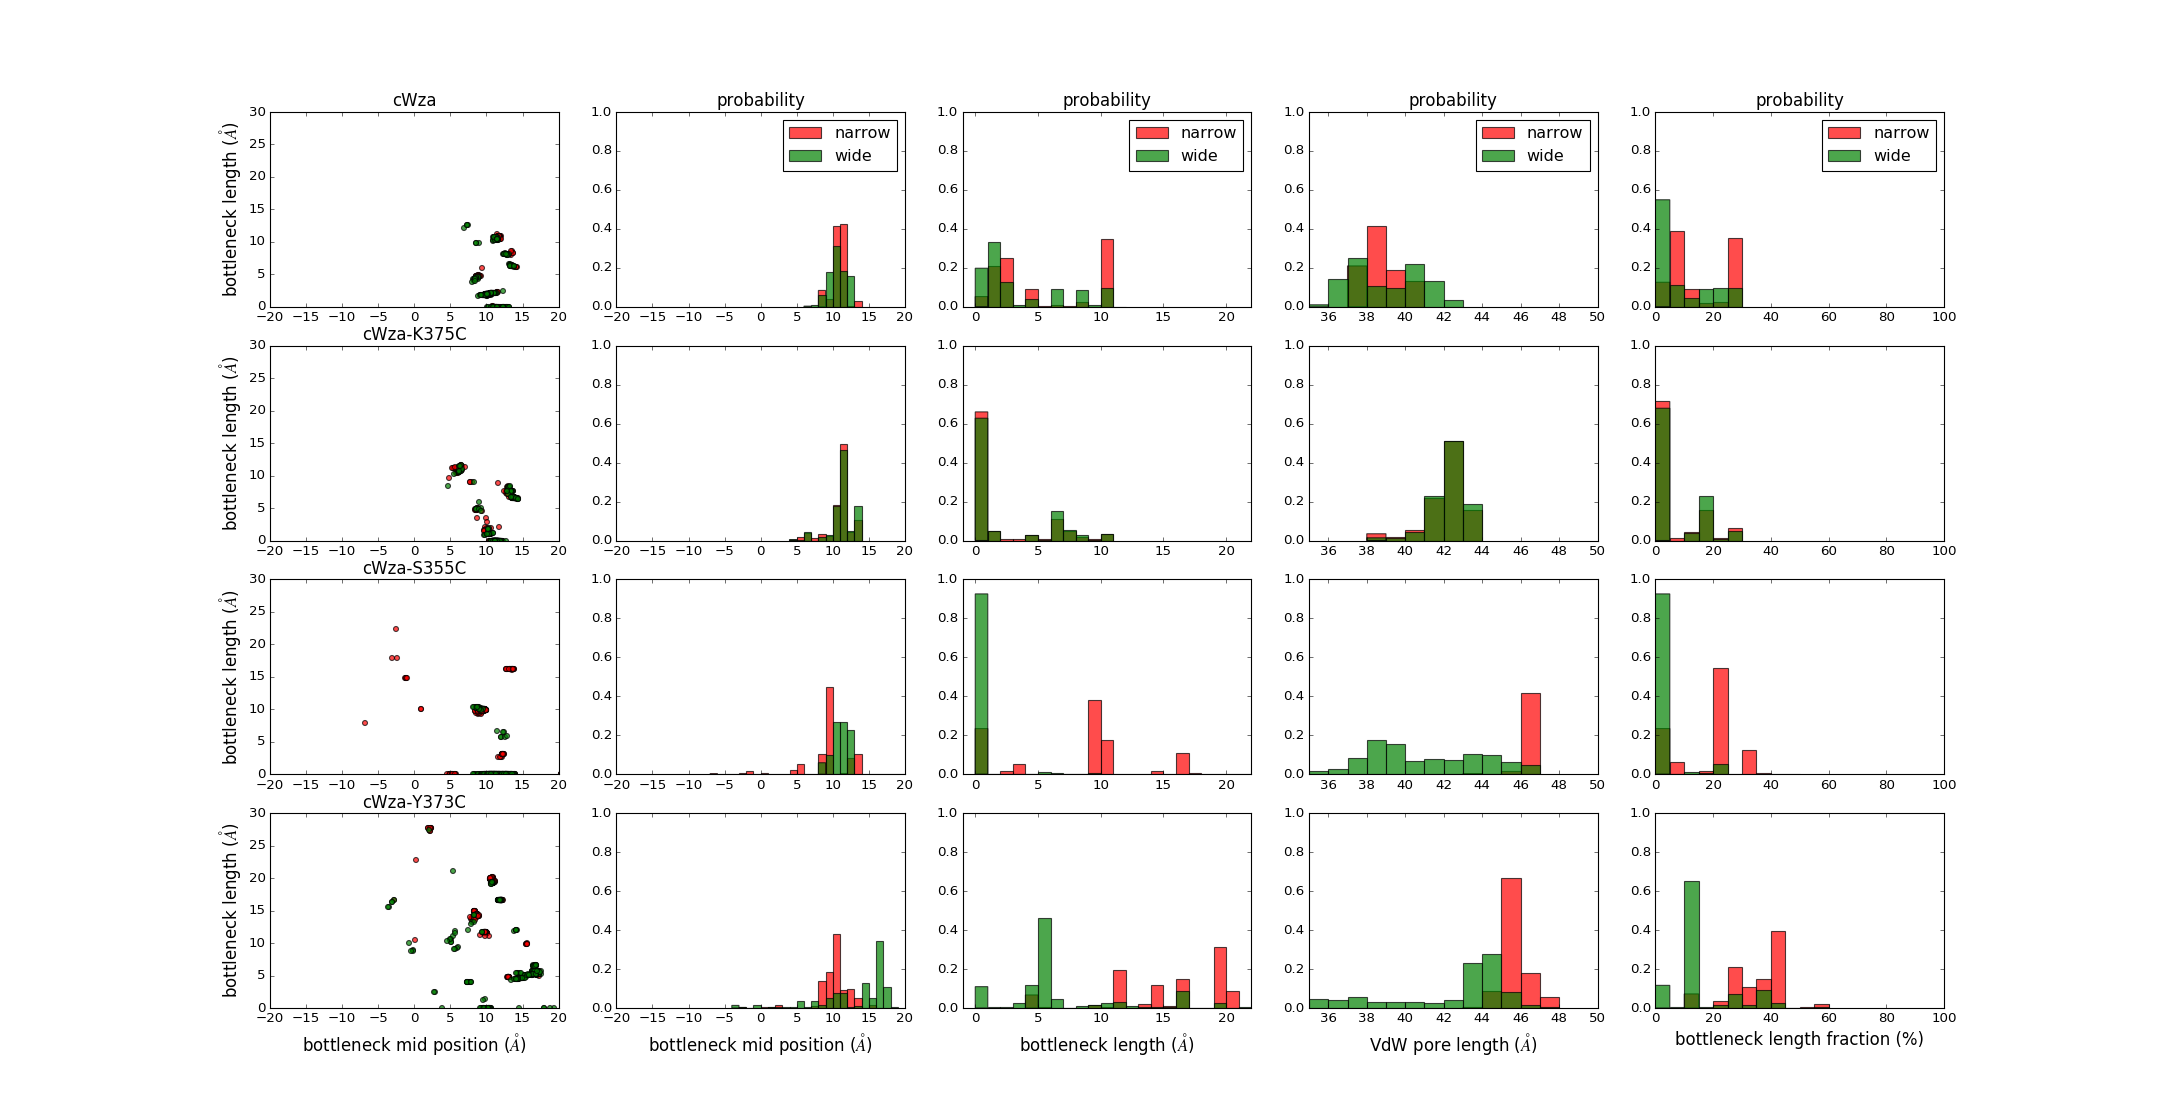

In [871]:
from math import floor

n_rows = len(mutant_names)
n_cols = 5

fig, ax = plt.subplots(n_rows,n_cols,figsize=(27,14))

Groups = ['narrow','wide']

Colors = {
    'narrow':'red',
    'wide':'green'
}

#########################################################
for i in range(len(mutant_names)):
    mutant = mutant_names[i]
    #########################
    for group in Groups:
        L = []
        C = []
        F = []
        n_minima = []
        pore_length = []
        model_ids = [x[0] for x in session_test.query(Tags.id).filter_by(mutant = mutant, group = group)]
        for j in range(len(model_ids)):
            id = model_ids[j]
            ################################
            vdw_profile = session_test.query(RadialProfiles.vdw_aa_lower).filter_by(id = id).all()[0][0]
            X,Y = vdw_profile
            pore_length.append(max(X) - min(X))
            ################################
            data = session_test.query(Miscellaneous.vdw_minima).filter_by(id = id).all()[0][0]
            res_minima = [(x[2],x[-1]) for x in data]
            res_z = [x[0] for x in data]
            ################################
            bottleneck_length = max(res_z) - min(res_z)
            bottleneck_midpt = (min(res_z) + max(res_z))/2
            bottleneck_length_fraction = bottleneck_length/float(max(X) - min(X))
            ################################
            L.append(bottleneck_length)
            C.append(bottleneck_midpt)
            F.append(bottleneck_length_fraction)
            ################################
            ax[i,0].scatter(bottleneck_midpt,bottleneck_length,c=Colors[group],alpha=0.7)
            ################################
        F = numpy.array(F)*100
        Data = [C,L,pore_length,F]
        for k in range(len(Data)):
            X = Data[k]
            if k == int(n_cols-2):
                dX = 5
            else:
                dX = 1
            bins = numpy.arange(floor(min(X)),floor(max(X))+dX,dX)
            ax[i,k+1].hist(
                X,
                bins = bins,
                weights = weights4hist(X),
                color = Colors[group],
                label = group,
                alpha = 0.7
            )
#########################################################
xlabels = [
    'bottleneck mid position ($\AA$)',
    'bottleneck mid position ($\AA$)',
    'bottleneck length ($\AA$)',
    'VdW pore length ($\AA$)',
    'bottleneck length fraction (%)'
]

xlims = [
    (-20,20),
    (-20,20),
    (-1,22),
    (35,50),
    (0,100)
]

ylims = [
    (0,30),
    (0,1),
    (0,1),
    (0,1),
    (0,1)
]

for i in range(n_cols):
    ax[-1,i].set_xlabel(xlabels[i],fontsize=15)
    if i > 0:
        ax[0,i].set_title('probability',fontsize=15)
        ax[0,i].legend()
    for j in range(n_rows):
        x0,x1 = xlims[i]
        ax[j,i].set_xlim(x0,x1)
        #######################
        y0,y1 = ylims[i]
        ax[j,i].set_ylim(y0,y1)
        #######################
        ax[j,0].set_ylabel('bottleneck length ($\AA$)',fontsize=15)
        ax[j,0].set_title(mutant_names[j],fontsize=15)



plt.show()

# Appendix

## Defining subclasses

In [ ]:
class Human:
    def __init__(self):
        self.name = 'Guido'
        self.head = self.createHead()
    def createHead(self):
        return Human.Head(self)
    class Head:
        def __init__(self, human):
            self.human = human
        def talk(self):
            return 'talking...', self.human.name

guido = Human()

guido.head.talk

 
# Let's try:
guido = Human()
guido.name
#'Guido'
guido.head.talk()
#('talking...', 'Guido')
guido.name = "Power Guido"
guido.head.talk()

## Sharing methods between classes

https://docs.python.org/3/library/functions.html#classmethod

**OPTION 1**: Use decorator `@classmethod`

In [ ]:
class A(object):
    def a1(self):
        """ This is an instance method. """
        print("Hello from an instance of A")

    @classmethod
    def a2(cls):
        """ This a classmethod. """
        print("Hello from class A")

class B(object):
    def b1(self):
        print(A().a1()) # => prints 'Hello from an instance of A'
        print(A.a2())

In [ ]:
b = B()

In [ ]:
b.b1()

**OPTION 2**: Use class inheritance

In [ ]:
class A(object):
    def a1(self):
        print("Hello from Superclass")

class B(A):
    pass

In [ ]:
b = B()

In [ ]:
b.a1()

## Further testing: VdW boundary calculation

# FIGURES

TEST:

In [4]:
import os
import sys
import numpy
import json
import subprocess
import isambard_dev
import operator
import matplotlib.pyplot as plt
from operator import itemgetter
%matplotlib notebook

In [7]:
modules_path = "/home/ba13026/mpmodeling/analysis/"
if modules_path not in sys.path:
    sys.path.append(modules_path)

In [19]:
path0 = "/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/cwza_NoWPN/3-analysis/md_relax/sem"
pdb = path0+'/narrow/input/refined1_0001_INPUT_0002_ignorechain.pdb'
ampal = isambard_dev.ampal.convert_pdb_to_ampal(pdb)

In [20]:
import radial_profile
import vdw_radii

ampal_rp = radial_profile.RadialProfile(ampal)
ampal_vdw = vdw_radii.VdW_Radii(ampal)
#
bb_ampal_rp = radial_profile.RadialProfile(ampal.backbone)
bb_ampal_vdw = vdw_radii.VdW_Radii(ampal.backbone)

In [21]:
vdw_data = ampal_vdw.simple.get_radii()
vdw_circles = ampal_rp.get_vdw_circles(vdw_data)
#
bb_vdw_data = bb_ampal_vdw.simple.get_radii()
bb_vdw_circles = bb_ampal_rp.get_vdw_circles(bb_vdw_data)

In [22]:
chain_ampal = ampal[0]
data = [x.unique_id for x in list(chain_ampal.get_atoms())]  
resn = sorted( list(map(int, set(map(lambda x:x[1], data)))) )
newdata = [[y[-1]-1 for y in data if y[1]==str(x)] for x in resn]

In [23]:
from shapely.geometry import Point
from shapely.ops import cascaded_union
from operator import itemgetter

ORIGINAL FIGURE

<IPython.core.display.Javascript object>


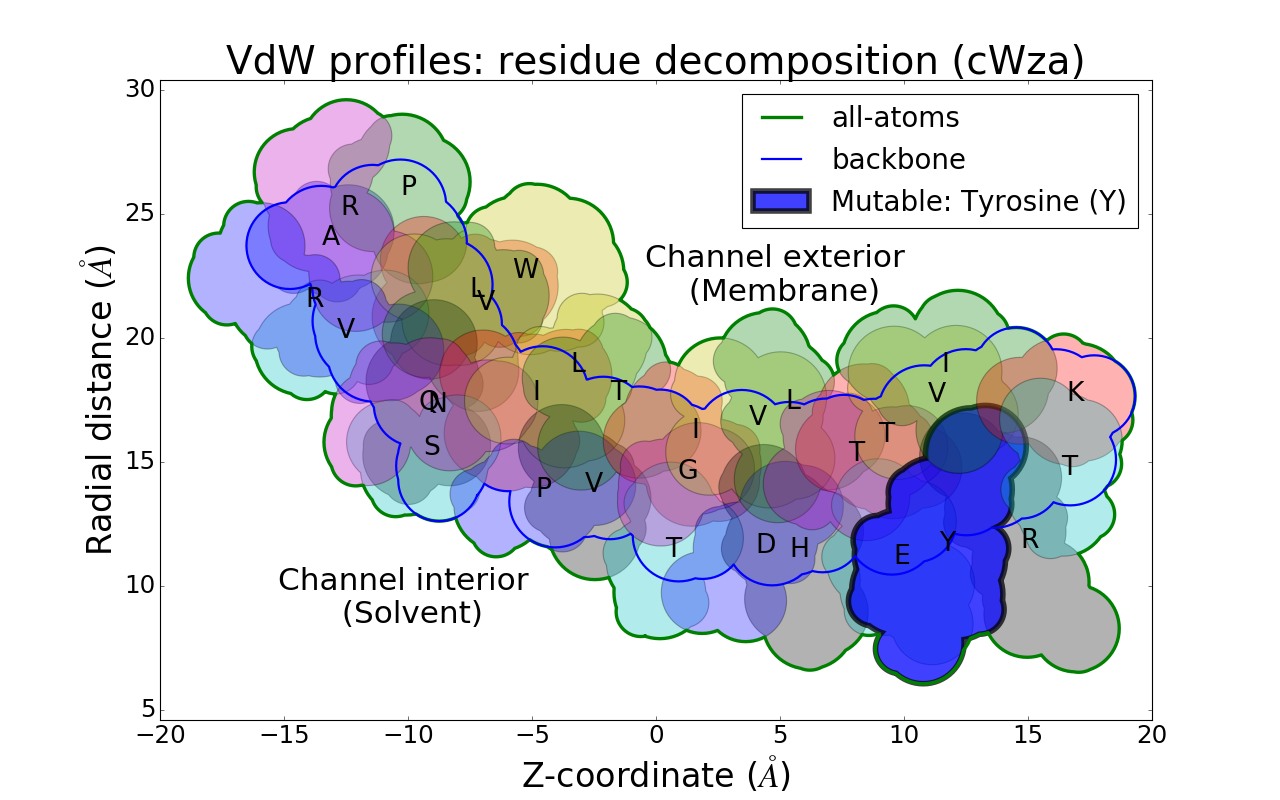

(-20.0, 20.0, 5.0, 30.0)

In [24]:
fig = plt.figure(figsize=(16,10))

#####################################
# Get amino-acid sequence from chain
seq = chain_ampal.sequence
for i in range(len(newdata)):
    # Highligh Tyrosine residue
    if i==28:
        lw = 5 # linewidth
        a = 0.75 # alpha
        label = 'Mutable: Tyrosine (Y)'
    else:
        lw = 1 # linewidth
        a = 0.3 # alpha
        label = None
    # Get union of VdW circles for sets of atoms making up residue
    residue_vdw = cascaded_union( itemgetter(*newdata[i])(vdw_circles) )
    residue_profile = numpy.array(residue_vdw.exterior.coords).T
    X,Y = residue_profile
    # Fill union area per residue
    plt.fill(X,Y,linewidth=lw,label=label,alpha=a)
    # Add residue name
    plt.text(numpy.mean(X),numpy.mean(Y),seq[i],fontsize=24)
#####################################
# Plot Total all-atom VdW profile   
X,Y = numpy.array(cascaded_union(vdw_circles).exterior.coords).T
plt.plot(X,Y,color='green',linewidth=3,label='all-atoms')
# Plot Total backbone VdW profile
X,Y = numpy.array(cascaded_union(bb_vdw_circles).exterior.coords).T
plt.plot(X,Y,color='blue',linewidth=2,label='backbone')
#####################################
# Customise plot
plt.title('VdW profiles: residue decomposition (cWza)',fontsize=35)
# Ticks
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
# Axis Labels
plt.xlabel("Z-coordinate ($\AA$)",fontsize=30)
plt.ylabel("Radial distance ($\AA$)",fontsize=30)
# Legends
plt.legend(fontsize=25)
# Extra labels
plt.text(-10,8.5,'Channel interior \n (Solvent)',ha='center',fontsize=28)
plt.text(5,21.5,'Channel exterior \n (Membrane)',ha='center',fontsize=28)
# plt.legend(bbox_to_anchor=(1.15, 1),fontsize=10)
# Axis limits/scale
plt.xlim(-30,30)
plt.ylim(0,35)
plt.axis('equal')

PAPER FIGURE

In [54]:
import numpy.random

<IPython.core.display.Javascript object>


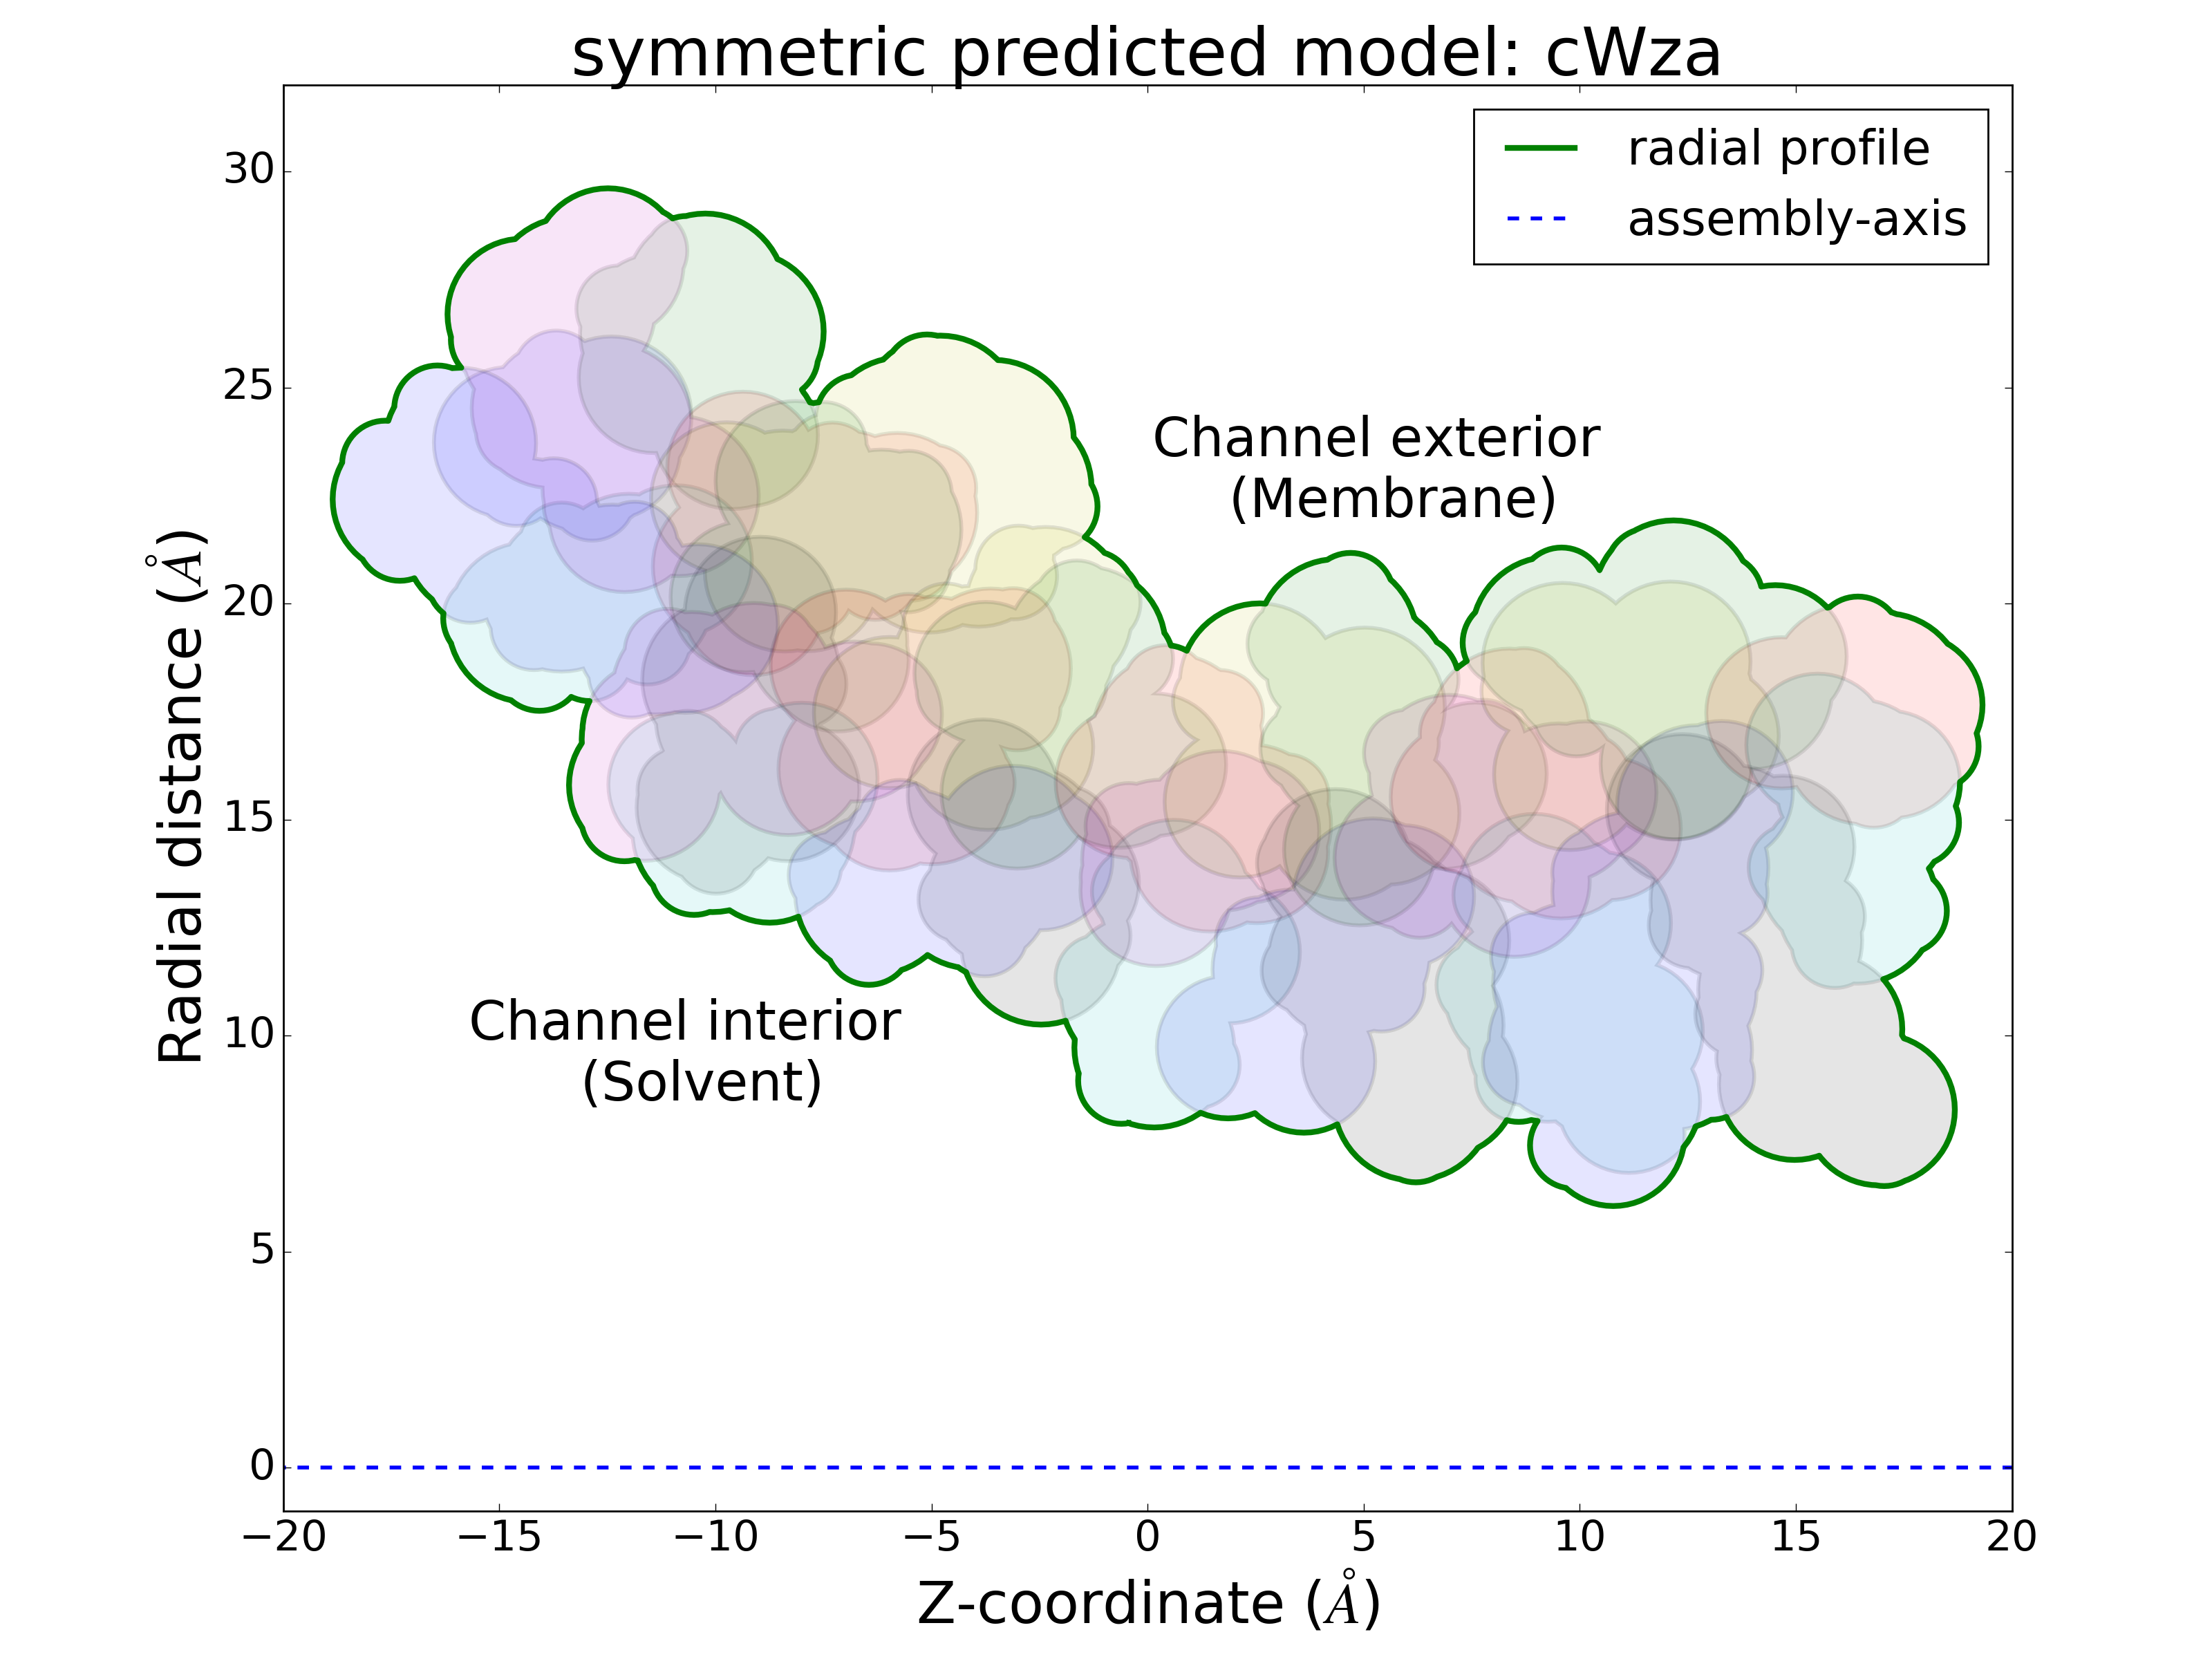

In [81]:
fig = plt.figure(figsize=(16,12),dpi=200)
# fig = plt.figure(figsize=(12,6),dpi=100)

#####################################
# Get amino-acid sequence from chain
seq = chain_ampal.sequence
for i in range(len(newdata)):
    lw = 2 # linewidth
    a = 0.1 # alpha
    label = None
    # Get union of VdW circles for sets of atoms making up residue
    residue_vdw = cascaded_union( itemgetter(*newdata[i])(vdw_circles) )
    residue_profile = numpy.array(residue_vdw.exterior.coords).T
    X,Y = residue_profile
    # Fill union area per residue
    plt.fill(X,Y,linewidth=lw,label=label,alpha=a)
#     color_res = numpy.random.rand(3)
#     plt.plot(X,Y,linewidth=lw,color=color_res)
    # Add residue name
#     plt.text(numpy.mean(X),numpy.mean(Y),seq[i],color=color_res,fontsize=24)
#####################################
# Plot Total all-atom VdW profile   
X,Y = numpy.array(cascaded_union(vdw_circles).exterior.coords).T
plt.plot(X,Y,color='green',linewidth=3,label='radial profile',alpha=1)
# Plot Total backbone VdW profile
# X,Y = numpy.array(cascaded_union(bb_vdw_circles).exterior.coords).T
# plt.plot(X,Y,color='blue',linewidth=2,label='backbone')
#####################################
# Customise plot
plt.title("symmetric predicted model: cWza",fontsize=35)
# Ticks
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
# Axis Labels
plt.xlabel("Z-coordinate ($\AA$)",fontsize=30)
plt.ylabel("Radial distance ($\AA$)",fontsize=30)
# Extra labels
plt.text(-10.5,8.5,'Channel interior \n (Solvent)',ha='center',fontsize=28)
plt.text(5.5,22,'Channel exterior \n (Membrane)',ha='center',fontsize=28)
# plot assembly axis
plt.plot((-25,25),(0,0),linestyle='--',lw=2,label='assembly-axis')
# plt.legend(bbox_to_anchor=(1.15, 1),fontsize=10)
# Axis limits/scale
plt.xlim(-20,20)
plt.ylim(-1,32)
# plt.axis('equal')
plt.gca().set_aspect('equal', adjustable='box')
# Legends
plt.legend(fontsize=25)
fig.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


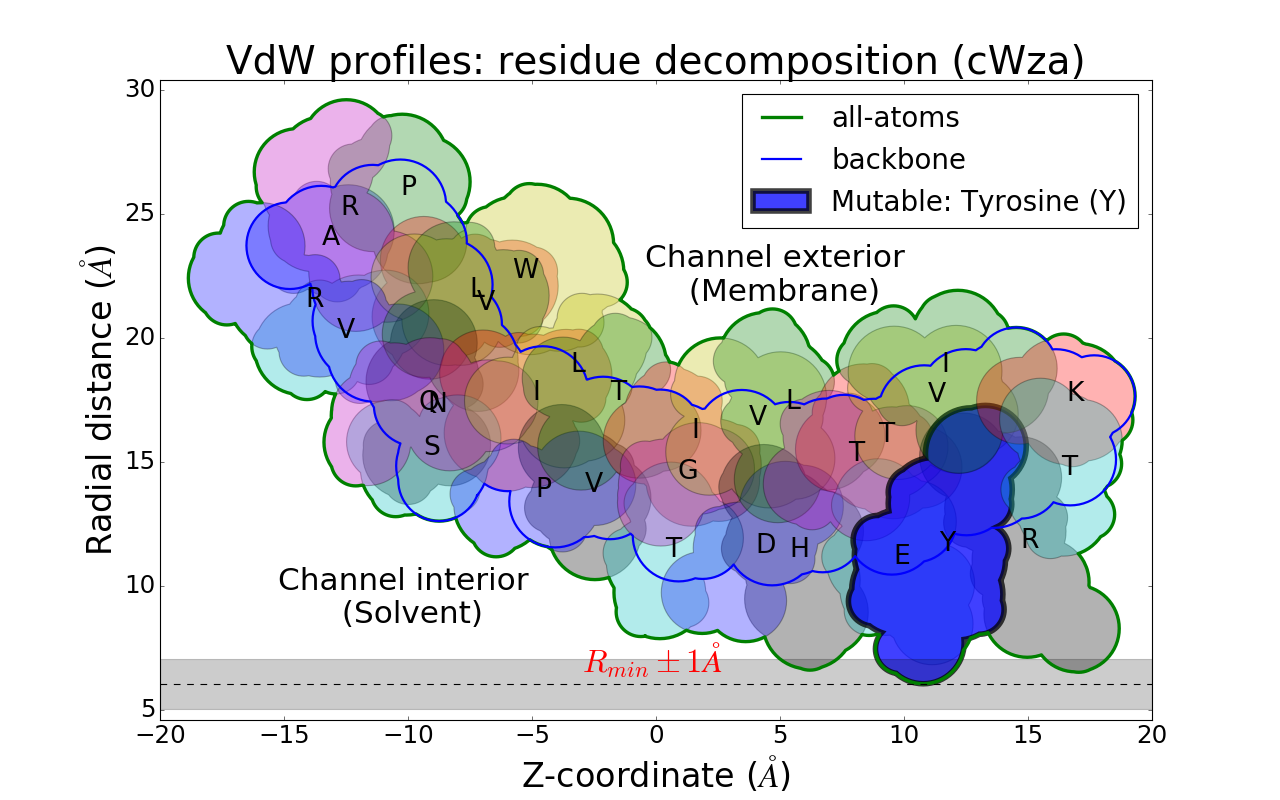

(-20.0, 20.0, 5.0, 30.0)

In [14]:
fig = plt.figure(figsize=(16,10))

#####################################
# Get amino-acid sequence from chain
seq = chain_ampal.sequence
for i in range(len(newdata)):
    # Highligh Tyrosine residue
    if i==28:
        lw = 5 # linewidth
        a = 0.75 # alpha
        label = 'Mutable: Tyrosine (Y)'
    else:
        lw = 1 # linewidth
        a = 0.3 # alpha
        label = None
    # Get union of VdW circles for sets of atoms making up residue
    residue_vdw = cascaded_union( itemgetter(*newdata[i])(vdw_circles) )
    residue_profile = numpy.array(residue_vdw.exterior.coords).T
    X,Y = residue_profile
    # Fill union area per residue
    plt.fill(X,Y,linewidth=lw,label=label,alpha=a)
    # Add residue name
    plt.text(numpy.mean(X),numpy.mean(Y),seq[i],fontsize=24)
#####################################
# Plot Total all-atom VdW profile   
X,Y = numpy.array(cascaded_union(vdw_circles).exterior.coords).T
plt.plot(X,Y,color='green',linewidth=3,label='all-atoms')
#####################################
# Indicate Min VdW radius/tolerance
Rmin = min(Y)
dR = 1
plt.fill([-20,-20,20,20],[Rmin-dR,Rmin+dR,Rmin+dR,Rmin-dR],color='black',alpha=0.2)
plt.plot((-20,20),(Rmin,Rmin),color='black',linestyle='--')
plt.text(-3,6.5,'$R_{min} \pm 1 \AA$',fontsize=29,fontweight='bold',color='red')
#####################################
# Plot Total backbone VdW profile
X,Y = numpy.array(cascaded_union(bb_vdw_circles).exterior.coords).T
plt.plot(X,Y,color='blue',linewidth=2,label='backbone')
#####################################
# Customise plot
plt.title('VdW profiles: residue decomposition (cWza)',fontsize=35)
# Ticks
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
# Axis Labels
plt.xlabel("Z-coordinate ($\AA$)",fontsize=30)
plt.ylabel("Radial distance ($\AA$)",fontsize=30)
# Legends
plt.legend(fontsize=25)
# Extra labels
plt.text(-10,8.5,'Channel interior \n (Solvent)',ha='center',fontsize=28)
plt.text(5,21.5,'Channel exterior \n (Membrane)',ha='center',fontsize=28)
# plt.legend(bbox_to_anchor=(1.15, 1),fontsize=10)
# Axis limits/scale
plt.xlim(-30,30)
plt.ylim(0,35)
plt.axis('equal')

## Bottleneck region

In [15]:
from insert2db_geometry import get_vdw_minima

In [16]:
minima_model = get_vdw_minima(ampal)

In [17]:
data = minima_model
res_minima = [(x[2],x[-1]) for x in data]
res_z = [x[0] for x in data]
################################
bottleneck_length = max(res_z) - min(res_z)
bottleneck_midpt = (min(res_z) + max(res_z))/2
bottleneck_length_fraction = bottleneck_length/float(max(X) - min(X))

<IPython.core.display.Javascript object>


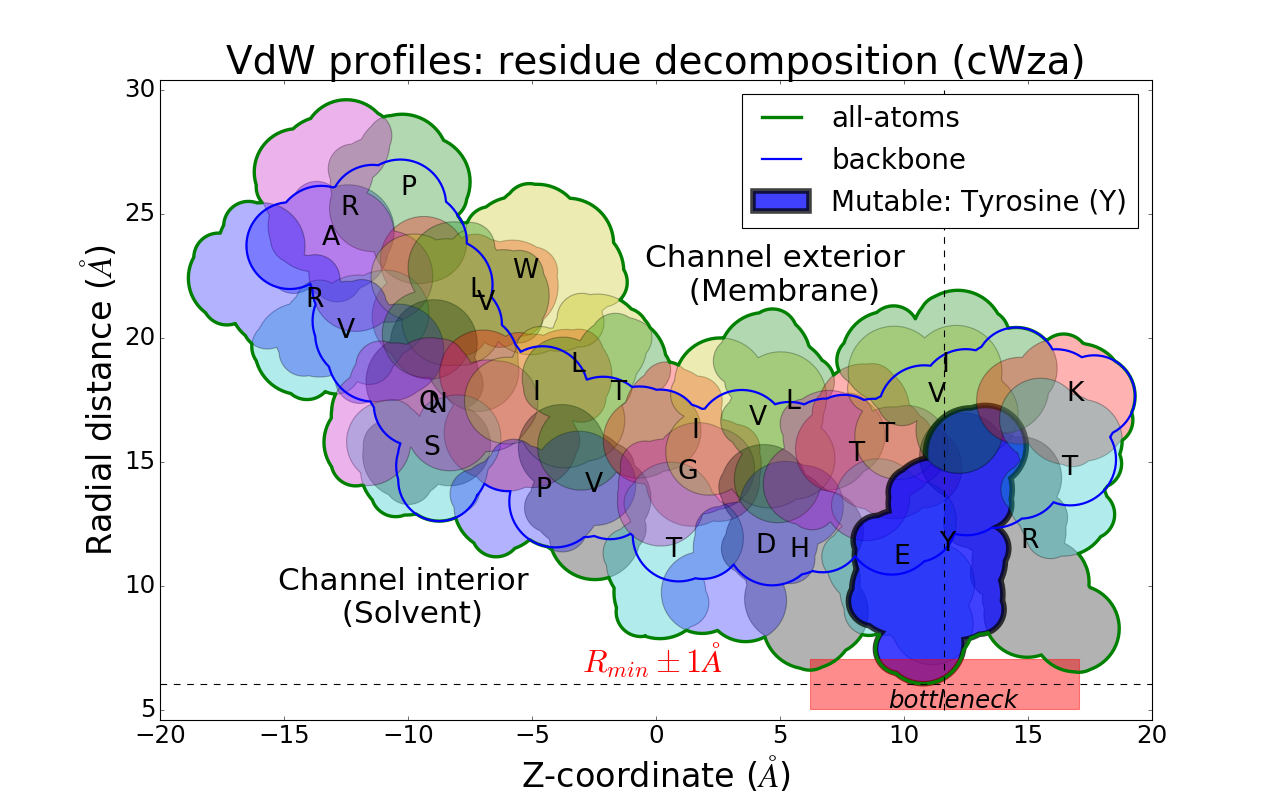

(-20.0, 20.0, 5.0, 30.0)

In [18]:
fig = plt.figure(figsize=(16,10))

#####################################
# Get amino-acid sequence from chain
seq = chain_ampal.sequence
for i in range(len(newdata)):
    # Highligh Tyrosine residue
    if i==28:
        lw = 5 # linewidth
        a = 0.75 # alpha
        label = 'Mutable: Tyrosine (Y)'
    else:
        lw = 1 # linewidth
        a = 0.3 # alpha
        label = None
    # Get union of VdW circles for sets of atoms making up residue
    residue_vdw = cascaded_union( itemgetter(*newdata[i])(vdw_circles) )
    residue_profile = numpy.array(residue_vdw.exterior.coords).T
    X,Y = residue_profile
    # Fill union area per residue
    plt.fill(X,Y,linewidth=lw,label=label,alpha=a)
    # Add residue name
    plt.text(numpy.mean(X),numpy.mean(Y),seq[i],fontsize=24)
#####################################
# Plot Total all-atom VdW profile   
X,Y = numpy.array(cascaded_union(vdw_circles).exterior.coords).T
plt.plot(X,Y,color='green',linewidth=3,label='all-atoms')
#####################################
# Indicate Min VdW radius/tolerance
Rmin = min(Y)
dR = 1
x0 = bottleneck_midpt - bottleneck_length/2
x1 = bottleneck_midpt + bottleneck_length/2
plt.fill([x0,x0,x1,x1],[Rmin-dR,Rmin+dR,Rmin+dR,Rmin-dR],color='red',alpha=0.45)
##################################
plt.plot((-20,20),(Rmin,Rmin),color='black',linestyle='--')
plt.text(-3,6.5,'$R_{min} \pm 1 \AA$',fontsize=29,fontweight='bold',color='red')
##################################
plt.plot((bottleneck_midpt,bottleneck_midpt),(5,30),color='black',linestyle='--')
#####################################
# Plot Total backbone VdW profile
X,Y = numpy.array(cascaded_union(bb_vdw_circles).exterior.coords).T
plt.plot(X,Y,color='blue',linewidth=2,label='backbone')
#####################################
# Customise plot
plt.title('VdW profiles: residue decomposition (cWza)',fontsize=35)
# Ticks
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
# Axis Labels
plt.xlabel("Z-coordinate ($\AA$)",fontsize=30)
plt.ylabel("Radial distance ($\AA$)",fontsize=30)
# Legends
plt.legend(fontsize=25)
# Extra labels
plt.text(-10,8.5,'Channel interior \n (Solvent)',ha='center',fontsize=28)
plt.text(5,21.5,'Channel exterior \n (Membrane)',ha='center',fontsize=28)
plt.text(12,5.1,'bottleneck',ha='center',fontstyle='italic' ,fontsize=22)
# plt.legend(bbox_to_anchor=(1.15, 1),fontsize=10)
# Axis limits/scale
plt.xlim(-30,30)
plt.ylim(0,35)
plt.axis('equal')

Minimum VdW radius

EXAMPLE 1:

In [105]:
animals = ['cow', 'cow', 'bird', 'pony', 'pony', 'pony', 'fish', 'cow']

In [107]:
import itertools
for key, group in itertools.groupby(animals):
    print(key, group)

cow <itertools._grouper object at 0x2aab44b8fbe0>
bird <itertools._grouper object at 0x2aab44b9bda0>
pony <itertools._grouper object at 0x2aab44b8fc88>
fish <itertools._grouper object at 0x2aab44b9bcc0>
cow <itertools._grouper object at 0x2aab44b8ffd0>


EXAMPLE 2:

In [112]:
mylist = [["A",0], ["B",1], ["C",0], ["D",2], ["E",2]]

In [115]:
values = set(map(lambda x:x[1], mylist))
newlist = [[y[0] for y in mylist if y[1]==x] for x in values]

In [117]:
newlist

[['A', 'C'], ['B'], ['D', 'E']]

In [ ]:
import importlib
importlib.reload(insert2db_geometry)

In [ ]:
import insert2db_geometry

In [ ]:
all_data = insert2db_geometry.get_rigid_body_data(ampal)

In [ ]:
all_data

In [ ]:
primitive, punctual_bb, punctual_aa, vdw_bb_lower, vdw_bb_upper, vdw_aa_lower, vdw_aa_upper =  all_profiles

In [ ]:
# for p in itemgetter(*[0,-2,-1])(all_profiles):
for p in itemgetter(*[0,-4,-3,-2,-1])(all_profiles):    
    X,Y = p
    plt.plot(X,Y)

In [788]:
modules_path = "/home/ba13026/mpmodeling/analysis/"
if modules_path not in sys.path:
    sys.path.append(modules_path)

from insert2db_geometry import get_radial_profiles

In [ ]:
import sys
import numpy
import isambard_dev
from shapely.geometry import Point
from shapely.ops import cascaded_union
from itertools import combinations
from concurrent import futures

modules_path = "/home/ba13026/mpmodeling/analysis/"
if modules_path not in sys.path:
    sys.path.append(modules_path)

from rigid_body import RigidBody
from vdw_radii import VdW_Radii

In [ ]:
ampal_vdw =  VdW_Radii(ampal)

In [ ]:
vdw_data = ampal_vdw.simple.get_radii()

In [ ]:
ampal_pr = RadialProfile(ampal)

In [ ]:
circles = ampal_pr.get_vdw_circles(vdw_data)

In [ ]:
len(circles)

In [ ]:
sys.getsizeof(circles)

In [ ]:
def chunkIt(seq, num):
    avg = len(seq) / float(num)
    out = []
    last = 0.0
    while last < len(seq):
        out.append(seq[int(last):int(last + avg)])
        last += avg
    return out

Number of items and size of list for single circle list

In [ ]:
params_list = chunkIt(circles,4)

In [ ]:
sys.getsizeof(params_list[0])

Number of items and size of list for circle combination list

In [ ]:
combs = [a.union(b) for a,b in combinations(circles, 2)]
params_list = chunkIt(combs,4)

In [ ]:
len(params_list[0]), 4*sys.getsizeof(params_list[0])

TEST: Get VdW Circle union with simple VdW Circle set

In [ ]:
union_test0 = cascaded_union(circles)

In [ ]:
union_test0

In [ ]:
union_test0 = cascaded_union(combs)

In [ ]:
union_test0

In [ ]:
n_threads = 4
# Stuff for multi-threading
func = cascaded_union
params_list = chunkIt( ,n_threads)
myunions = [] # Output list
# Run multithreading
with futures.ThreadPoolExecutor(max_workers=n_threads) as executor:
    for x in executor.map(func, params_list):
        myunions.append(x)
return cascaded_union(myunions)

In [ ]:
# %%writefile  /home/ba13026/mpmodeling/analysis/radial_profile.py
#!/usr/bin/python

import sys
import numpy
import isambard_dev
from shapely.geometry import Point
from shapely.ops import cascaded_union
from itertools import combinations
from concurrent import futures

modules_path = "/home/ba13026/mpmodeling/analysis/"
if modules_path not in sys.path:
    sys.path.append(modules_path)

from rigid_body import RigidBody
from vdw_radii import VdW_Radii

class RadialProfile():
    """Hello"""
    def __init__(self, ampal):
        self.ampal = ampal
        ######### Inhereted classes ###############
        self.rigid_body = RigidBody(self.ampal)
        self.vdw_analysis = VdW_Radii(self.ampal)
        #########################################
        self.n_threads = 4
        self.Atoms_XYZ = [numpy.array([atom.x,atom.y,atom.z]) for atom in self.ampal.get_atoms()]
        self.cartesian_base = self.rigid_body.get_assembly_reference()
        self.e_x = self.cartesian_base[0]
        self.e_y = self.cartesian_base[1]
        self.e_z = self.cartesian_base[2]
        self.COM = self.rigid_body.get_assembly_com()
    ############################################
    # Types of profiles
    ############################################
    def primitive(self):
        prims = self.rigid_body.get_primitives()
        xyz = prims[0]
        return self.get_profile(xyz)

    def punctual(self):
        xyz = self.Atoms_XYZ
        return self.get_profile(xyz)

    def vdw(self, vdw_type):
        if vdw_type == 'simple':
            vdw_data = self.vdw_analysis.simple.get_radii()
        elif vdw_type == 'amber':
            vdw_data = self.vdw_analysis.amber.get_radii()
        else:
            print("Not valid VdW Radius type")
        vdw_circle_union = self.get_union_vdw_circles(vdw_data)
        profile = numpy.array(vdw_circle_union.exterior.coords).T
        # Below method not robust if holes present
        #profile = numpy.array(vdw_circle_union.boundary.coords).T
        return profile

    def get_profile(self, xyz):
        N = len(xyz)
        r = xyz - self.COM # Coordinates relative to COM
        # Projection onto Assembly frame of reference
        A_x = numpy.dot(r, self.e_x).reshape((N,1))
        A_y = numpy.dot(r, self.e_y).reshape((N,1))
        e_x = self.e_x.reshape((1,3))
        e_y = self.e_y.reshape((1,3))
        ################################################
        r_xy = numpy.matmul(A_x,e_x) + numpy.matmul(A_y,e_y)
        d_xy = numpy.linalg.norm(r_xy,axis = 1)
        ################################################
        r_z = numpy.dot(r, self.e_z)
        ################################################
        profile = [r_z, d_xy]
        return profile
    
    def get_vdw_circles(self, vdw_data):
        Z, R = self.punctual()
        VdW_Radii = [float(x[-1]) for x in vdw_data]
        data = list( zip(Z, R, VdW_Radii) )
        circles = [Point(r_z, d_xy).buffer(vdwr) for r_z,d_xy,vdwr in data]
        return circles
        

    def get_union_vdw_circles(self, vdw_data):
        #####################################
        def chunkIt(seq, num):
            avg = len(seq) / float(num)
            out = []
            last = 0.0
            while last < len(seq):
                out.append(seq[int(last):int(last + avg)])
                last += avg
            return out
        #####################################
        circles = self.get_vdw_circles(vdw_data)
        n_threads = self.n_threads
        combs = [a.union(b) for a,b in combinations(circles, 2)]
        # Stuff for multi-threading
        func = cascaded_union
        params_list = chunkIt(combs,n_threads)
        myunions = [] # Output list
        # Run multithreading
        with futures.ThreadPoolExecutor(max_workers=n_threads) as executor:
            for x in executor.map(func, params_list):
                myunions.append(x)
        return cascaded_union(myunions)